# Table of contents:
1.introduction


2.Getting jupyter Ready



3.Reading & understanding the data
   A.importing the input files
   B.inspect data frames
   
   
   
4.Data Cleaning & Mainpulation
  A.null value calculation
  B.analyze & delete Unnecessary col
  C.standardize values
  D.data type conversion
  E.null values data Imputation
  F.Identifying the outliers
  
  
5.Data analysis
  A.imbalance analysis
  B.plotting functions
  C.categorical variables analysis
  D.numeric variables analysis
  
  
  
6.merged DataFrames analysis



7.Conclusions



# Introduction:

This case study to give an idea of applying EDA in a real business scenario.  this case study,we will develop a basic understanding of risk 
analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Understanding :

The loan proving companies find it hard to give loans to the people due to their insufficient or non+existent credit history Because of that , aome consumers use it as their advantage buy becoming a defaulter . this will ensure that the applicants capable of repying the loan are not rejected.

when the company receives a loan appllcation the company o decide for loan approval based on the applicant's profile Two types of riskes are associated with the bank's decision:

*if the applicant is likey to repay the loan then not appri=oving the loan results in a bussiness to the  company 

*if the applicant is not likely to repay the loan,i.e he /she is likely to default, then approving the loan may lead to a financial loss for the company.

The information about the loan application at the time ofn applying for the loan, if the loan it contains two types of scenaries:

*The client with payment difficulties: he /she had late  pyment more than X day on at least one of the first Y instalment of the loan in our sample 

*All other cases: all other cases when the payment is paid on time 

When a client applies fmor a loan , there are four types of decision that could be taken the clien/company:-

1.Approved: The Company has approved loan application

2.Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the  client he received worse pricing which did not want.

3.Refused: The company had rejected the loan (because the client does not meet their reguirement etc.)

4.Unused offer: Loan has been cancelled by the client but on different stages of process.




# Business Objective:

This case study aims to identify patterns which indicate if a client has difficult paying thier installment which amy be used for taking actions such as denying the loan reducing the amount of loan, lending (to risky applicants) at a higher rate, etc. This will ensure  that the consumers capable of rapaying the loan are not rejected. Identification of such applicants using EDA is the aims of this case study.

in other words the company wants to understand the driving factors (or driver variables) the company wants to understand the driving factors(or drives variables) behind loan company can utilise this knowlwdgwe for its portfolio and risk assessment.


# Getting Jupyter Ready:


In [1]:
# import python libraries:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns 
import itertools 
%matplotlib inline

In [2]:
#setting up plot style.
style.use('seaborn-poster')
style.use('fivethirtyeight')

C:\Users\Azmeera Pavan\AppData\Local\Temp\ipykernel_26052\3147308199.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


In [3]:
#supress warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
#adjust jupter views:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.set_option('display.expand_frame_repr',False)

# importing the input files load the data

In [5]:
application_data=pd.read_csv(r"D:\projects\data EDA\application_data.csv")
previous_application=pd.read_csv(r"D:\projects\data EDA\previous_application.csv")

In [6]:
application_data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

In [7]:
previous_application.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

# DataBase Dimension()

In [8]:
print('DataBase dimension application',application_data.shape)

DataBase dimension application (307511, 122)


In [9]:
print('DataBase dimension application',previous_application.shape)

DataBase dimension application (1670214, 37)


# DataBase columns type:

In [10]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [11]:
previous_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [12]:
#checking the numeric variables of the dataframes

In [13]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

In [14]:
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

# data cleaning &manipulation

<Axes: >

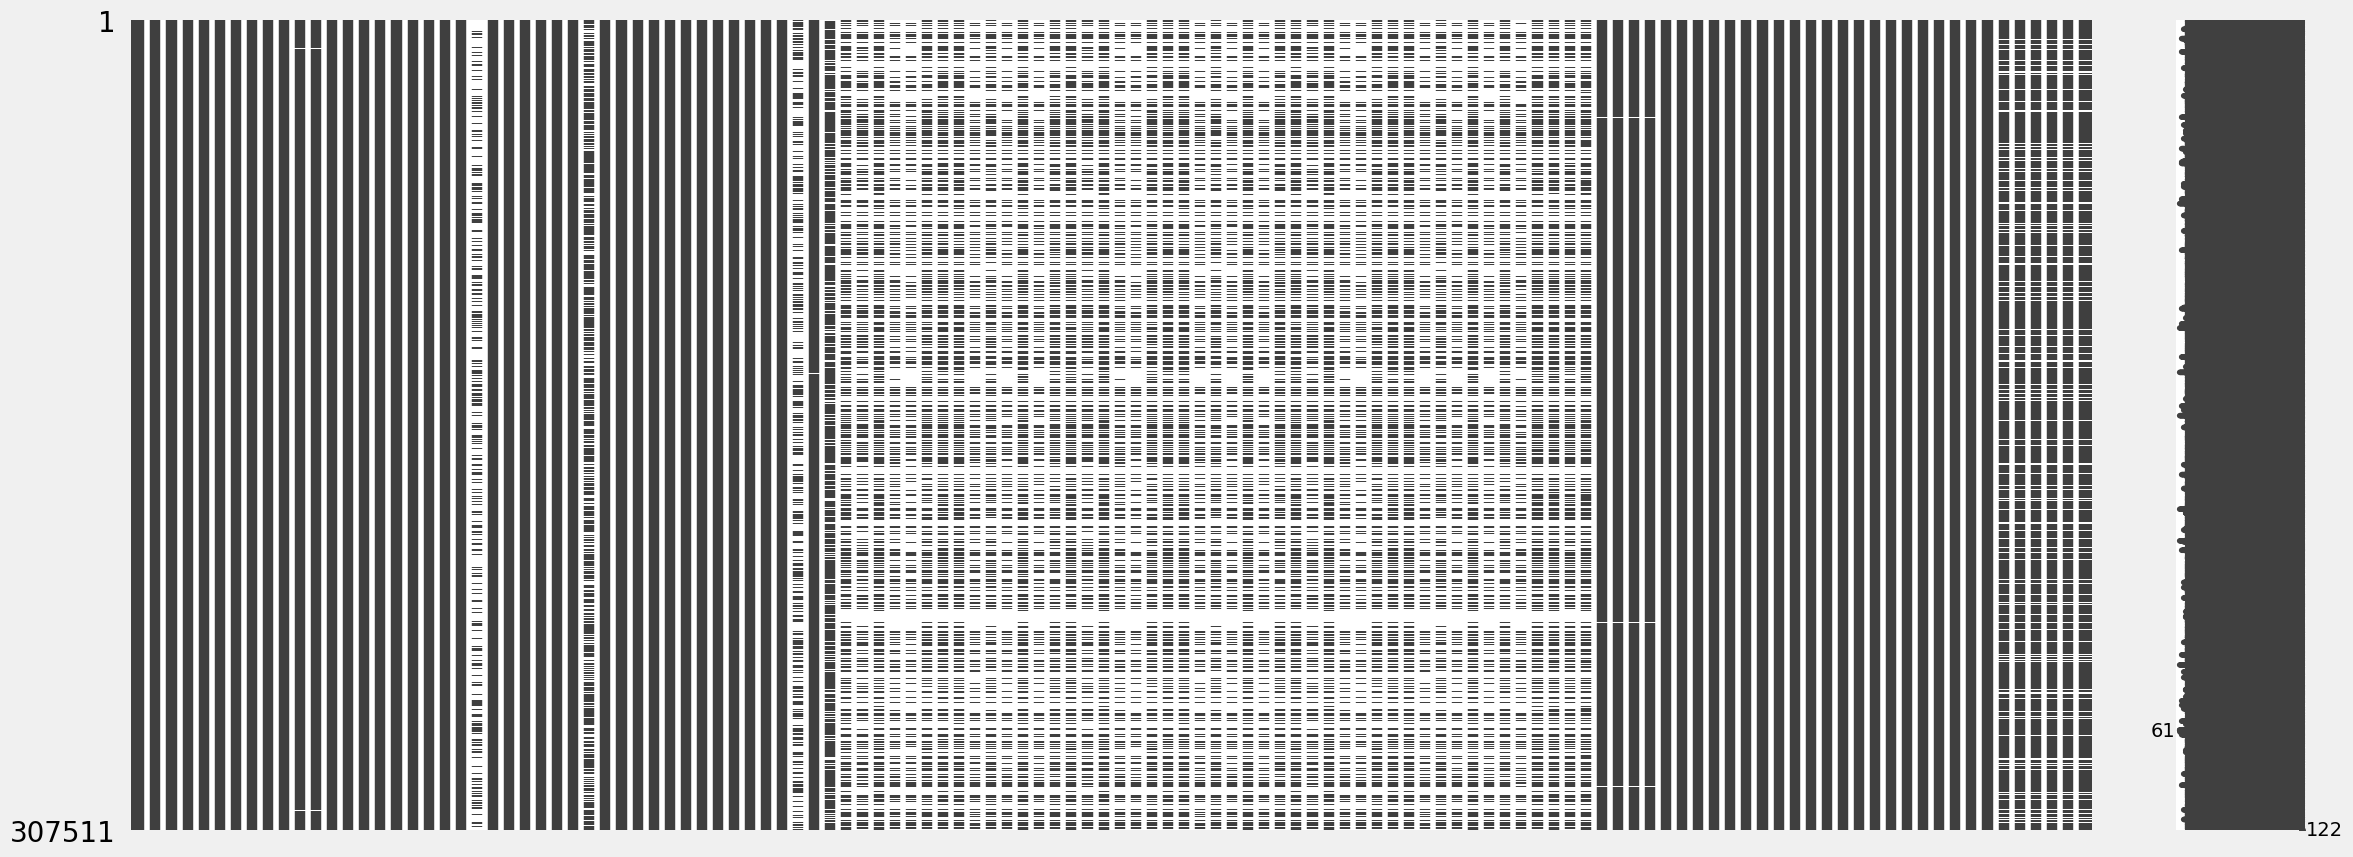

In [15]:
#null value calculation
#application_data missing values
import missingno as mn
mn.matrix(application_data)
# it will check the missing values in application_data

In [16]:
#the application_data as to many missing values now check for each columns the percentage of missing values
round (application_data.isnull().sum()/application_data.shape[0]*100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [17]:
#plot the missing values is more then 40% vs missing values with 40%being the cut_off marks

In [18]:
null_applicationDF=pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()


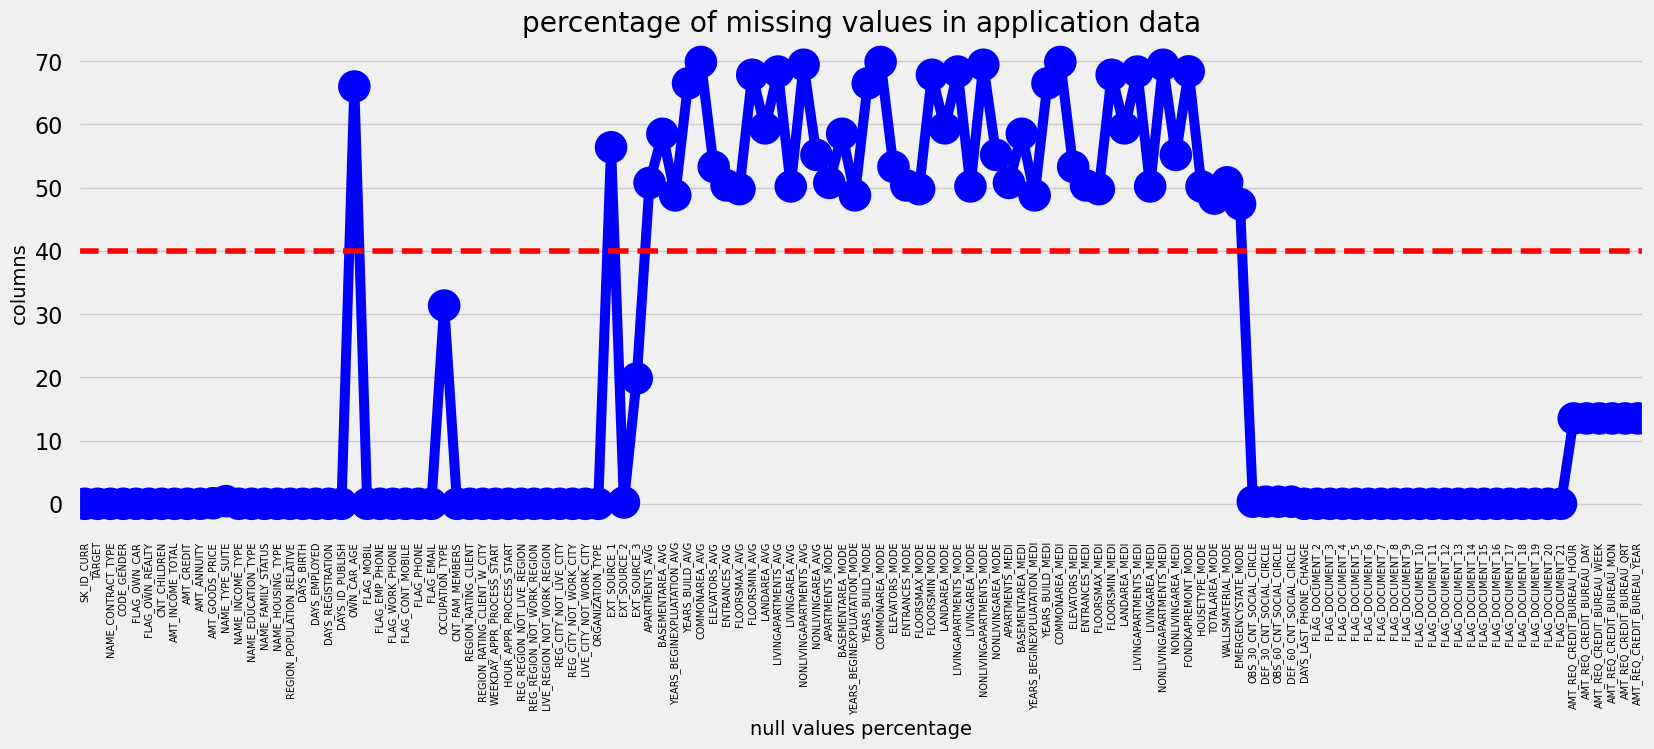

In [19]:
null_applicationDF.columns=['columns name ','null values percentage']
fig=plt.figure(figsize=(18,6))
ax=sns.pointplot(x='columns name ',y='null values percentage',data=null_applicationDF,color='b')
plt.xticks(rotation=90,fontsize=7)
ax.axhline(40,ls='--',color='r')
plt.title('percentage of missing values in application data')
plt.xlabel('null values percentage')
plt.ylabel('columns')
plt.show()

from the plot we can see the columns in which percentage of null values more then 40% 
are marked above the red line and the columns which have less than 40% null values below
the red line let's check the colums which has more than 40 % missing values

In [20]:
nullcol_40_application =null_applicationDF[null_applicationDF['null values percentage']>=40]
nullcol_40_application

columns name   null values percentage
21                   OWN_CAR_AGE               65.990810
41                  EXT_SOURCE_1               56.381073
44                APARTMENTS_AVG               50.749729
45              BASEMENTAREA_AVG               58.515956
46   YEARS_BEGINEXPLUATATION_AVG               48.781019
47               YEARS_BUILD_AVG               66.497784
48                COMMONAREA_AVG               69.872297
49                 ELEVATORS_AVG               53.295980
50                 ENTRANCES_AVG               50.348768
51                 FLOORSMAX_AVG               49.760822
52                 FLOORSMIN_AVG               67.848630
53                  LANDAREA_AVG               59.376738
54          LIVINGAPARTMENTS_AVG               68.354953
55                LIVINGAREA_AVG               50.193326
56       NONLIVINGAPARTMENTS_AVG               69.432963
57             NONLIVINGAREA_AVG               55.179164
58               APARTMENTS_MODE               50.749729
59             BASEMENTAREA_MODE               58.515956
60  YEARS_BEGINEXPLUATATION_MODE               48.781019
61              YEARS_BUILD_MODE               66.497784
62               COMMONAREA_MODE               69.872297
63                ELEVATORS_MODE               53.295980
64                ENTRANCES_MODE               50.348768
65                FLOORSMAX_MODE               49.760822
66                FLOORSMIN_MODE               67.848630
67                 LANDAREA_MODE               59.376738
68         LIVINGAPARTMENTS_MODE               68.354953
69               LIVINGAREA_MODE               50.193326
70      NONLIVINGAPARTMENTS_MODE               69.432963
71            NONLIVINGAREA_MODE               55.179164
72               APARTMENTS_MEDI               50.749729
73             BASEMENTAREA_MEDI               58.515956
74  YEARS_BEGINEXPLUATATION_MEDI               48.781019
75              YEARS_BUILD_MEDI               66.497784
76               COMMONAREA_MEDI               69.872297
77                ELEVATORS_MEDI               53.295980
78                ENTRANCES_MEDI               50.348768
79                FLOORSMAX_MEDI               49.760822
80                FLOORSMIN_MEDI               67.848630
81                 LANDAREA_MEDI               59.376738
82         LIVINGAPARTMENTS_MEDI               68.354953
83               LIVINGAREA_MEDI               50.193326
84      NONLIVINGAPARTMENTS_MEDI               69.432963
85            NONLIVINGAREA_MEDI               55.179164
86            FONDKAPREMONT_MODE               68.386172
87                HOUSETYPE_MODE               50.176091
88                TOTALAREA_MODE               48.268517
89            WALLSMATERIAL_MODE               50.840783
90           EMERGENCYSTATE_MODE               47.398304

In [21]:
#checking how many values have more than or equal to 40 % null values?

len(nullcol_40_application)

49

Total of 49 columns are there which have more than 40% null values.seems like most of the columns with high missing values are related to different area size on apartment owned/rented by the loan applicant

<Axes: >

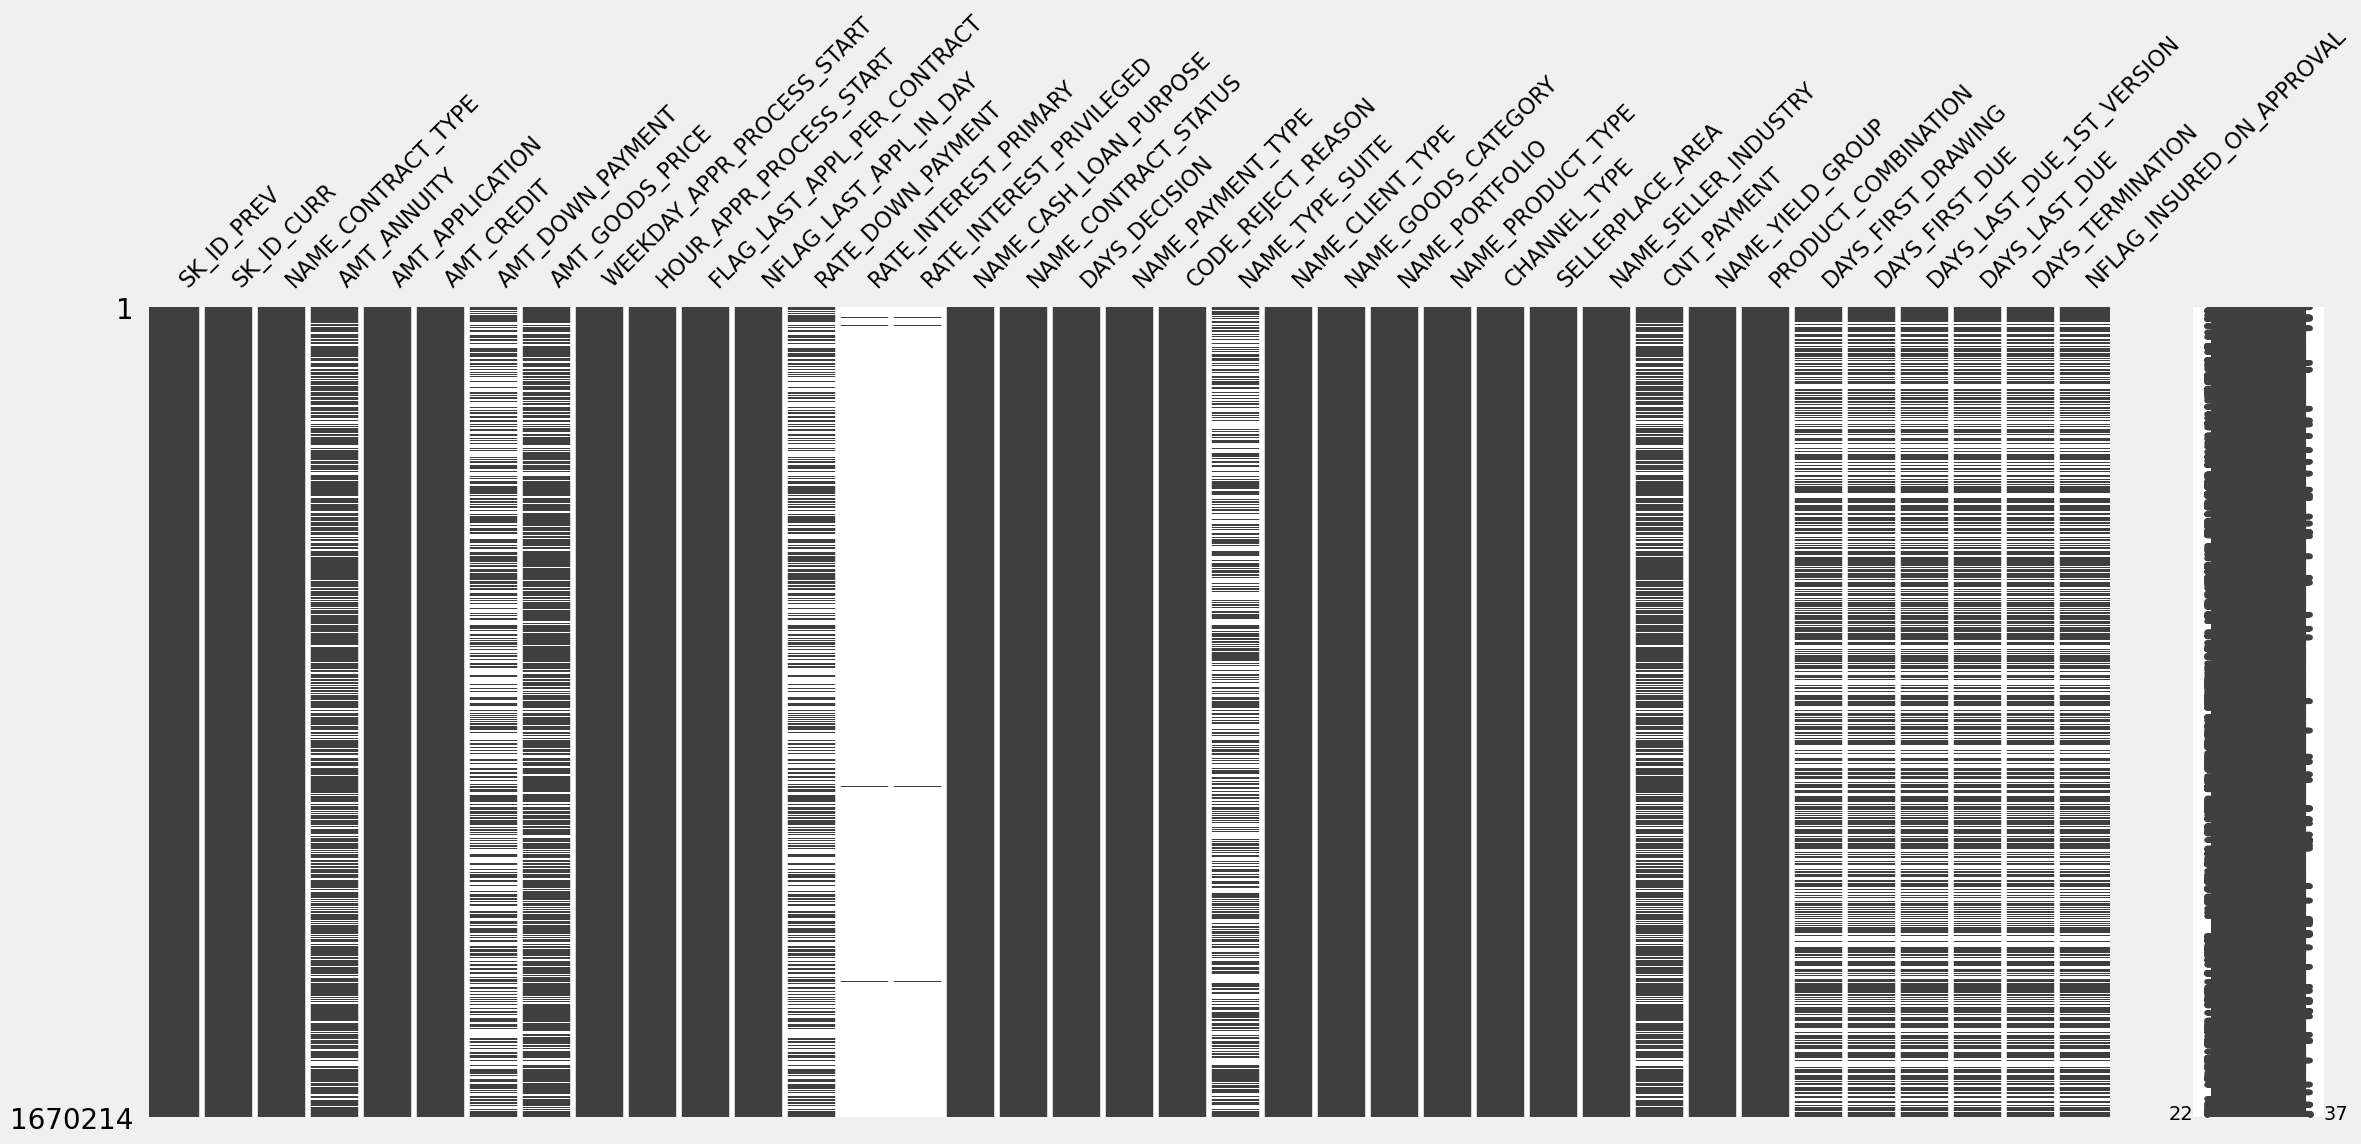

In [22]:
mn.matrix(previous_application)

In [23]:
#checking the null values % of each column in previous_application dataframe
round(previous_application.isnull().sum()/previous_application.shape[0]*100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

#there are many columns in previous_application where missing values more then 40%.let's plot the columns vs missing values% with 40 % being the cut-off marks

In [24]:
null_previousDF=pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()

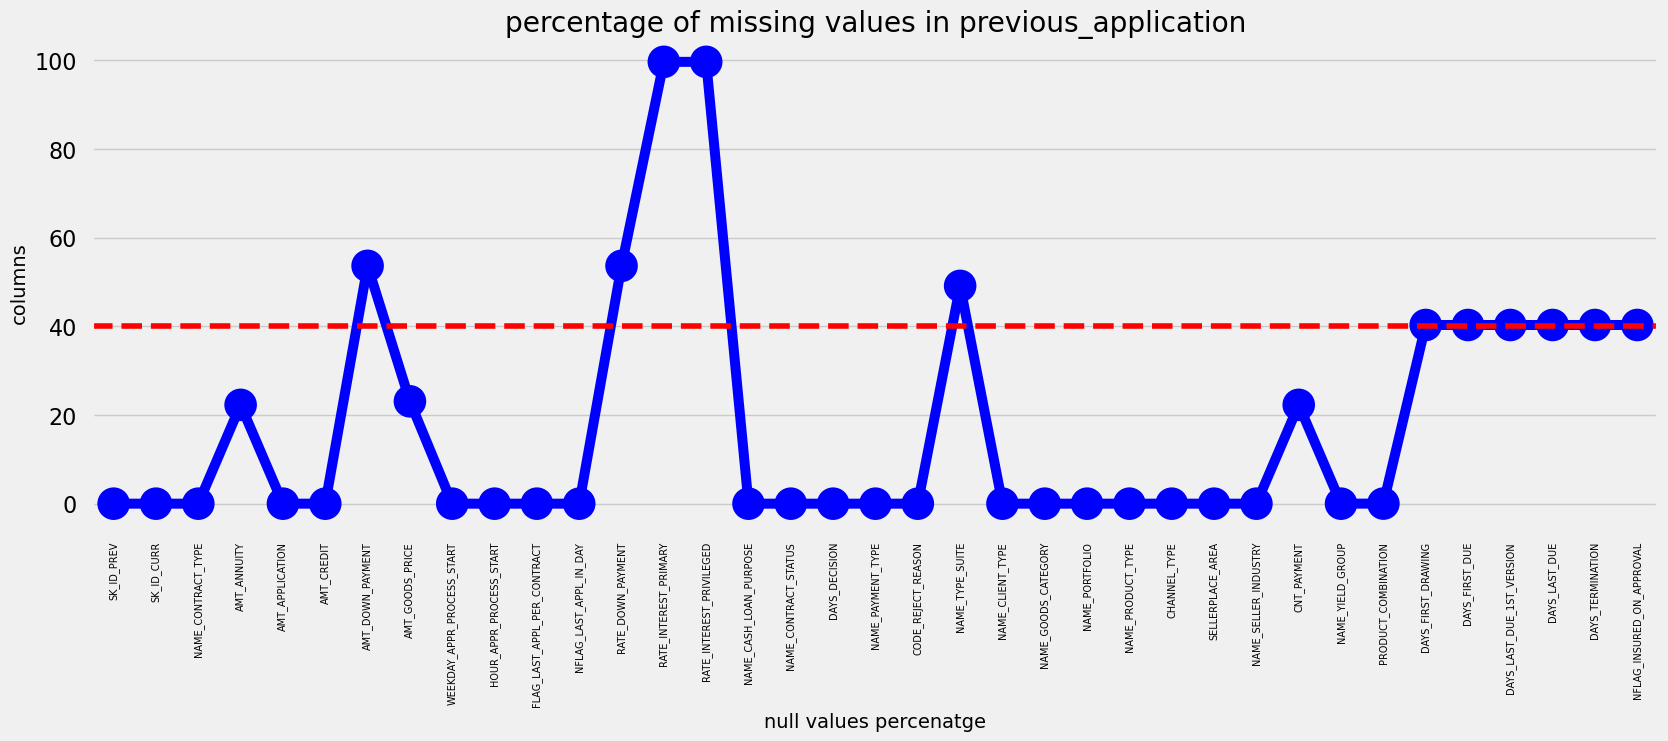

In [25]:
null_previousDF.columns=['columns name','null values percentage']
fig=plt.figure(figsize=(18,6))
ax=sns.pointplot(x='columns name',y='null values percentage',data=null_previousDF,color='b')
plt.xticks(rotation=90,fontsize=7)
ax.axhline(40,ls='--',color='r')
plt.title('percentage of missing values in previous_application')
plt.xlabel('null values percenatge')
plt.ylabel('columns')
plt.show()

form the plot we can see the columns iun which percentage of null values more than 40% are marked above the red line and the columns which have less than 40% null values below the red line let's ckeck the columns which has more than 40% missing values

In [26]:
#more than or equal to 40 % empty rows columns 
nullcol_40_previous=null_previousDF[null_previousDF['null values percentage']>=40]
nullcol_40_previous

columns name  null values percentage
6            AMT_DOWN_PAYMENT               53.636480
12          RATE_DOWN_PAYMENT               53.636480
13      RATE_INTEREST_PRIMARY               99.643698
14   RATE_INTEREST_PRIVILEGED               99.643698
20            NAME_TYPE_SUITE               49.119754
31         DAYS_FIRST_DRAWING               40.298129
32             DAYS_FIRST_DUE               40.298129
33  DAYS_LAST_DUE_1ST_VERSION               40.298129
34              DAYS_LAST_DUE               40.298129
35           DAYS_TERMINATION               40.298129
36  NFLAG_INSURED_ON_APPROVAL               40.298129

In [27]:
#check how many columns have more than or equal to 40 null values
len(nullcol_40_previous)

11

Total 11 of columns are there which have more then 40% null values .there columns can bee deleted .Before deleting these columns let's review if there are more columns which xcan be droped or not 

# Analyze & Delete unnecessary Columns in application_data

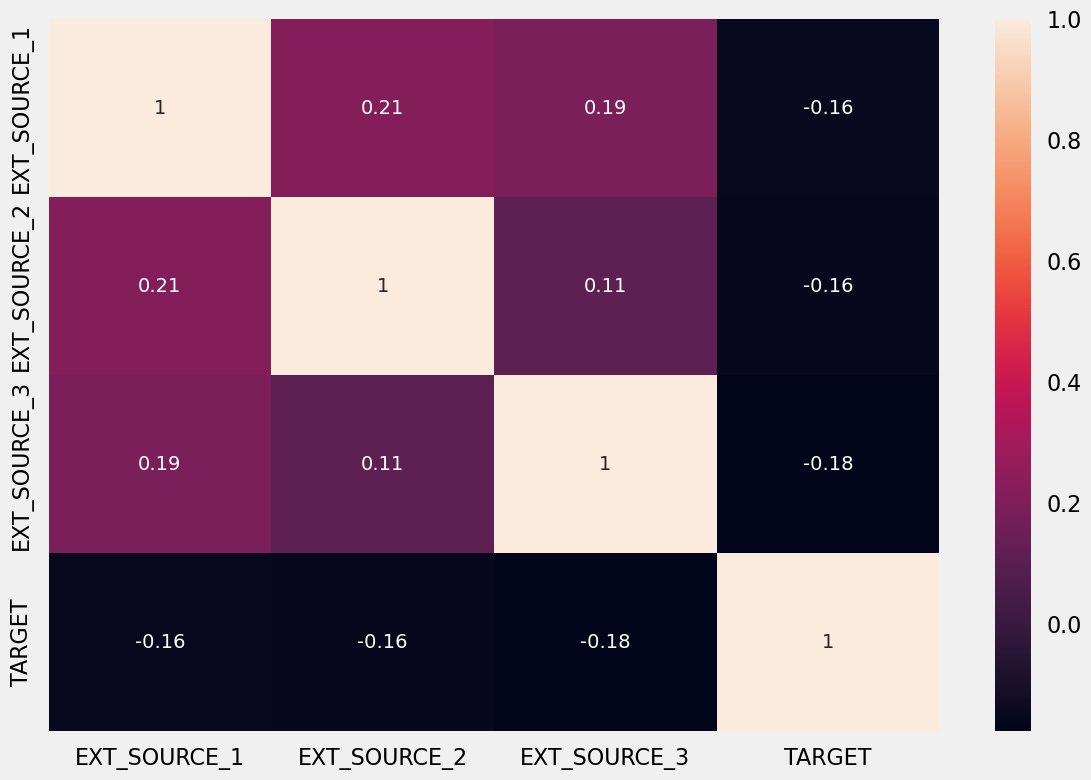

In [28]:
#ext_source_X
#checking correlation of EXT_SOURCE_X columns vs TARGET columns
source=application_data[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr=source.corr()
ax=sns.heatmap(source_corr,xticklabels=source_corr.columns,yticklabels=source_corr.columns,annot=True,)

based on the above heatmap we can see there is amlost no correlation between EXT_SOURCE_X columns and target column thus we can drop these columns.EXT_SOURCE_1 has 56% null values,where as EXT_SOURCE_3 has close to 20% null values

In [29]:
# create a list of columns that needs to be dropped including the columns with >40% null values

In [30]:
Unwanted_application=nullcol_40_application['columns name '].tolist()+['EXT_SOURCE_2','EXT_SOURCE_3']
#as EXT_SOURCE_1 columns is alreday inculded in nullcol_40_application
len(Unwanted_application)

51

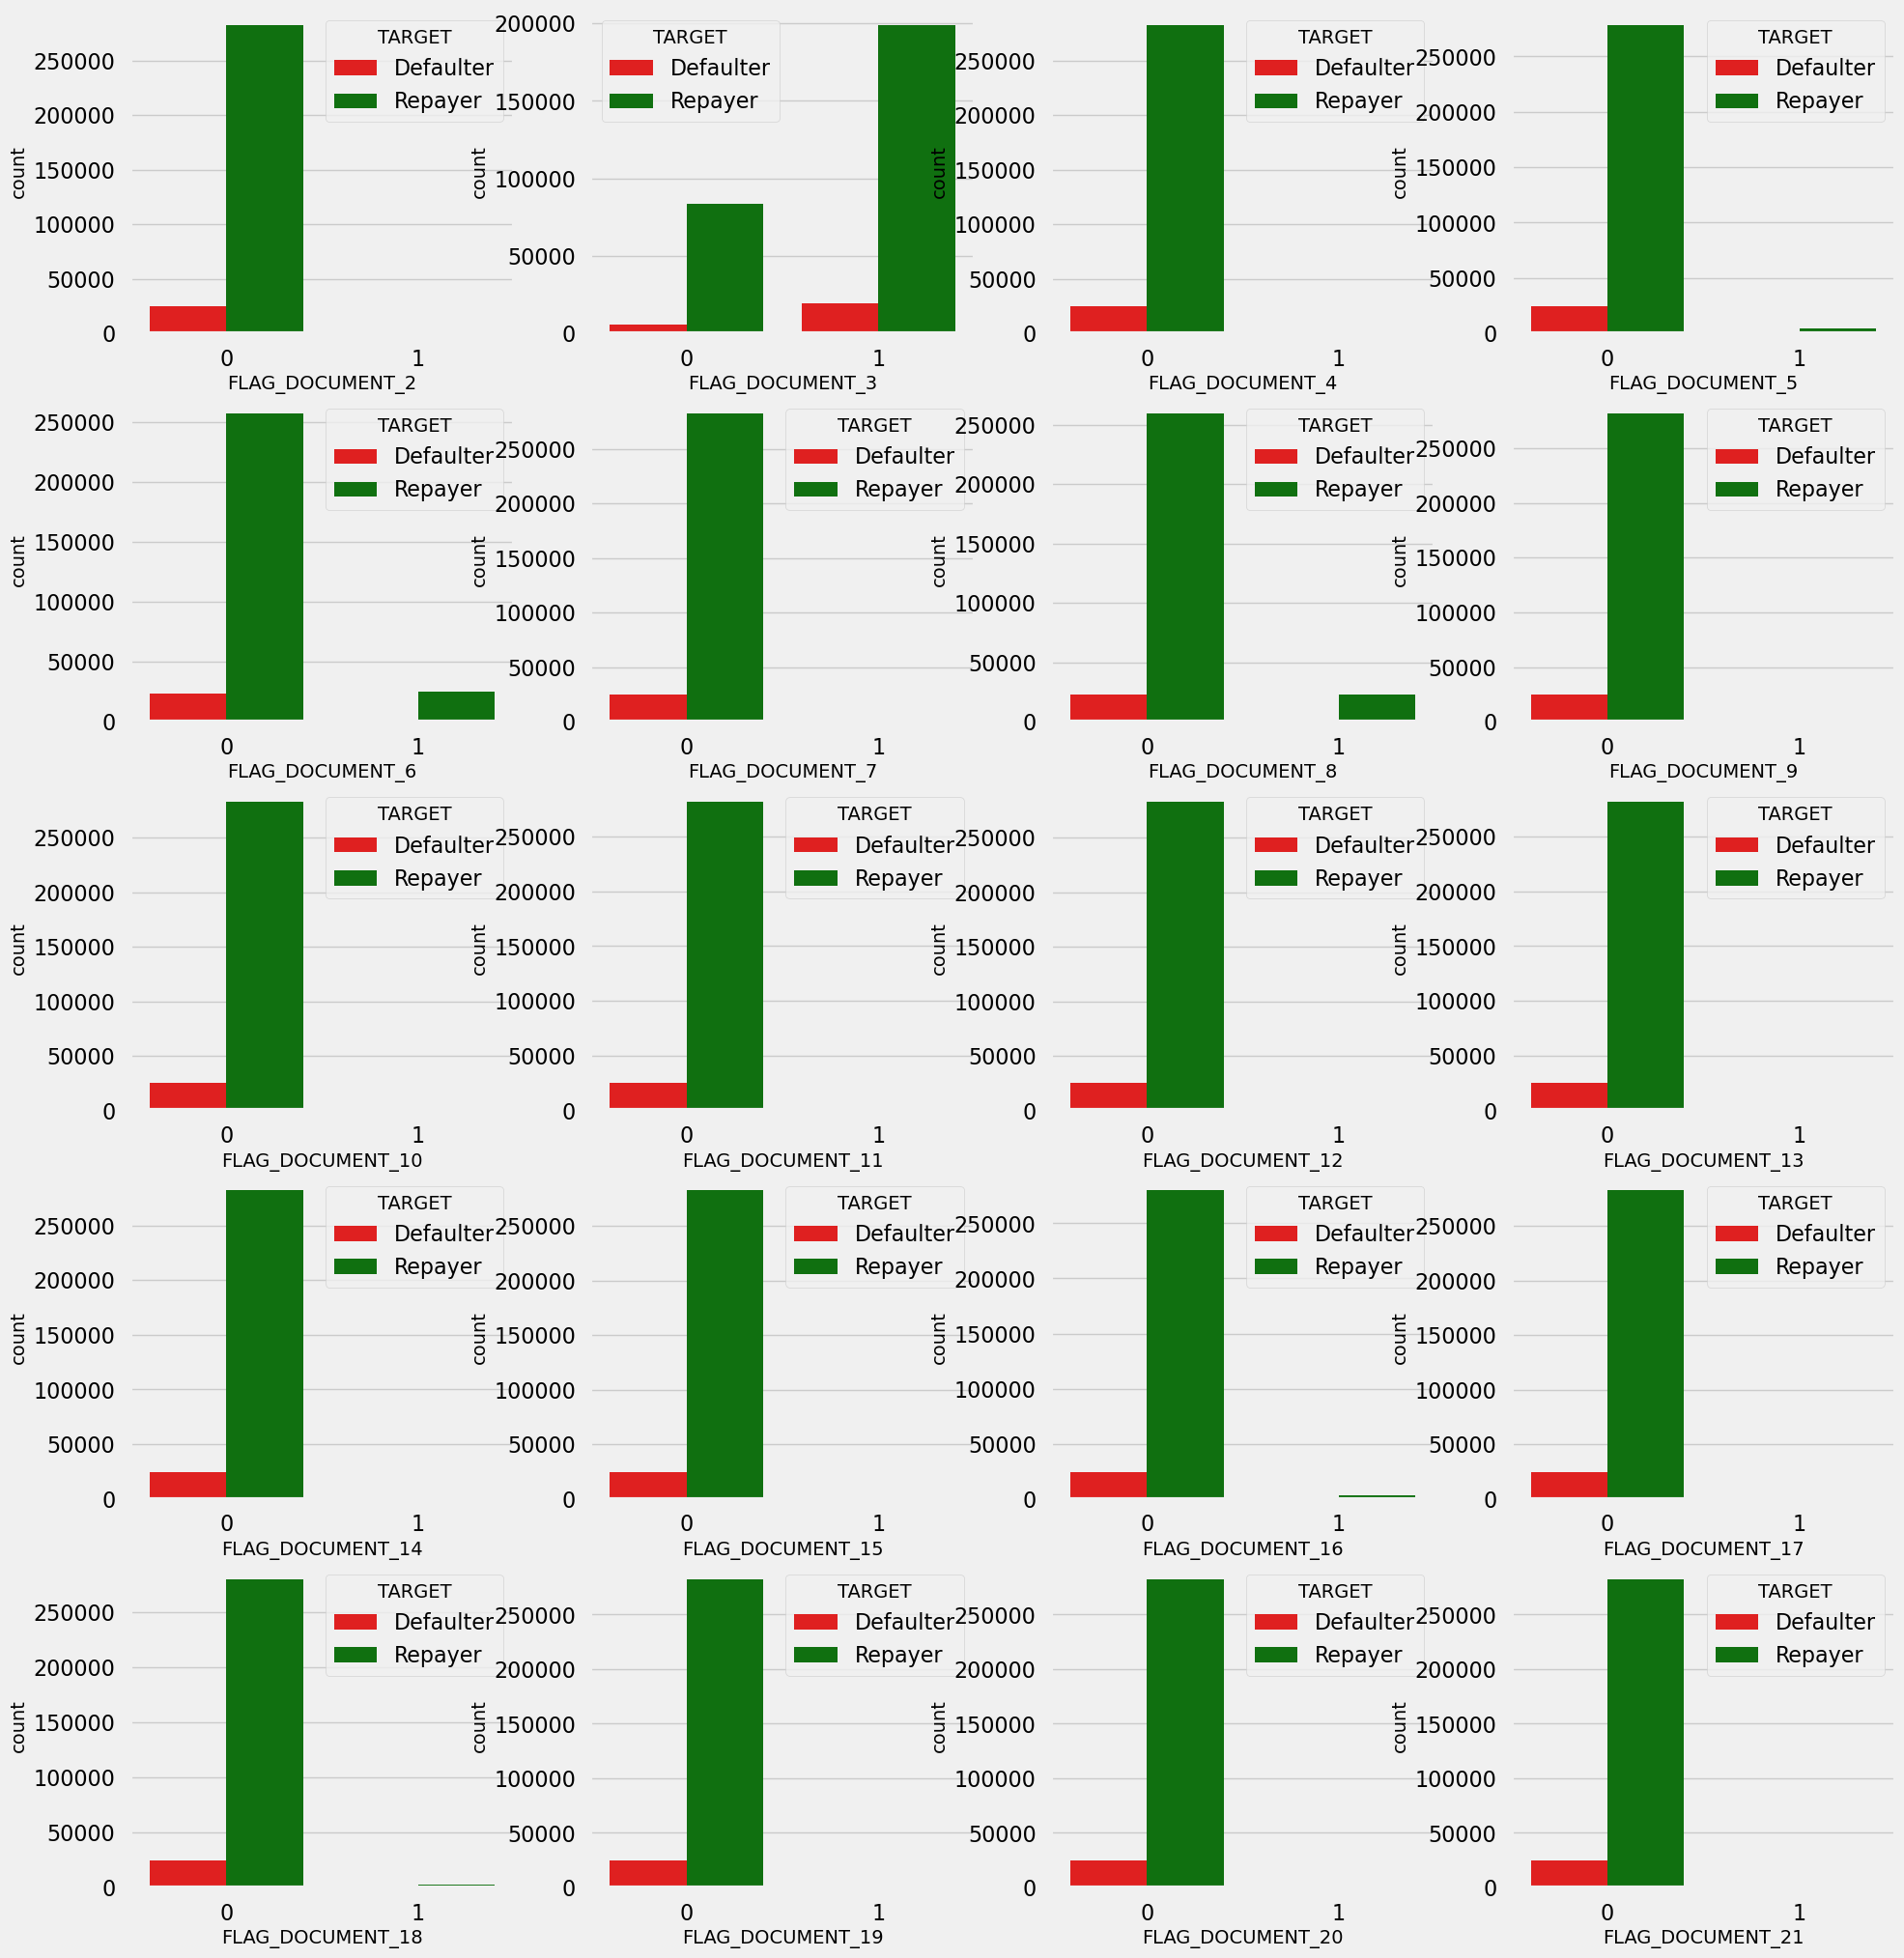

In [31]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
           'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


df_flag = application_data[col_Doc+["TARGET"]]

length = len(col_Doc)


df_flag['TARGET']=df_flag['TARGET'].replace({1:'Defaulter',0:'Repayer'})


fig=plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax=sns.countplot(data=df_flag,x=i,hue='TARGET',palette=['r','g'])



form the above we have seen that is most of the loan application cases,clients who applied for loans has not submitted FLAG_DOCUMENT_X. except FLAG_DOCUMENT_3, thus except for FLAG_DOCUMENT_3 , can delete rest of the columns. data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [32]:
if 'FLAG_DOCUMENT_3' in list(col_Doc):
    print('pavan')
else:
    print('no')

pavan


In [33]:
col_Doc.remove('FLAG_DOCUMENT_3')

In [34]:
Unwanted_application=Unwanted_application+col_Doc
len(Unwanted_application)

70

In [35]:
print(col_Doc)

['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


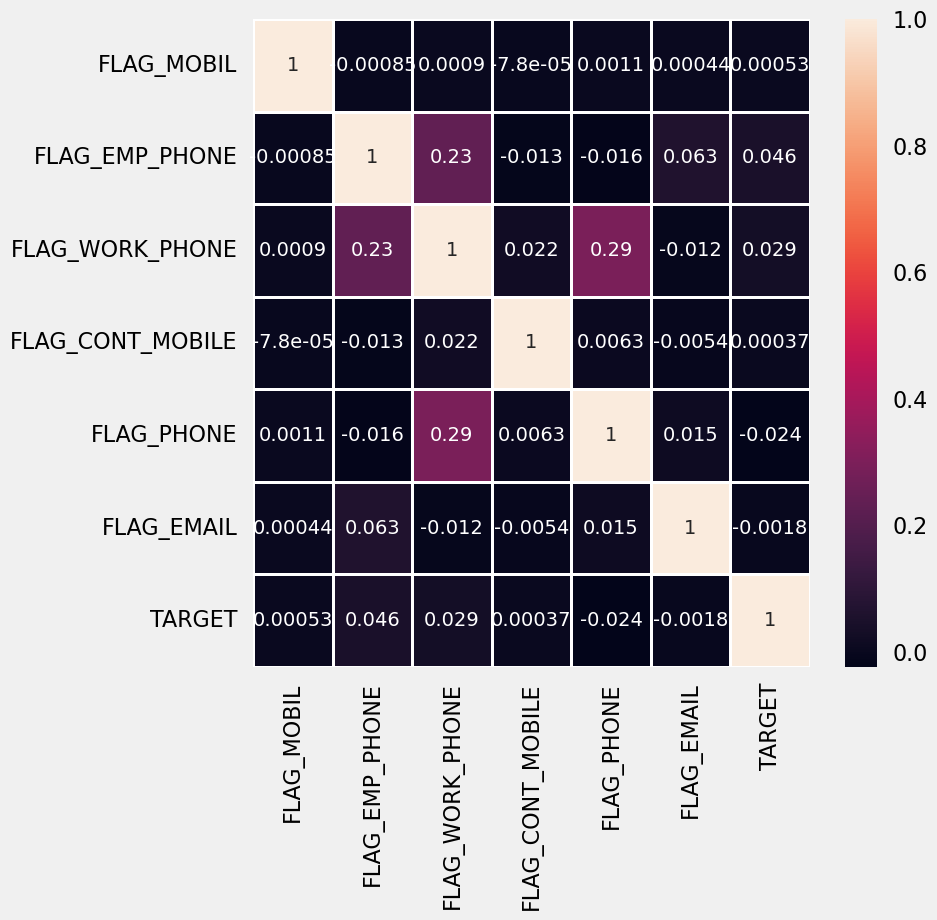

In [36]:
contact_col=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']
Contanct_corr=application_data[contact_col].corr()
fig=plt.figure(figsize=(8,8))
ax=sns.heatmap(Contanct_corr,xticklabels=Contanct_corr.columns,yticklabels=Contanct_corr.columns,annot=True,linewidth=1)

here there is no correlation  between flags of moblie phone ,email etc with loan repayment columns can be deleted

In [37]:
#including teh 6 FLAG columns to be deleted 
contact_col.remove('TARGET')
Unwanted_application=Unwanted_application+contact_col
len(Unwanted_application)

76

now total 76 columns can be deleted form application_data

In [38]:
application_data.drop(labels=Unwanted_application,axis=1,inplace=True)

In [39]:
application_data.shape

(307511, 46)

In [40]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

here after deleting unnecessary columns 46 columns are remaining in application_data

# Analyze &Delete Unnecessary Columns in previous_application

In [41]:
#Getting the 11 columns which has more than 40% unknown
Unwanted_previous= nullcol_40_previous['columns name'].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [42]:
#List downed columns which are not needed
Unnecessary_previous=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [43]:
Unwanted_previous=Unwanted_previous+Unnecessary_previous
len(Unwanted_previous)

15

now total 15 columns can be deleted forn previous_application

In [44]:
#droping the unnecessary columns from previous 
previous_application.drop(labels=Unwanted_previous,axis=1,inplace=True)
#inspecting the dataframe after removel of unnecessary columns
previous_application.shape

(1670214, 22)

In [45]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

after deleting unnecessary columns there are 22 columns remaining in application_data

# standardize values

# strategy for application_data
*convertDAYS_DECISION,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH form negative to positive as days can not be negative.



*convert DAYS_BIRTH from negative to positive values and calculate age and create categorical bins columns


*categorize the amount variables into bins


*convert region rating column and few other columns to categorical

In [46]:
#coverting negative days to posiotive days 
date_col=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']



for col in date_col:
     application_data[col]=abs(application_data[col])

#binning numerical columns to create a categorical columns

# creating bis for income amount


application_data['AMT_INCOME_TOTAL']=application_data['AMT_INCOME_TOTAL']/100000


bins=[0,1,2,3,4,5,6,7,8,9,10,11]

slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']


application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=slots)



application_data['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

the 100% loan application have income amount in the range of more then 100k almost 100%

In [47]:
application_data['AMT_CREDIT']=application_data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']
application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)



#checking the binning of data and % of data in each category


application_data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

# insight:
more than 16% loan applicants have takesn loan which amounts to more than 1M


In [48]:
#creating bins for age 
application_data['AGE']=application_data['DAYS_BIRTH']//365

bins=[0,20,30,40,50,100]

slots=['0-20','20-30','30-40','40-50','50 above']

application_data['AGE_GROUP']=pd.cut(application_data['AGE'],bins=bins,labels=slots)

In [49]:
#checking the binning of data and % of data in eah category

application_data['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

# insight:
31 loan application have age above 50 years. more than 55% fo loan application have age over 40 years

In [50]:
#creating bins for employement Time

application_data['YEARS_EMPLOYED']=application_data['DAYS_EMPLOYED']//365
bins=[0,5,10,20,30,40,50,60,150]
slots=['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

application_data['EMPLOYMENT_YEAR']=pd.cut(application_data['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [51]:
#checking the binnning of data and % of data in each category
application_data['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

insight:


more than 55% of the loan application have work experience with in 0-5 years and almost 80% of them ahve less then 10 years of work experience

In [52]:
#checking the number of unique each column possess to identify categorical columns
application_data.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

# Data type conversion


In [53]:
#inspecting the columns types if they are in correct data type using the above result.
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

 ==insight:==
        numerical columns are alreay in int64 and float 64 format.hence proceeding with other columns 

In [54]:
# coversion of object and numerical columns to categorical columns

categorical_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY',]
for col in categorical_columns:
    application_data[col]=pd.Categorical(application_data[col])

In [55]:
#inspecting the columns types if the above conversion is reflected 
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

strategy for previousa_application:
    
    
    convert days_decision from negative to positive values and create categorical bins columns .
    
    
    convert loan purpose and few other columns to categorical

In [56]:
#checking the number of unique value sesch columns possess to identify ategorical columns 
previous_application.nunique().sort_values()

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [57]:
# inspecting the columns types if the above coversion is reflected 
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [58]:
previous_application['DAYS_DECISON']=abs(previous_application['DAYS_DECISION'])

In [59]:
# Age group calculation e.g 388 will be grouped as 300-400 
previous_application['DAYS_DECISION_GROUP']=(previous_application['DAYS_DECISION']-(previous_application['DAYS_DECISION'] % 400)).astype(str)+''+ ((previous_application['DAYS_DECISION'] - (previous_application['DAYS_DECISION'] % 400)) + (previous_application['DAYS_DECISION'] % 400) + (400 - (previous_application['DAYS_DECISION'] % 400))).astype(str)

In [60]:
previous_application['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

-4000         37.574526
-800-400      22.900299
-1200-800     12.426012
-1600-1200     7.899646
-2800-2400     6.292188
-2000-1600     5.791174
-2400-2000     5.689750
-3200-2800     1.426404
Name: DAYS_DECISION_GROUP, dtype: float64

almost 37 % loan application have applied for a new loan with in 0-400 days previous loan decision


In [61]:
# converting categorical columns from object to categorical 
Categorical_col_p=['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']
for col in Categorical_col_p:
    previous_application[col]=pd.Categorical(previous_application[col])

In [62]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

# Null Value Data Imputation

#imputaing null values in application

# strategy for application_data

*To impute null values in categorical variables which has lower null percentage model() is used to the most frequent iteams.

*To impute null values in categorical variables which has higher null percentage, a new category is created.

*To impute null values in numeriacl variables which has lower null percentage median() is used as 
  
there are no outliers in the columns 

mean returnd decimal values and median reutrned whole number and teh columns were number of requests


In [63]:
#checking the null values% od each column in application_data dataframe

round(application_data.isnull().sum()/application_data.shape[0]*100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

impute categorical variable NAME_TYPE_SUITE which has lower null percentage(0.42%) with the most frequent category using mode()[o]:

In [64]:
application_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [65]:
application_data['NAME_TYPE_SUITE'].fillna((application_data['NAME_TYPE_SUITE'].mode()[0]),inplace=True)


Impute categorical variable 'OCCUPATION_TYPE' whioch has higher null percentage (31.35%) with a new category as assigning to any existing category might influence the analysis:

In [66]:
application_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count               265992.000000              265992.000000               265992.000000              265992.000000              265992.000000               265992.000000
mean                     0.006402                   0.007000                    0.034362                   0.267395                   0.265474                    1.899974
std                      0.083849                   0.110757                    0.204685                   0.916002                   0.794056                    1.869295
min                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
50%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    1.000000
75%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    3.000000
max                      4.000000                   9.000000                    8.000000                  27.000000                 261.000000                   25.000000

Impute with median as mean has decimals and this is number of requests

In [67]:
amount=['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for col in amount:
    application_data[col].fillna(application_data[col].median(),inplace=True)

In [68]:
#checking the null value % of each column in previous_data dataframe
round(application_data.isnull().sum()/previous_application.shape[0]*100.00,2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.02
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                5.77
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION  

#insight:


we still few null values in the columns:AMT_GOODS_PRICE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE.

    We can ignore as this percentage is very less:

# Imputing Null values in Previous_application


strategy for applicationDF

*to impute null values in numrecal coolumns we analysed the loan status and assigned values

*to impute null values in continuous variables we ploktted the distribution of the columns and used

*median if the distribution is skewed

*mode if the distribution pattern is preserved.


In [69]:
#check the null value % of each columns in previus_application dataframe
round(previous_application.isnull().sum()/previous_application.shape[0]*100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISON               0.00
DAYS_DECISION_GROUP        0.00
dtype: float64

impute AMT_ANNUITY with median as sthe distribution is  greatly skewed:

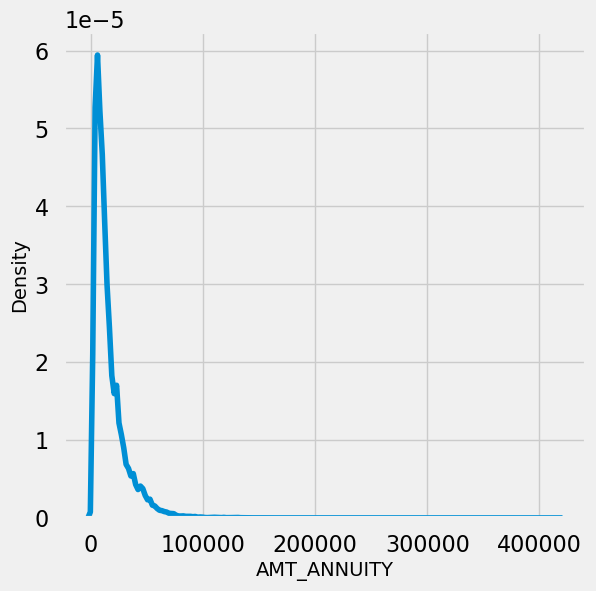

In [70]:
plt.figure(figsize=(6,6))
sns.kdeplot(previous_application['AMT_ANNUITY'])
plt.show()

insight:
 There is a single peak at the left side of the distribution and it indoicates teh presence fo outlirs and hence imputing with mean would not be the right approach and hence imputing with median.
 


In [71]:
previous_application['AMT_ANNUITY'].fillna(previous_application['AMT_ANNUITY'].median(),inplace=True)

Impute AMT_GOODS_PRICE with mode as the distribution is closely similar

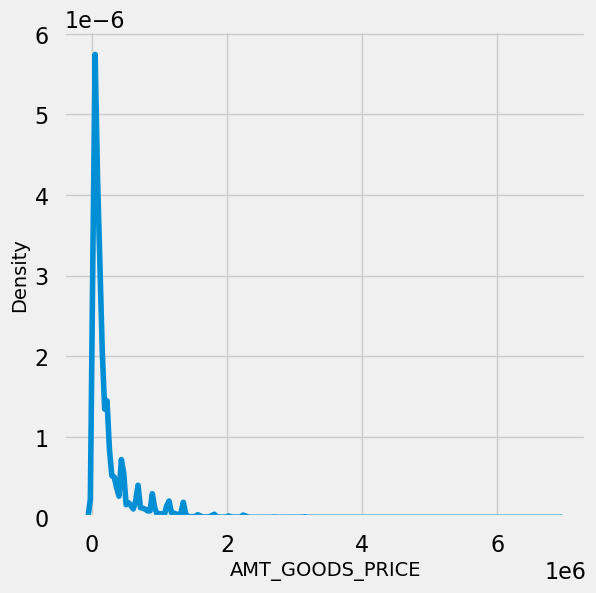

In [72]:
plt.figure(figsize=(6,6))
sns.kdeplot(previous_application['AMT_GOODS_PRICE'][pd.notnull(previous_application['AMT_GOODS_PRICE'])])
plt.show()

there are several peaks along the distribution.Let's impute using the mode, mean and median and see if the distribution is still about the same

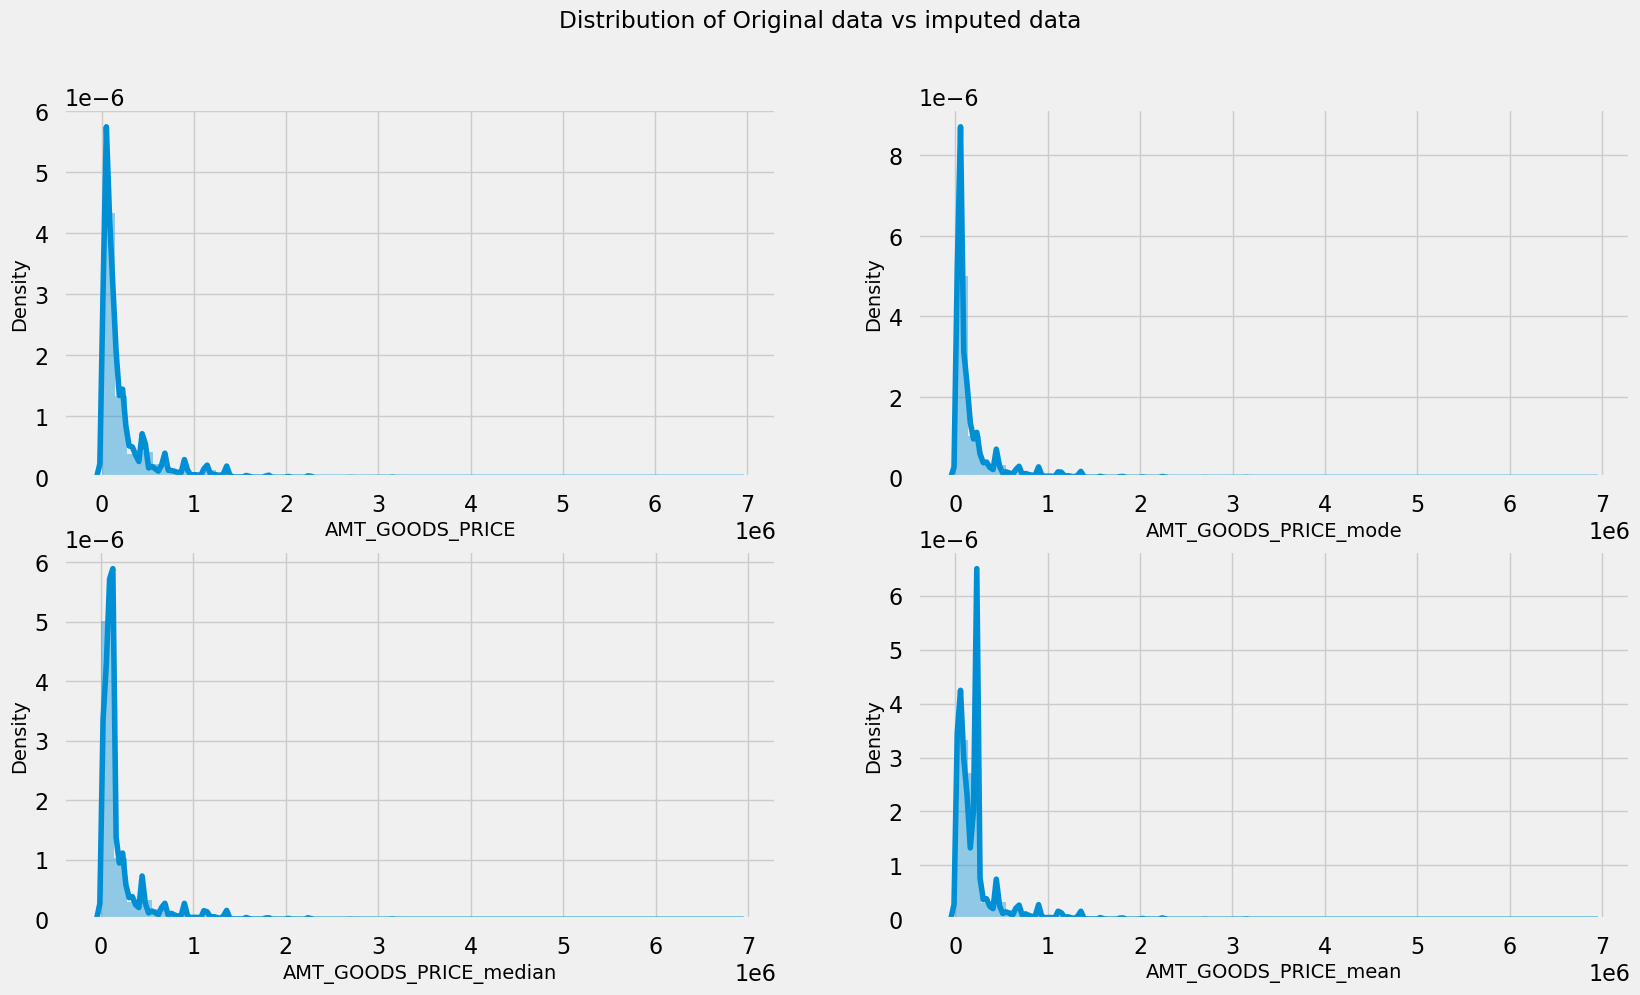

In [73]:
statsDF=pd.DataFrame()
#new dataframe with columns imputed with mode, median and mean

statsDF['AMT_GOODS_PRICE_mode']=previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median']=previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean']=previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].mean())
cols=['AMT_GOODS_PRICE_mode','AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']
plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(previous_application['AMT_GOODS_PRICE'][pd.notnull(previous_application['AMT_GOODS_PRICE'])])
for i in enumerate(cols):
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

The original distribution is closer with the distribution of data imputed with mode in this case

In [74]:
previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].mode(),inplace=True)

Impute CNT_PAYMENT with o as the NAME_CONTRACT_STATUS  for these indicate that most of these loans were not started:

In [75]:
previous_application.loc[previous_application['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [76]:
previous_application['CNT_PAYMENT'].fillna(0,inplace=True)

In [77]:
#checking the null value % of each column in previous_application dataframe
round(previous_application.isnull().sum()/previous_application.shape[0]*100.00,2)


SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY                0.00
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT                0.00
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISON               0.00
DAYS_DECISION_GROUP        0.00
dtype: float64

insight:
 
we still have few null values in the PRODUCT_COMBINATION column. we can ignore as this porecentage is vary less.

# Identifying the outliers 

finding outlier information in application_data

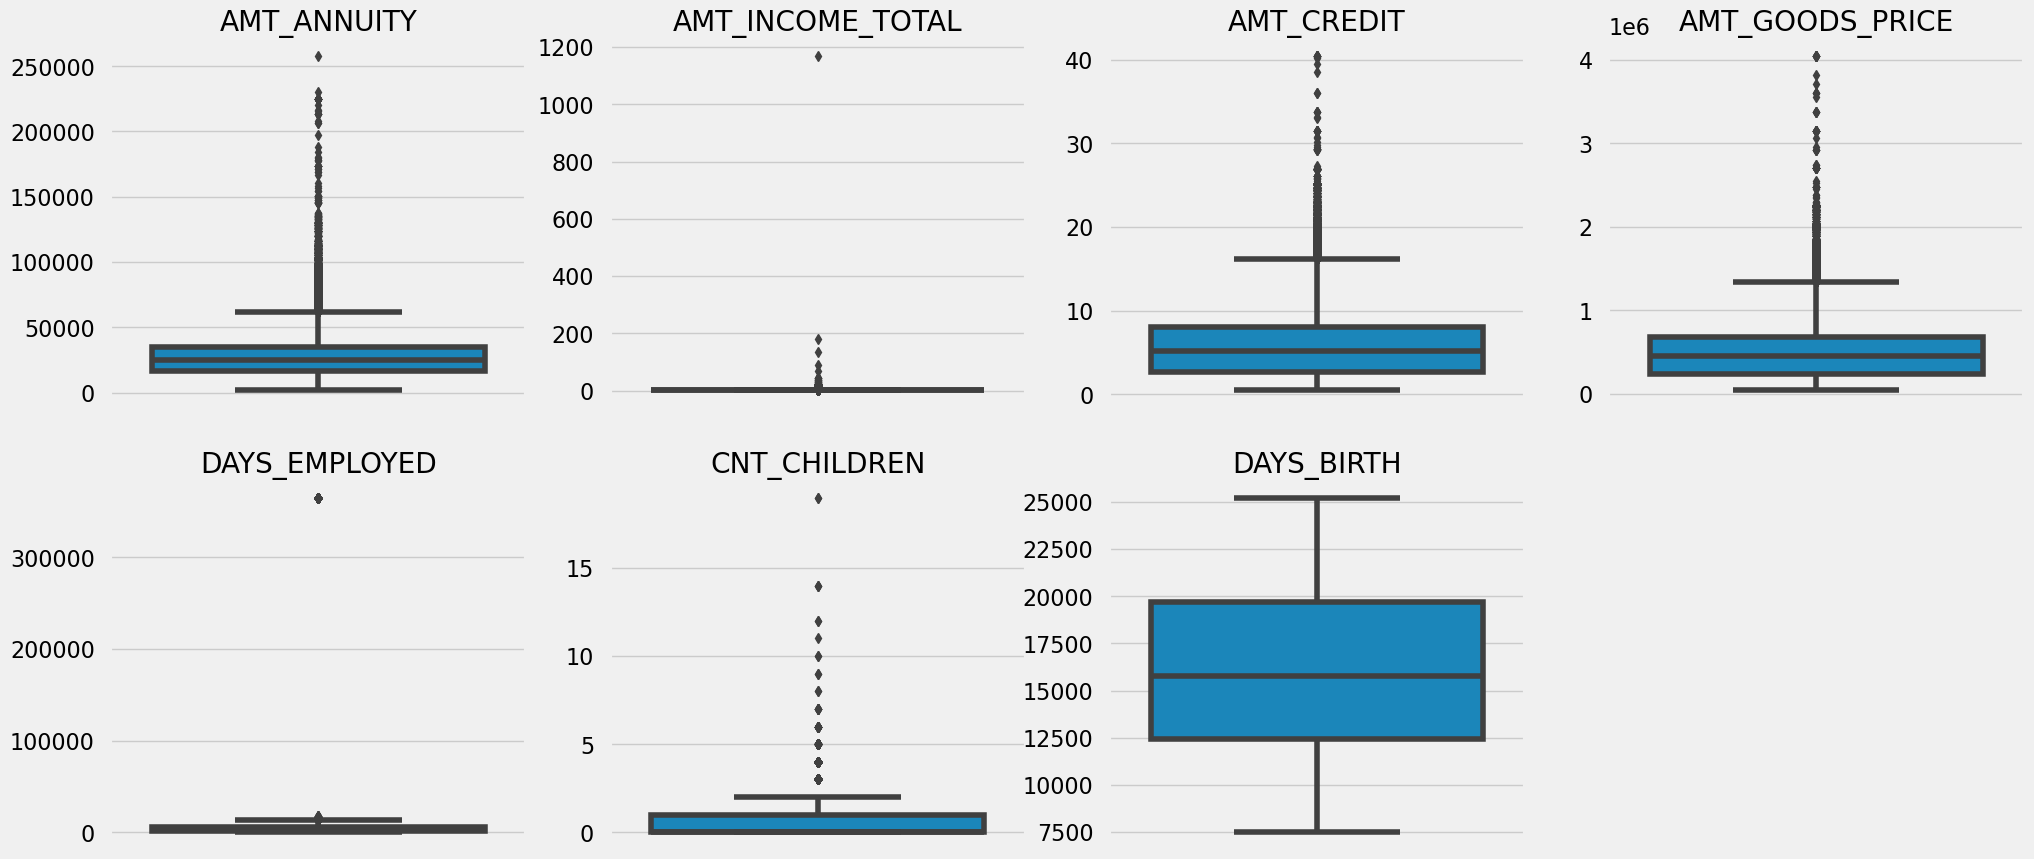

In [78]:
plt.figure(figsize=(22,10))
app_outlier_col_1=['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=application_data[i[1]])
    plt.title(i[1])
    plt.ylabel('')
for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=application_data[i[1]])
    plt.title(i[1])
    plt.ylabel('')

insight:

it can be seen that in current application data

1,AMT_ANNUITY,AMT_CREDIT,
AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.

2.AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.

3.DAYS_BIRTH has outlier values which mean the data available is reliable

4.DAYS_EMPLOYED has outlier values around 350000(days) which is round 958 years which is impossible and hence this has to be incorrect entry.


In [79]:
application_data[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL     AMT_CREDIT  AMT_GOODS_PRICE     DAYS_BIRTH   CNT_CHILDREN  DAYS_EMPLOYED
count  307499.000000     307511.000000  307511.000000     3.072330e+05  307511.000000  307511.000000  307511.000000
mean    27108.573909          1.687979       5.990260     5.383962e+05   16036.995067       0.417052   67724.742149
std     14493.737315          2.371231       4.024908     3.694465e+05    4363.988632       0.722121  139443.751806
min      1615.500000          0.256500       0.450000     4.050000e+04    7489.000000       0.000000       0.000000
25%     16524.000000          1.125000       2.700000     2.385000e+05   12413.000000       0.000000     933.000000
50%     24903.000000          1.471500       5.135310     4.500000e+05   15750.000000       0.000000    2219.000000
75%     34596.000000          2.025000       8.086500     6.795000e+05   19682.000000       1.000000    5707.000000
max    258025.500000       1170.000000      40.500000     4.050000e+06   25229.000000      19.000000  365243.000000

finding outlier information in previous_data

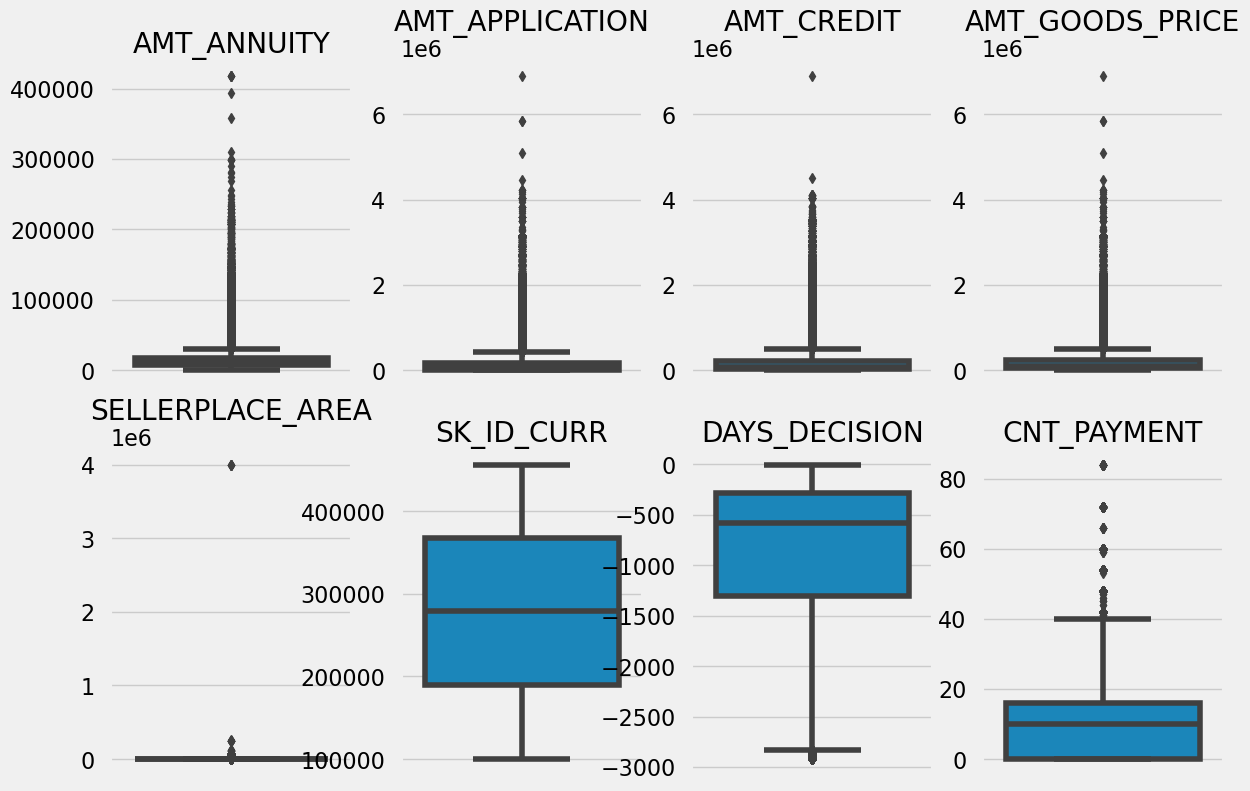

In [80]:
prev_outlier_col_1=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2=['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previous_application[i[1]])
    plt.title(i[1])
    plt.ylabel('')
for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previous_application[i[1]])
    plt.title(i[1])
    plt.ylabel('')

insight:

1.AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE,SELLERPLACE_AREA have huge number of outliers.

2.CNT_PAYMENT has few outlier values.

3.SK_ID_CURR is ID column and hence no outliers

4.DAYS_DECISION has little and of outlier indicating that these previous application decision were taken long back

In [81]:
previous_application[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_DECISION
count  1.670214e+06     1.670214e+06  1.670213e+06     1.284699e+06      1.670214e+06  1.670214e+06   1.670214e+06
mean   1.490651e+04     1.752339e+05  1.961140e+05     2.278473e+05      3.139511e+02  1.247621e+01  -8.806797e+02
std    1.317751e+04     2.927798e+05  3.185746e+05     3.153966e+05      7.127443e+03  1.447588e+01   7.790997e+02
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00     -1.000000e+00  0.000000e+00  -2.922000e+03
25%    7.547096e+03     1.872000e+04  2.416050e+04     5.084100e+04     -1.000000e+00  0.000000e+00  -1.300000e+03
50%    1.125000e+04     7.104600e+04  8.054100e+04     1.123200e+05      3.000000e+00  1.000000e+01  -5.810000e+02
75%    1.682403e+04     1.803600e+05  2.164185e+05     2.340000e+05      8.200000e+01  1.600000e+01  -2.800000e+02
max    4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06      4.000000e+06  8.400000e+01  -1.000000e+00

# 5.data analysis

the data analysis flow has been planned in following way:

Imbalance in data:


Categorical data analysis:-
  
  *Categorical segmented univariate analysis
  
  *Categorical Bi/multivariate analysis
  
Numeric Data Analysis:-

   *BI-furcation of databased based on TARGET data
   
   *correlation matrix
   
   *numerical segmented univariate analysis
   
   *numerical Bi/Multivariate analysis
 
    

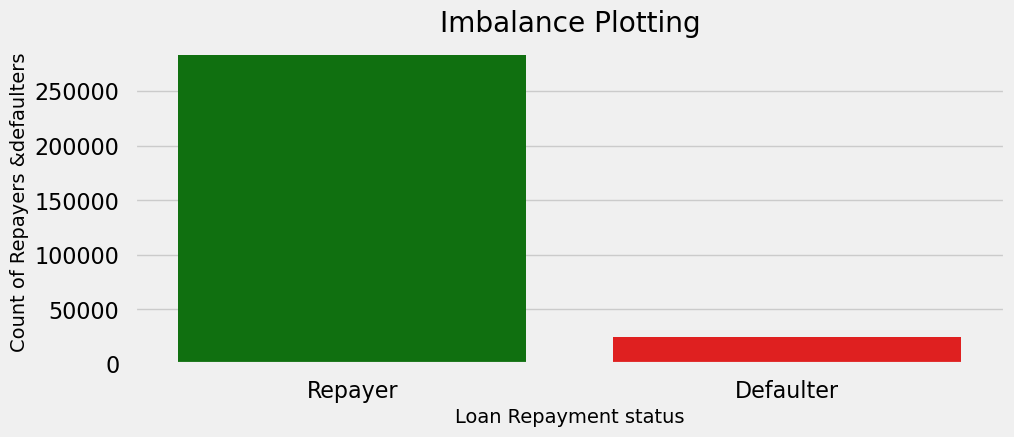

In [82]:
Imbalance=application_data['TARGET'].value_counts().reset_index()
 
plt.figure(figsize=(10,4))
x=['Repayer','Defaulter']
sns.barplot(x=x,y='TARGET',data=Imbalance,palette=['g','r'])
plt.xlabel('Loan Repayment status')
plt.ylabel('Count of Repayers &defaulters')
plt.title('Imbalance Plotting')
plt.show()

In [83]:
count_0=Imbalance.iloc[0]['TARGET']
count_1=Imbalance.iloc[1]['TARGET']
count_0_perc=round(count_0/(count_0+count_1)*100,2)
count_1_perc=round(count_1/(count_0+count_1)*100,2)
print('the imbalance percentage with respect to repayer & defulter data is {} and {}:'.format(count_0_perc,count_1_perc))

the imbalance percentage with respect to repayer & defulter data is 91.93 and 8.07:


In [84]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_DECISON DAYS_DECISION_GROUP
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                    XAP             Approved            -73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            73               -4000
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                    XNA             Approved           -164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low           164               -4000
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    XNA             Approved           -301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high           301               -4000
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                    XNA             Approved           -512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle           512            -800-400
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                Repairs              Refused           -781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high           781            -800-400

In [85]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_YEAR
0      100002       1         Cash loans           M            N               Y             0             2.025    4.065975      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0        200k-300k        400k-500k   25     20-30               1             0-5
1      100003       0         Cash loans           F            N               N             0             2.700   12.935025      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0        200k-300k         1M Above   45     40-50               3             0-5
2      100004       0    Revolving loans           M            Y               Y             0             0.675    1.350000       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                     MONDAY                        9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0      

# Plotting Function

In [86]:
# function for plotting repetitive countplots in univariate categorical analysis on applicationDF
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = application_data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=application_data,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

plt.show()

In [87]:
#funtion for plotting repetitve countplots in bivariate categoical analysis

def bivariate_bar(x,y,df,hue,figsize):
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df,hue=hue,palette=['g','r'])
    #defining aesthetics of labels and title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize':10,'fontweight':3,'color':'b'})
    
    plt.ylabel(y,fontdict={'fontsize':10,'fontweight':3,'color':'b'})
    
    plt.title(col,fontdict={'fontsize':15,'fontweight':5,'color':'b'})
    plt.xticks(rotation=90,ha='right')
    plt.legend(labels=['Repayer','Defaulter'])
    plt.show()

In [88]:
# fuction for plotting repetitve rel plots in bivaritae numerical analysis on application_data

def bivariate_rel(x,y,data,hue,kind,palette,legend,figsize):
    plt.figure(figsize=figsize)
    sns.relplot(x=x,y=y,data=application_data,hue='TARGET',kind=kind,palette=['g','r'],legend=False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90,ha='right')
    plt.show()

In [89]:
# function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col,data=df,hue=hue,palette=palette,order=df[col].value_counts().index)
    
    if ylog:
        plt.yscale('log')
        plt.ylabel('Count (log)',fontdict={'fontsize':10,'fontweight':3,'color':'b'})
    else:
        plt.ylabel('Count',fontdict={'fontsize':10,'fontweight':3,'color':'b'})
        
        plt.title(col,fontdict={'fontsize':15,'fontweight':5,'color':'b'})
        
        plt.legend(loc='upper right')
        
        plt.xticks(rotation=90,ha='right')
        
        plt.show()

In [90]:
#function to plot point ,on merged dataframe
def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x,y=y,hue="TARGET",data=loan_process_df,palette=['g','r'])
    
    plt.legend(['Repayer','Defaulter'])

# categorical variables analysis 

segmented Univariate analysis

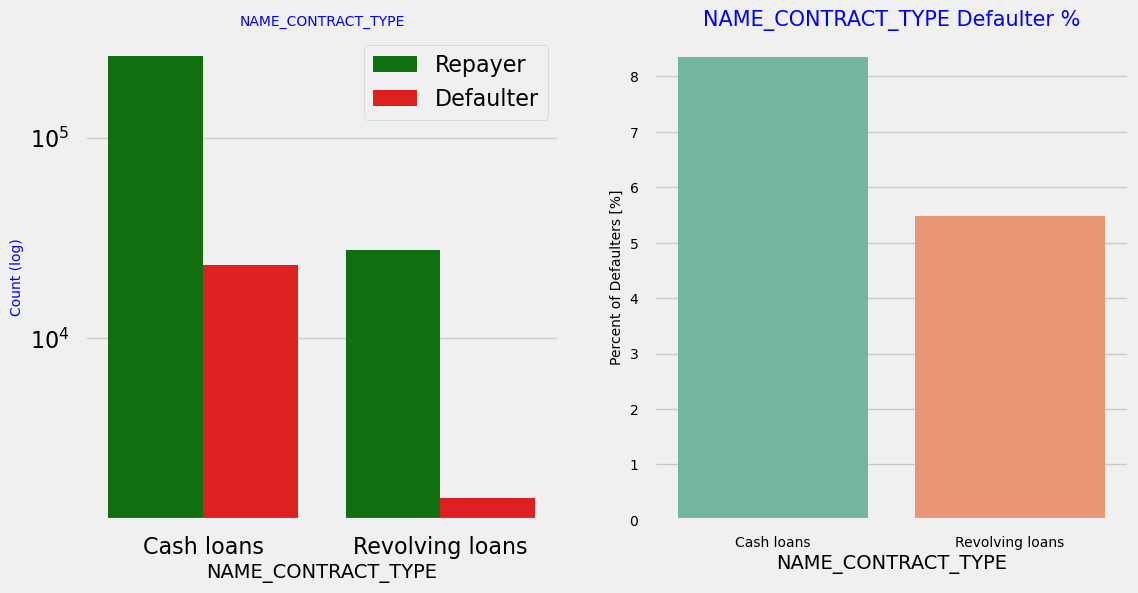

In [91]:
# checking xthe contract tyep based on loan repayment status 
univariate_categorical('NAME_CONTRACT_TYPE',True)


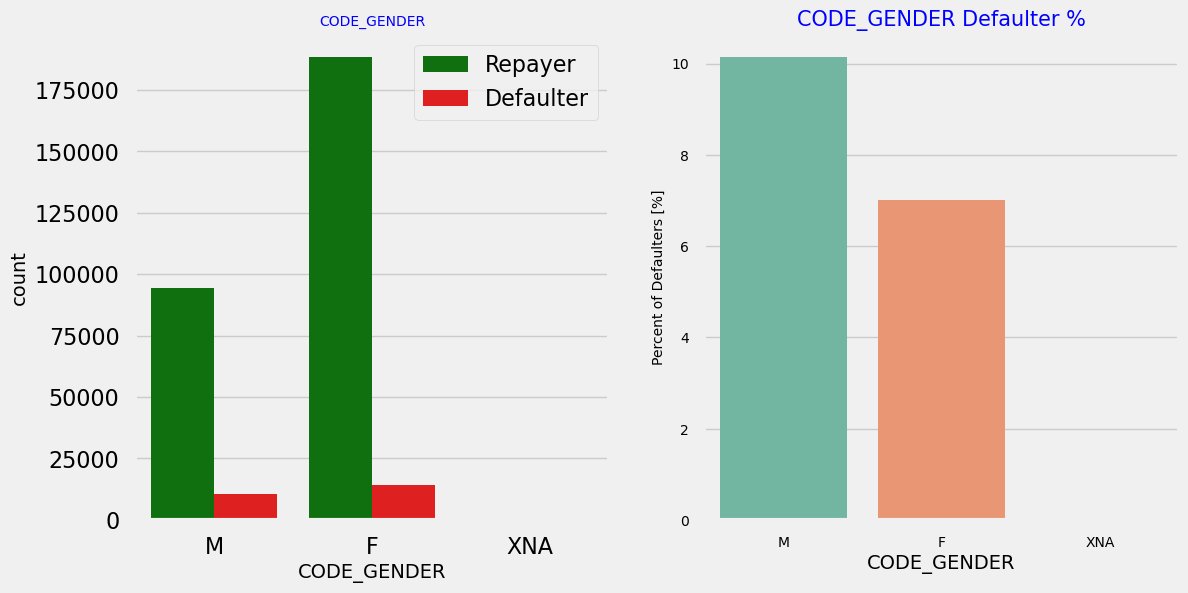

In [92]:
#cheching the type of gender on the loan repayment status 
univariate_categorical('CODE_GENDER')

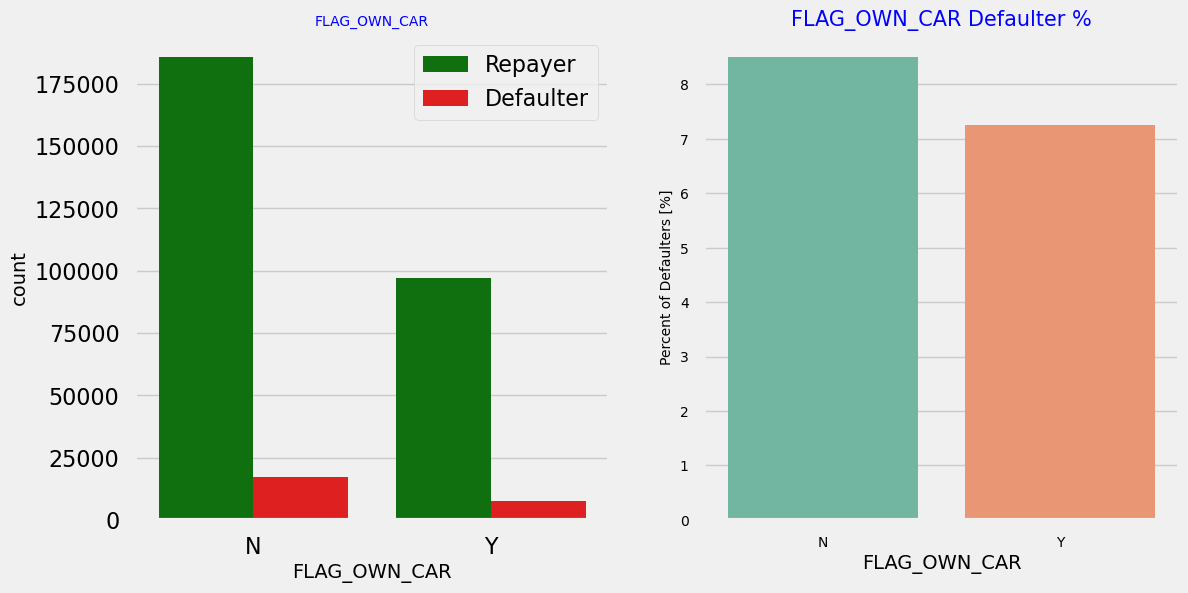

In [93]:
#checking if owing a car is realted to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

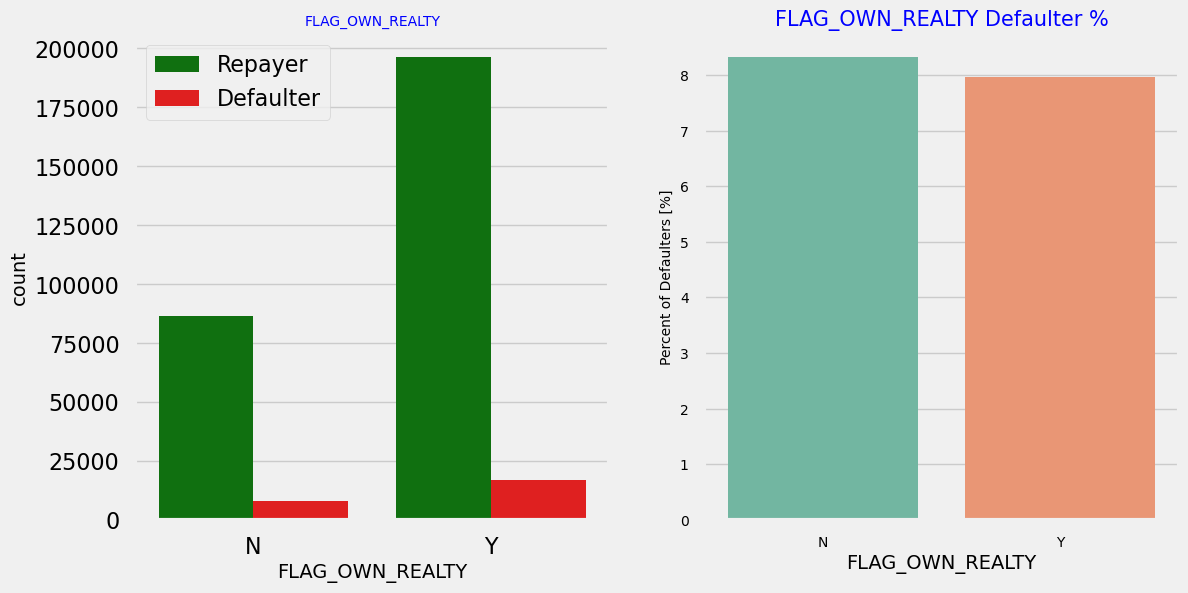

In [94]:
# checkin goif owing a realty is realted to loan repayment status 
univariate_categorical('FLAG_OWN_REALTY')

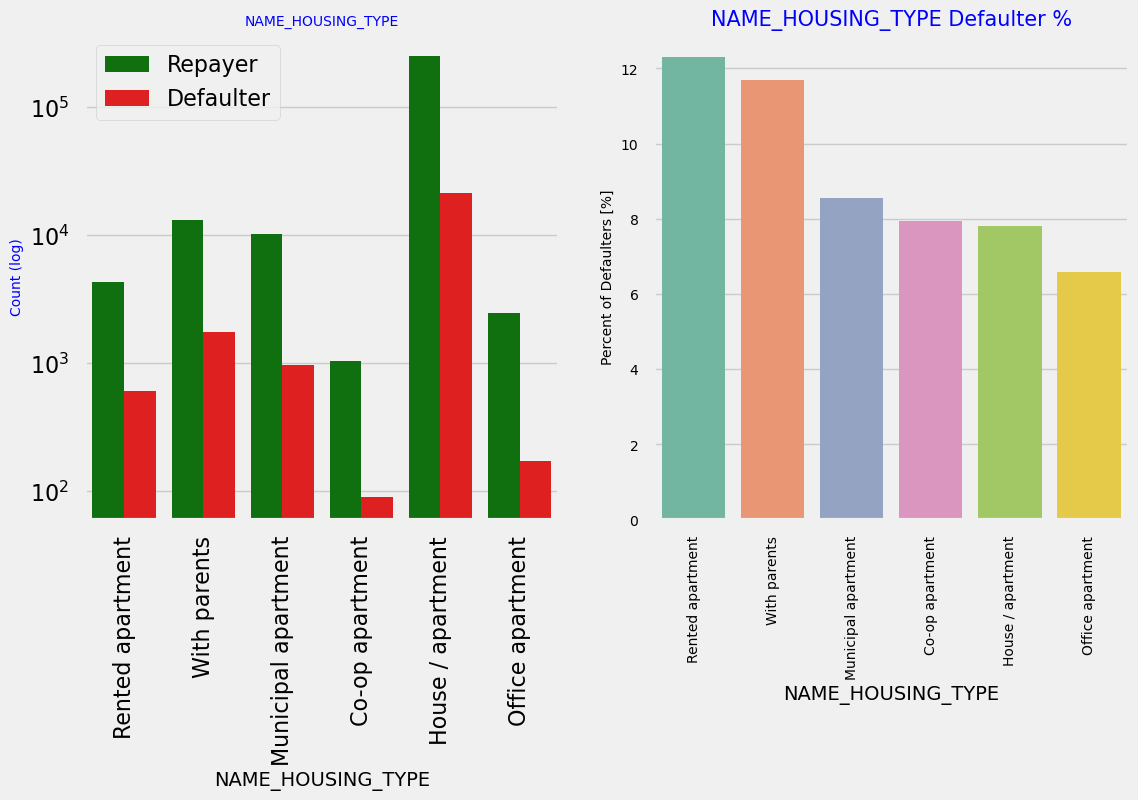

In [95]:

#Analyzing Housing Type based on loan repayment status :=
univariate_categorical('NAME_HOUSING_TYPE',True,True,True)

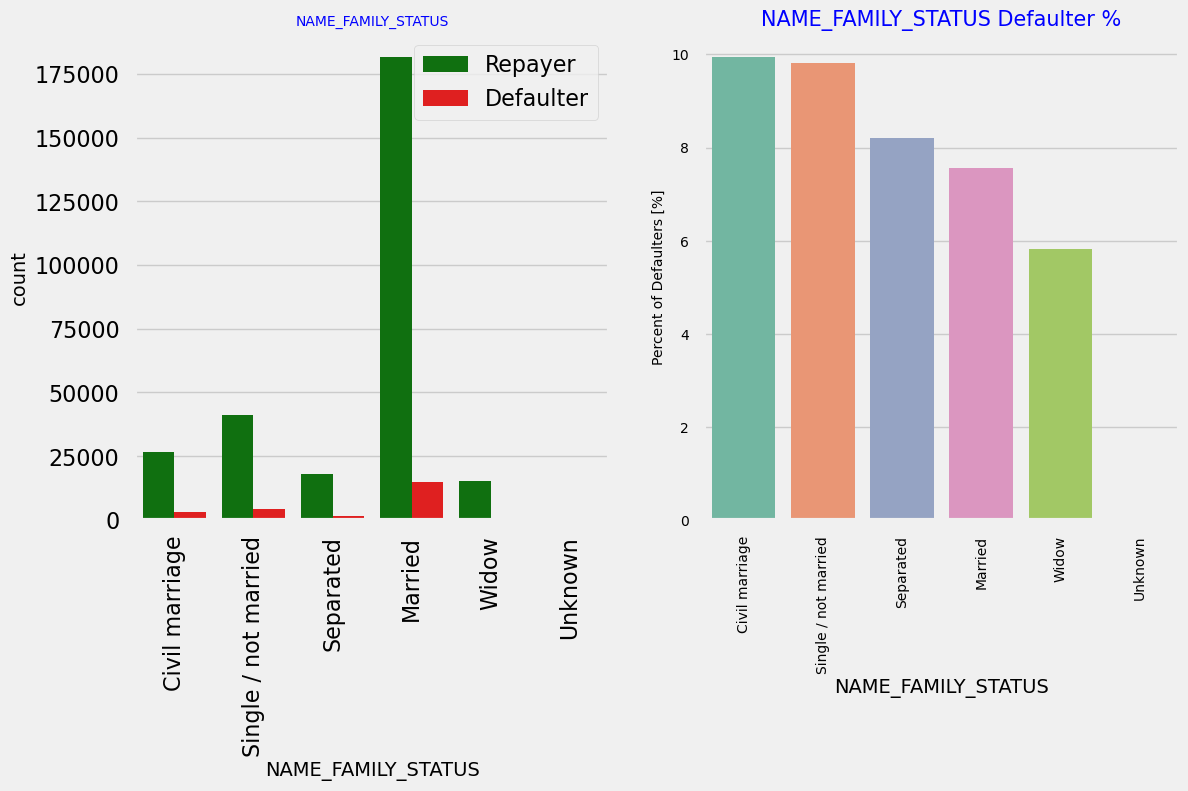

In [96]:
#Analyzing Family status based on loan repayment status 
univariate_categorical('NAME_FAMILY_STATUS',False,True,True)

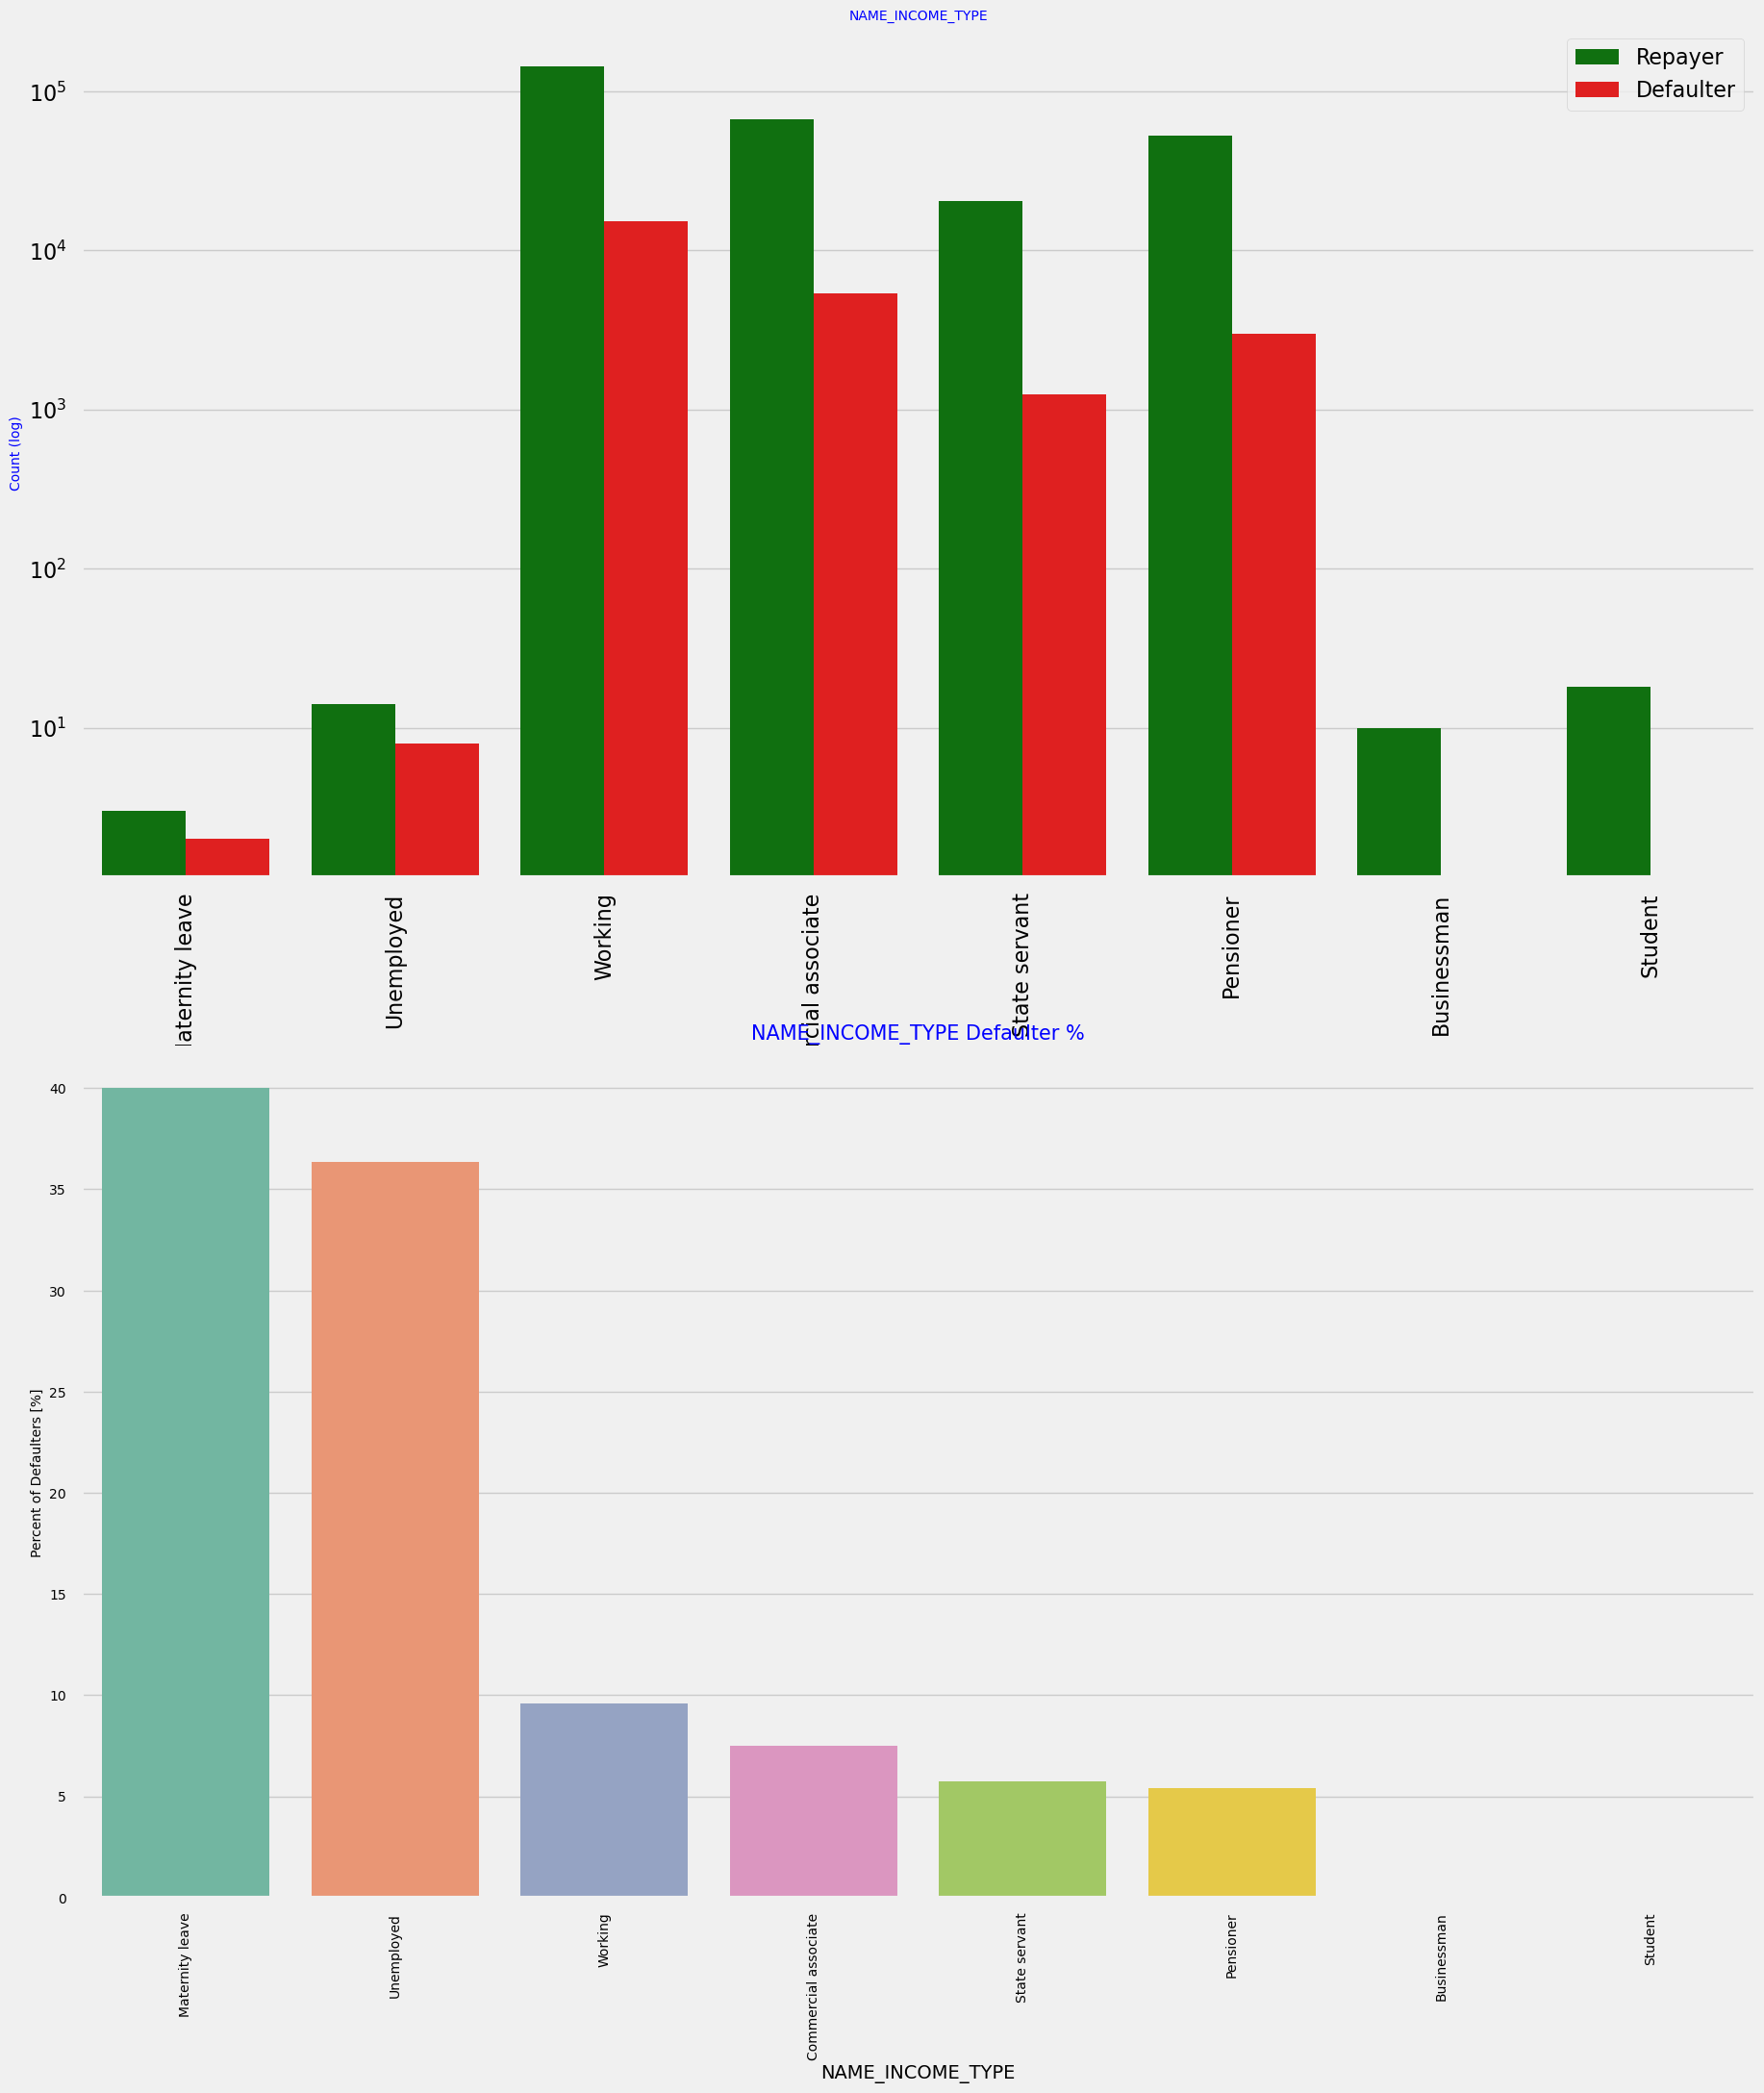

In [97]:
#analyzing Income Type based on loan repayment status 
univariate_categorical('NAME_INCOME_TYPE',True,True,False)

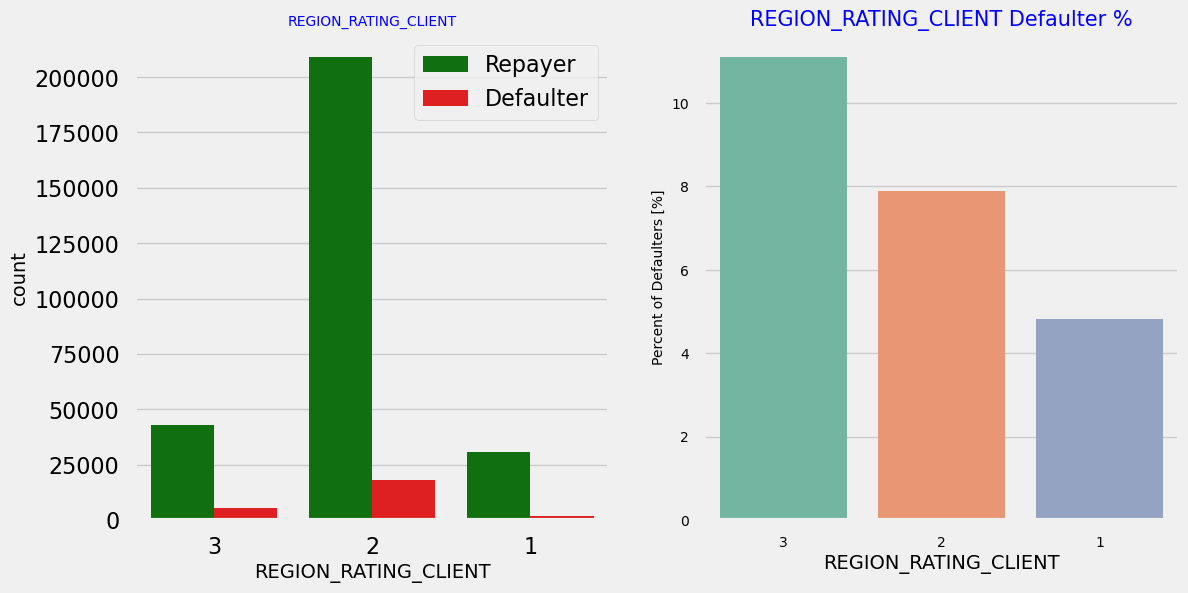

In [98]:
#Analyzin regiong rating  where applicant lives nased on loan repayment status 
univariate_categorical('REGION_RATING_CLIENT',False,False,True)

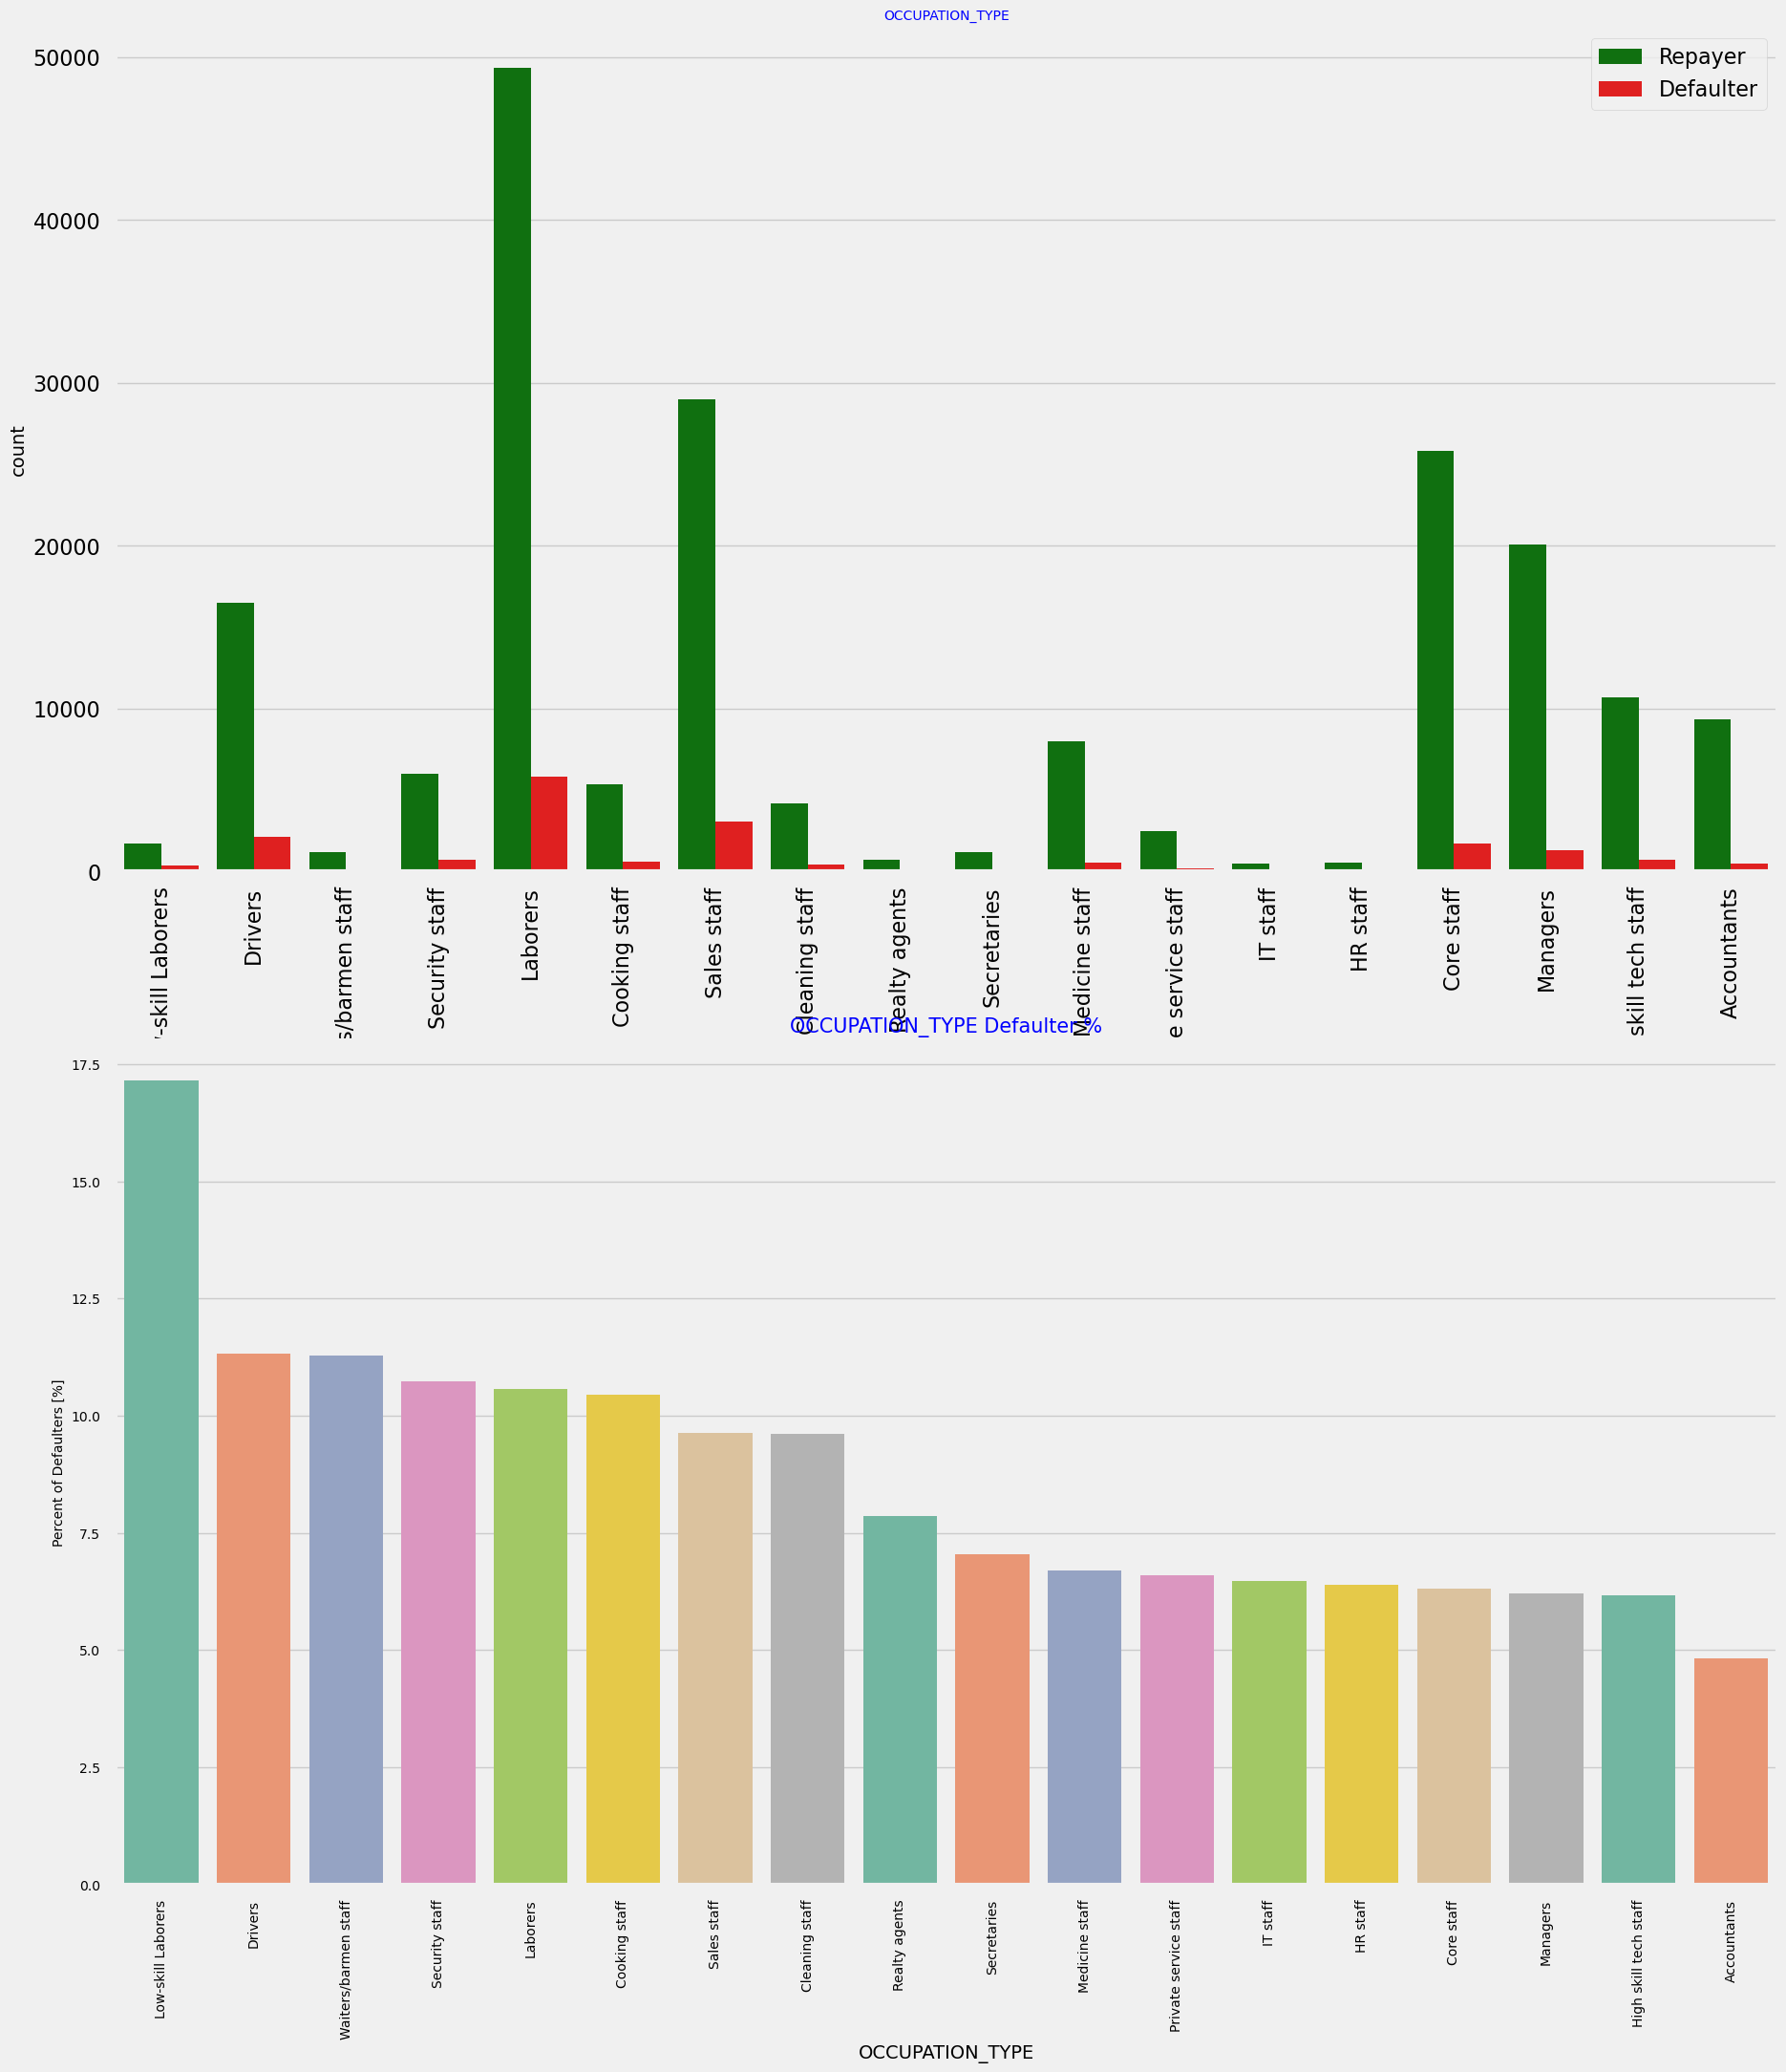

In [99]:
#Analyzing occupation type where applicant lives based on loan repayment status 
univariate_categorical('OCCUPATION_TYPE',False,True,False)

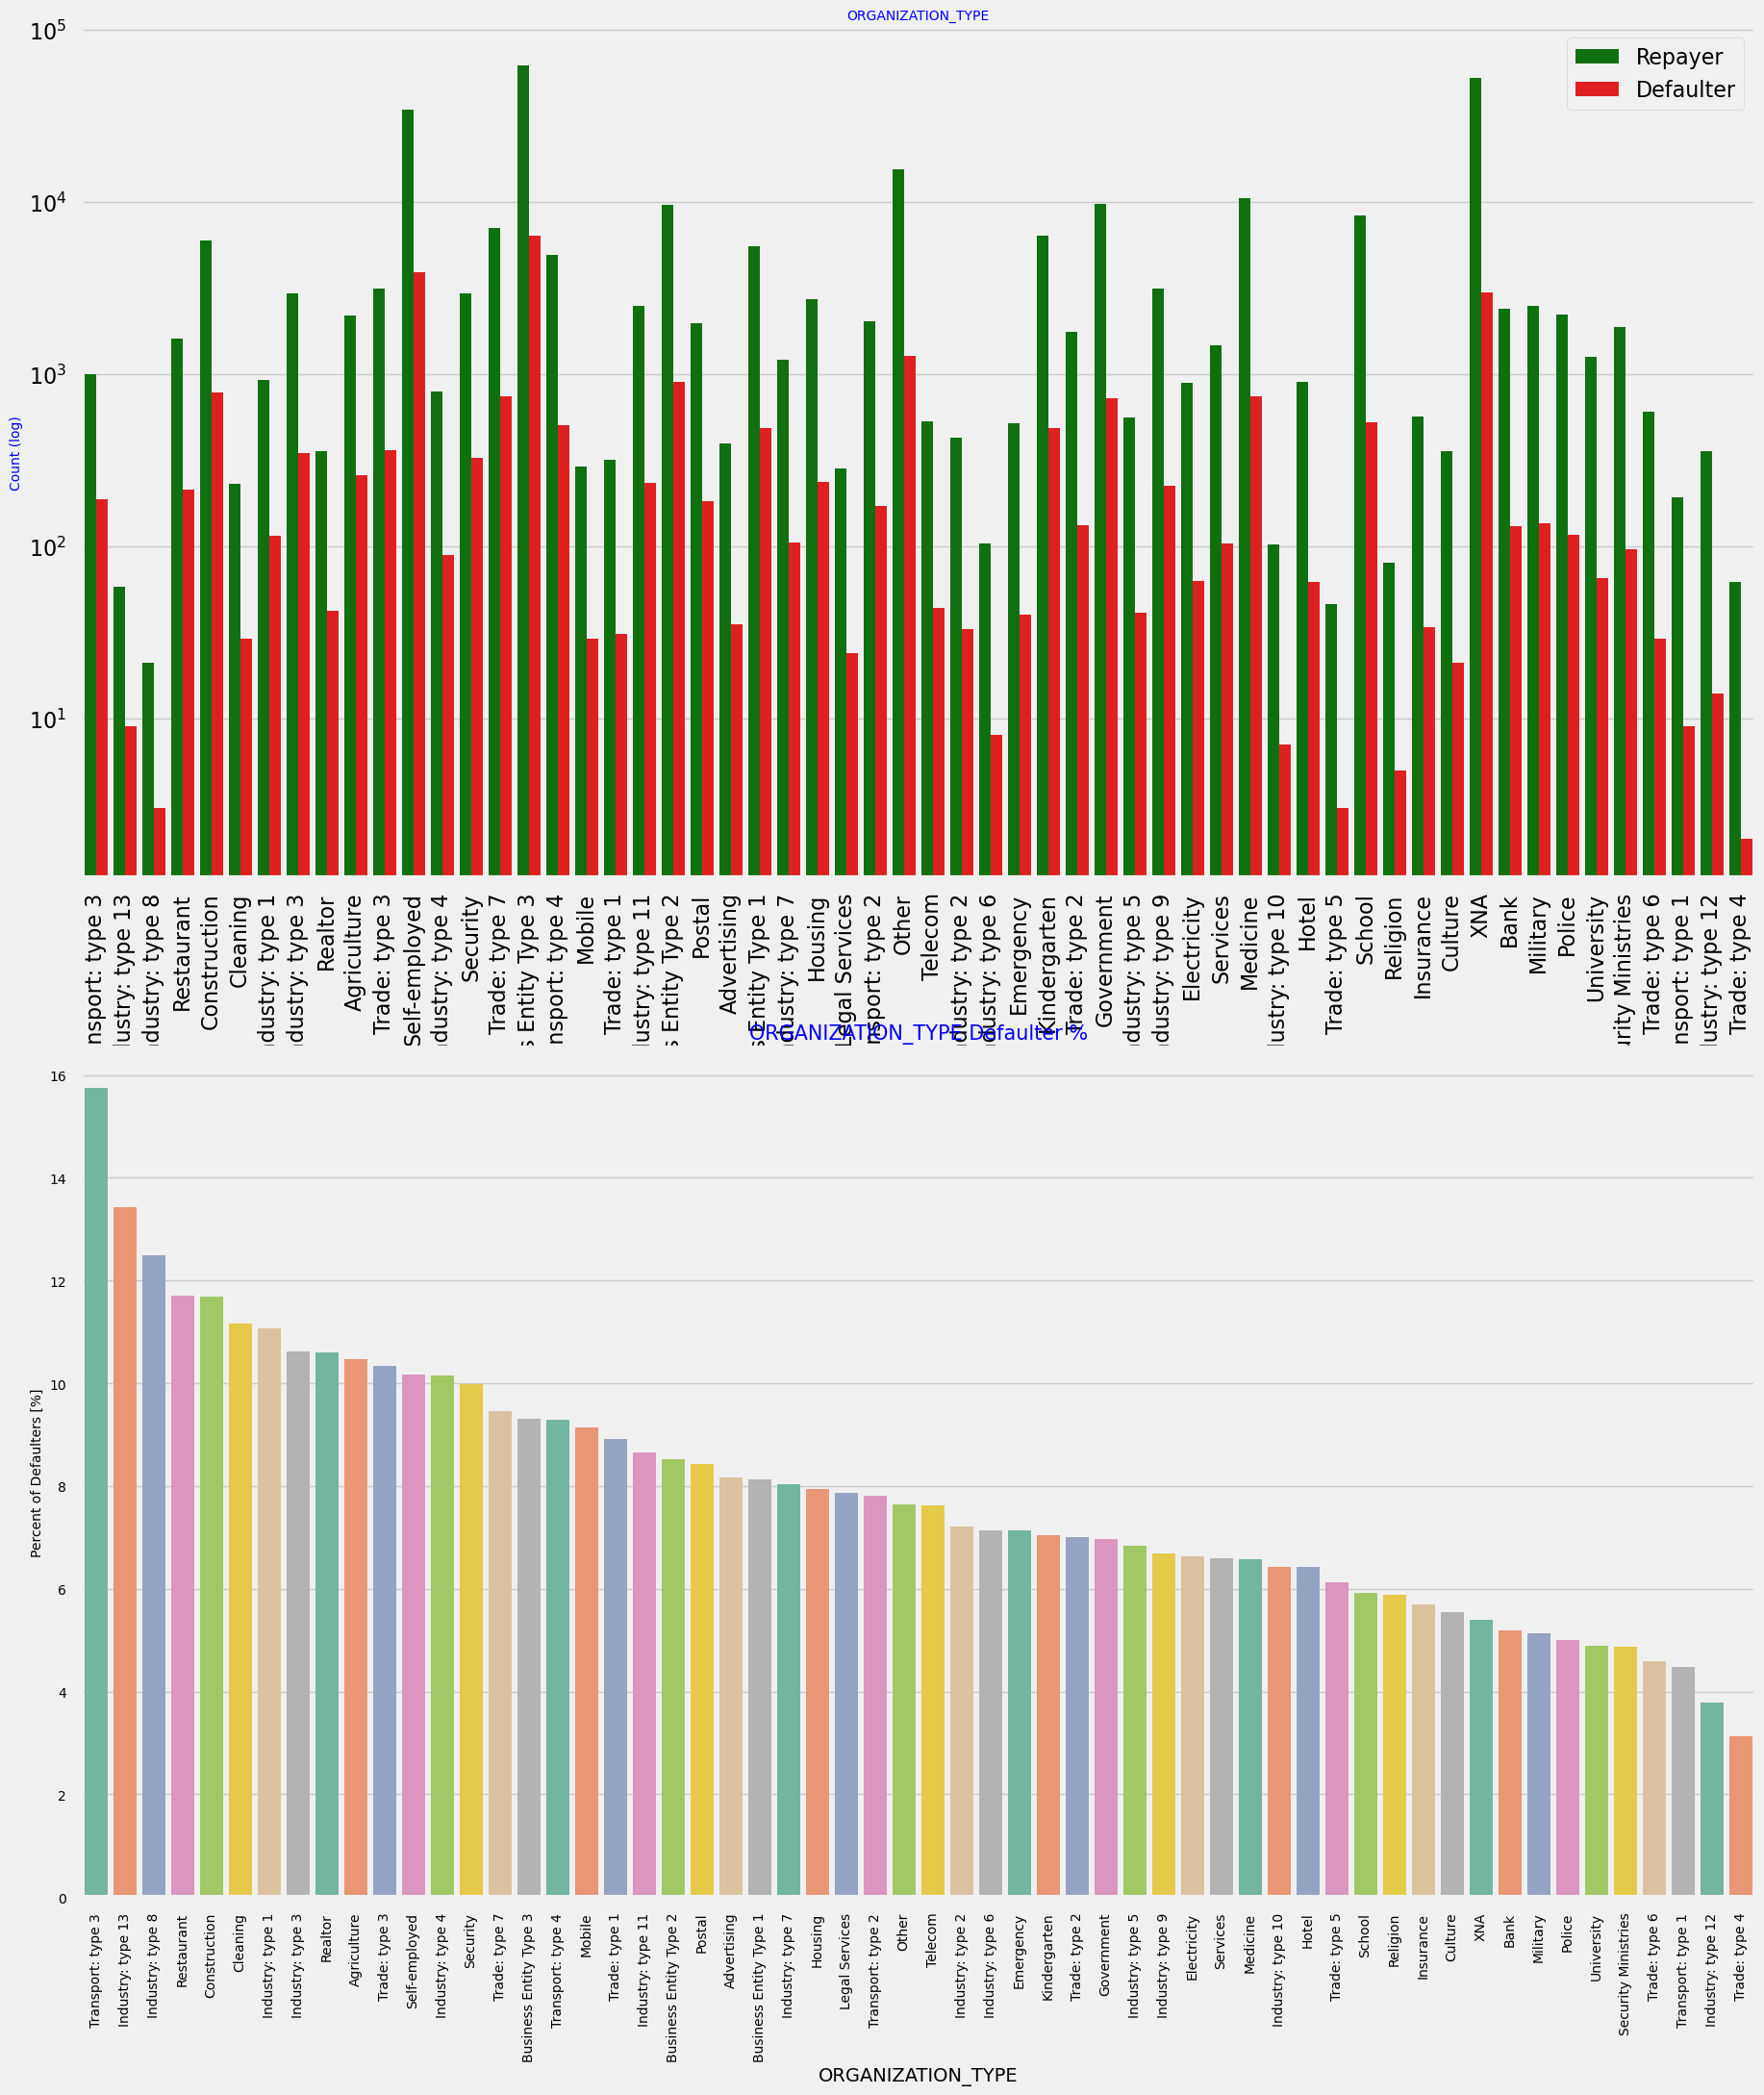

In [100]:
#cheking loan repayment status based on organization type:-
univariate_categorical("ORGANIZATION_TYPE",True,True,False,)

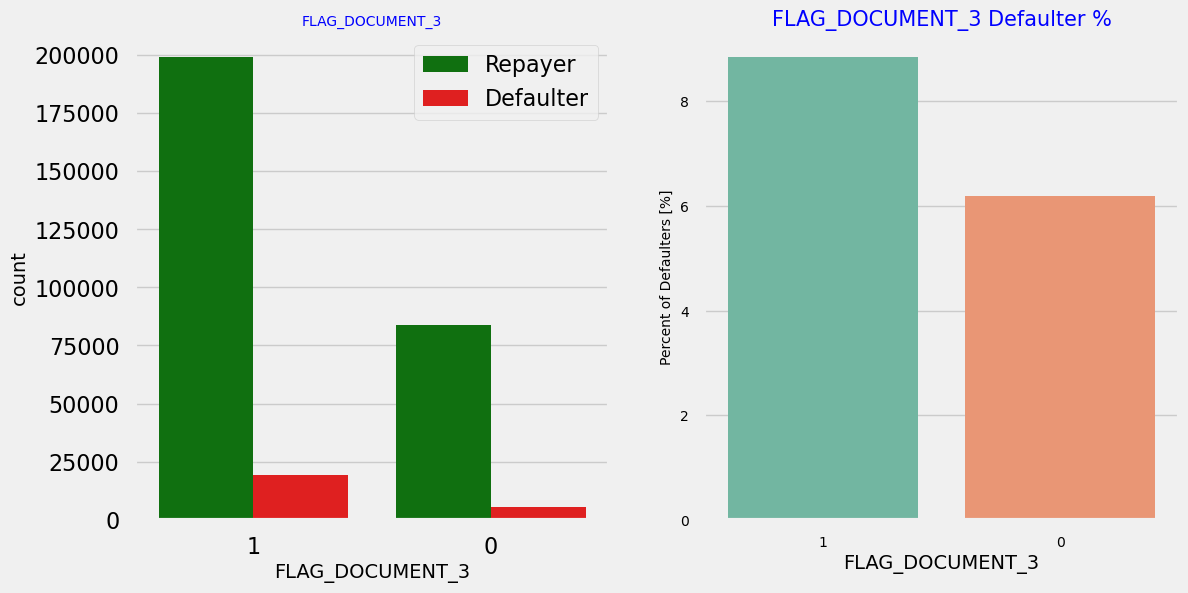

In [101]:
#analyzing FLAG_DOC_3 submission status based on loan repayment status
univariate_categorical('FLAG_DOCUMENT_3',False,False,True)

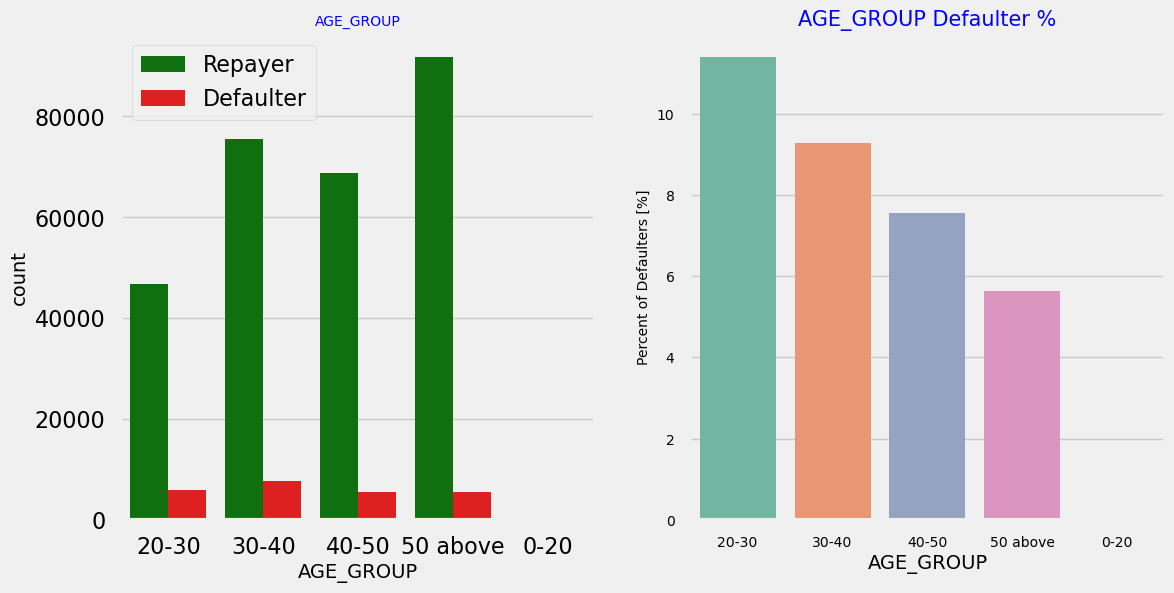

In [102]:
#Analyzing age group based on loan repayment status 
univariate_categorical('AGE_GROUP',False,False,True)

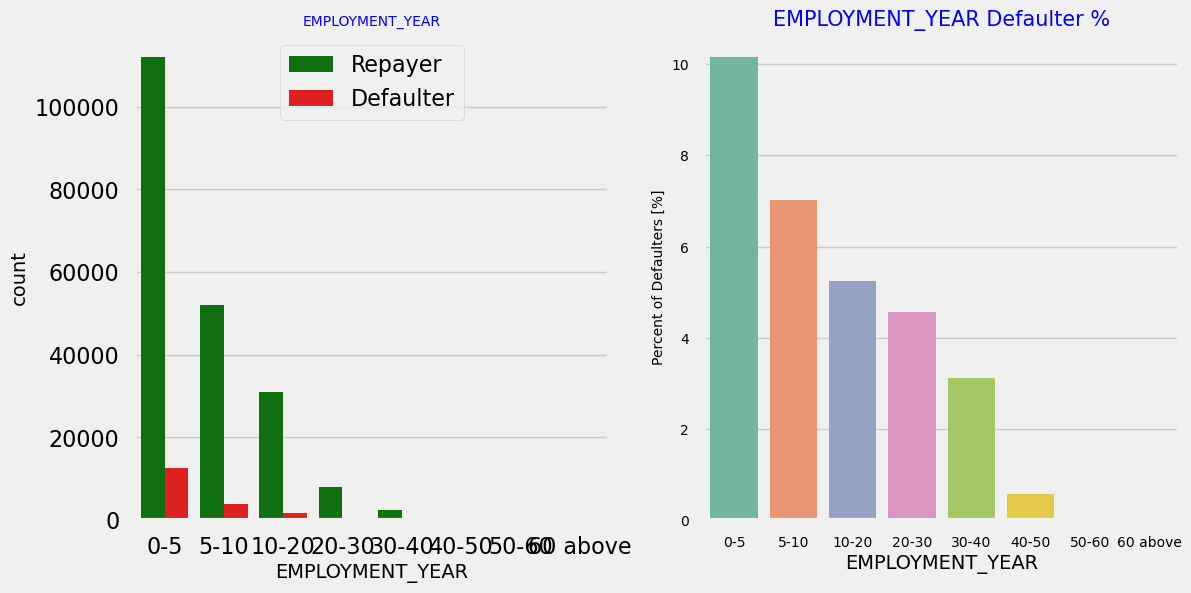

In [103]:
#analyzing  employmwnt_year based on loan repayment status 
univariate_categorical('EMPLOYMENT_YEAR',False,False,True)

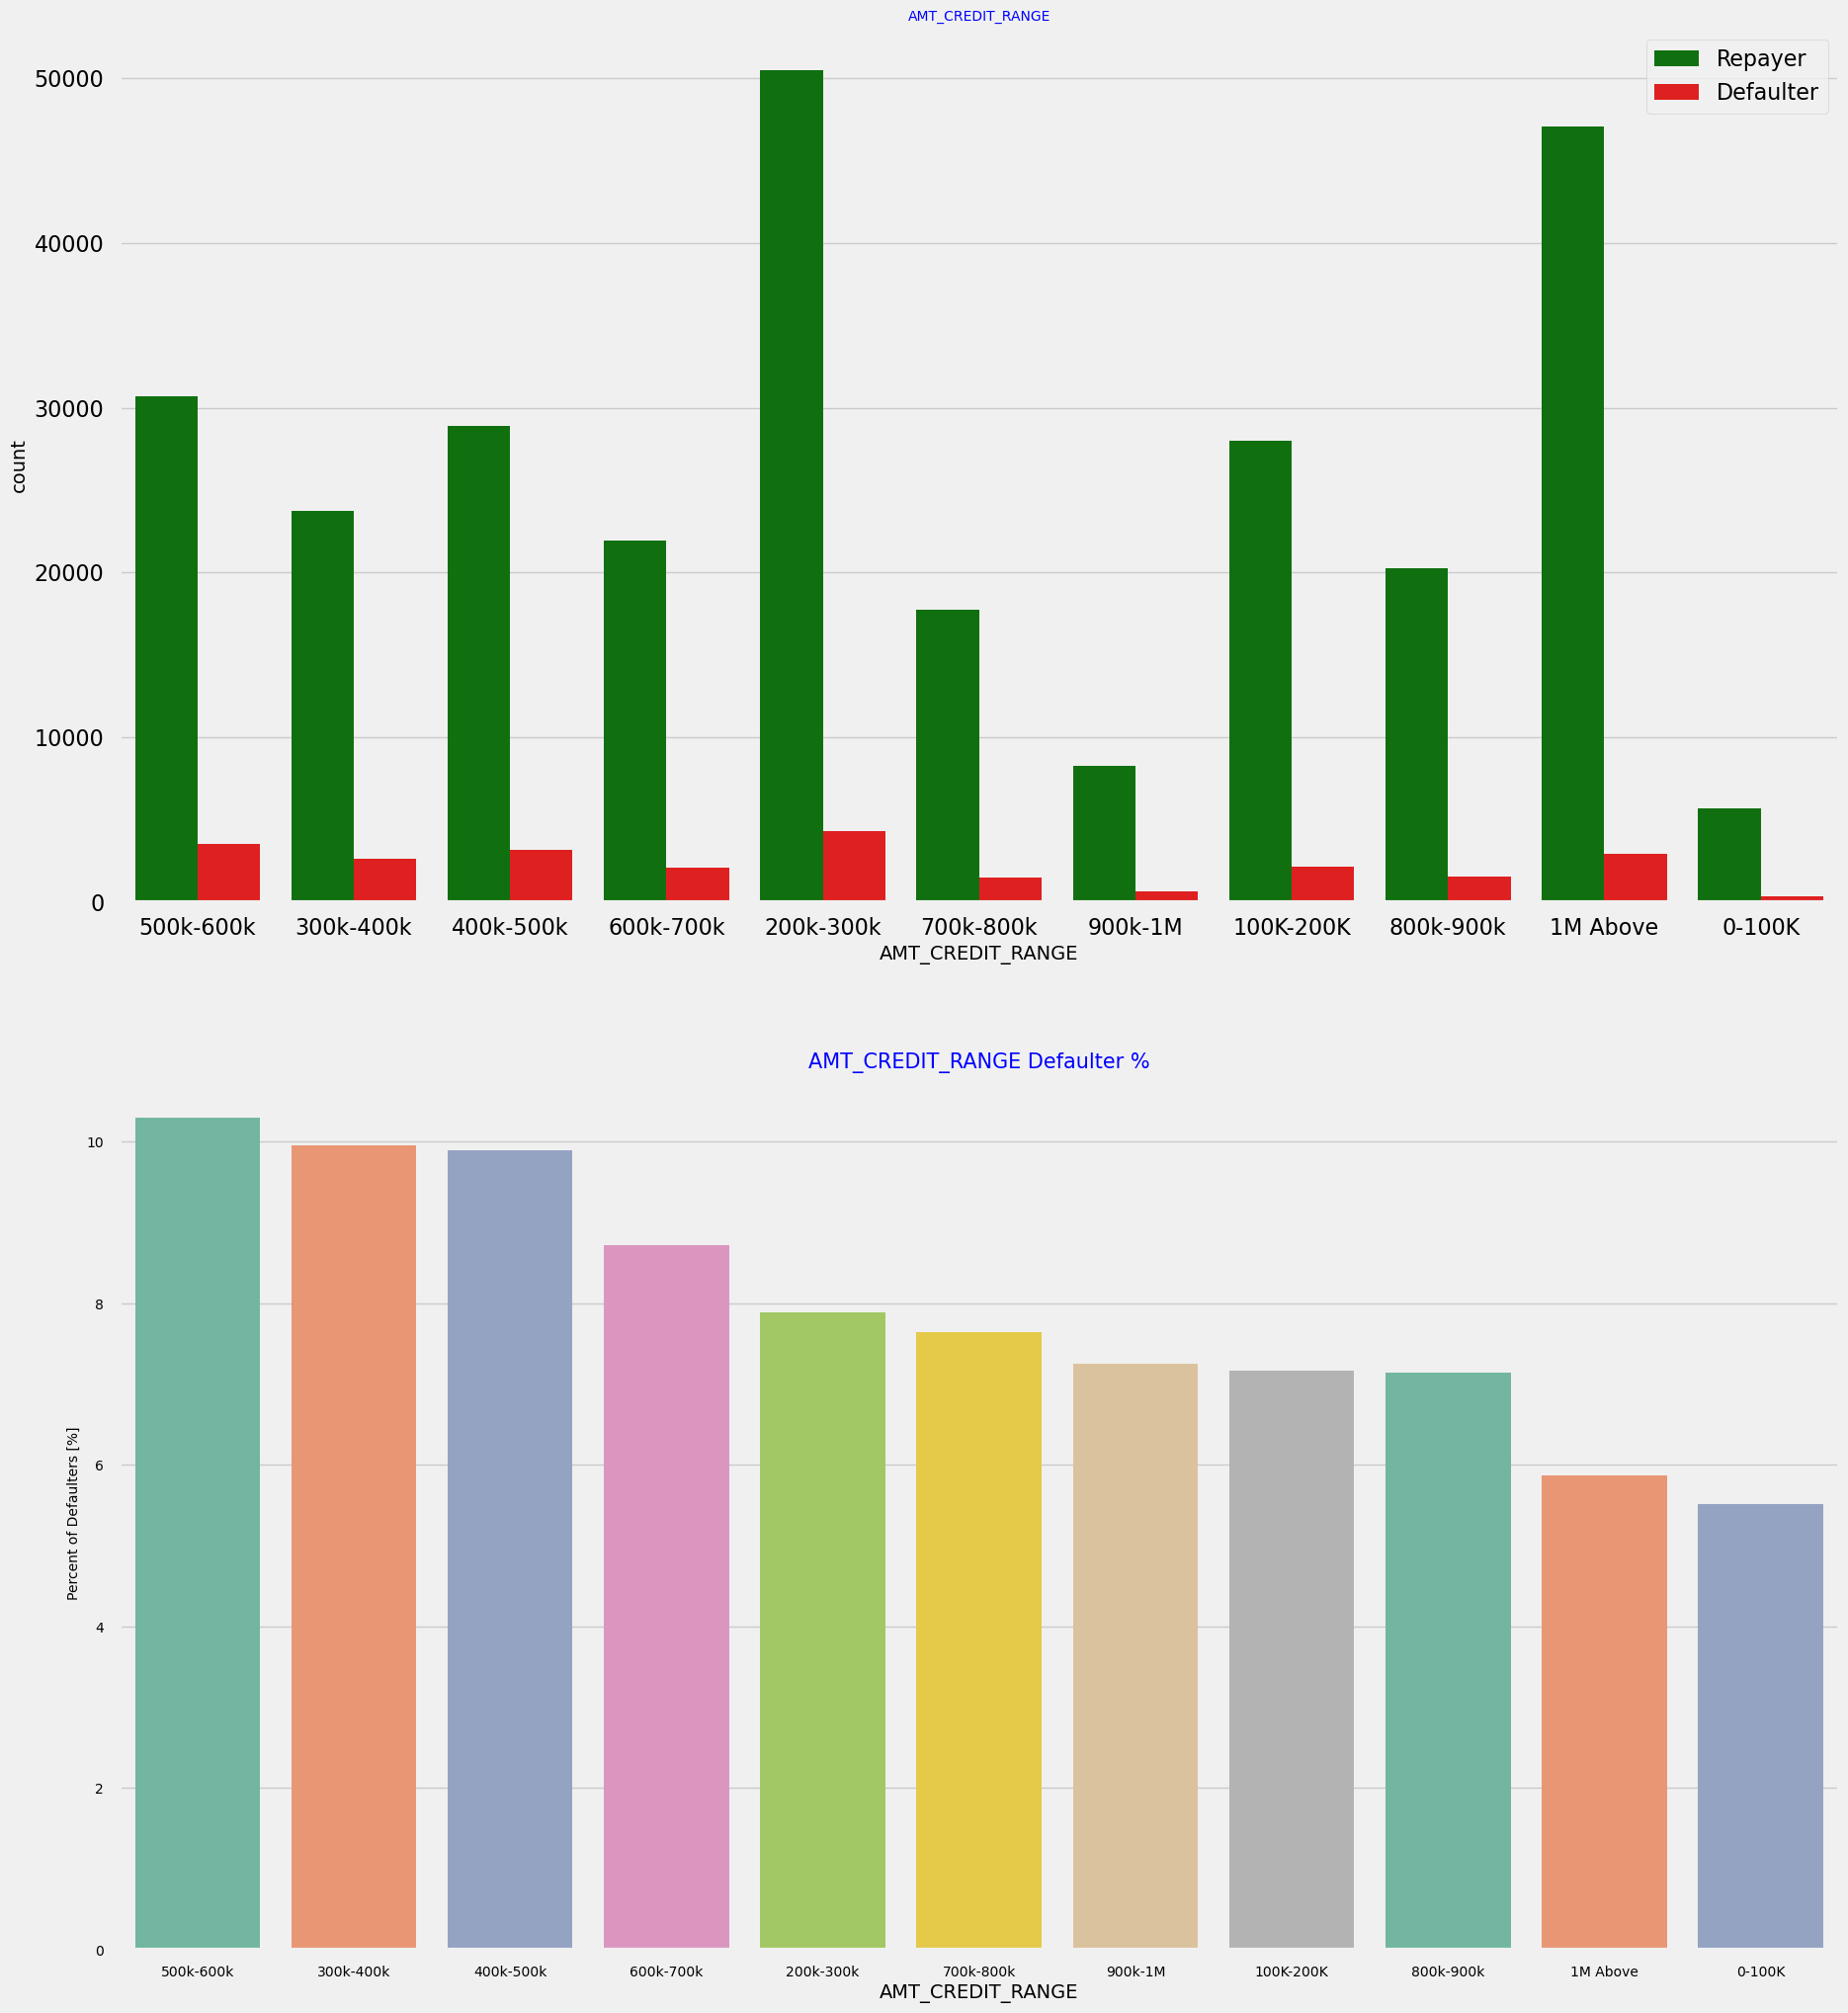

In [104]:
#analying amount_credit based on  loan repayment statuss
univariate_categorical('AMT_CREDIT_RANGE',False,False,False)

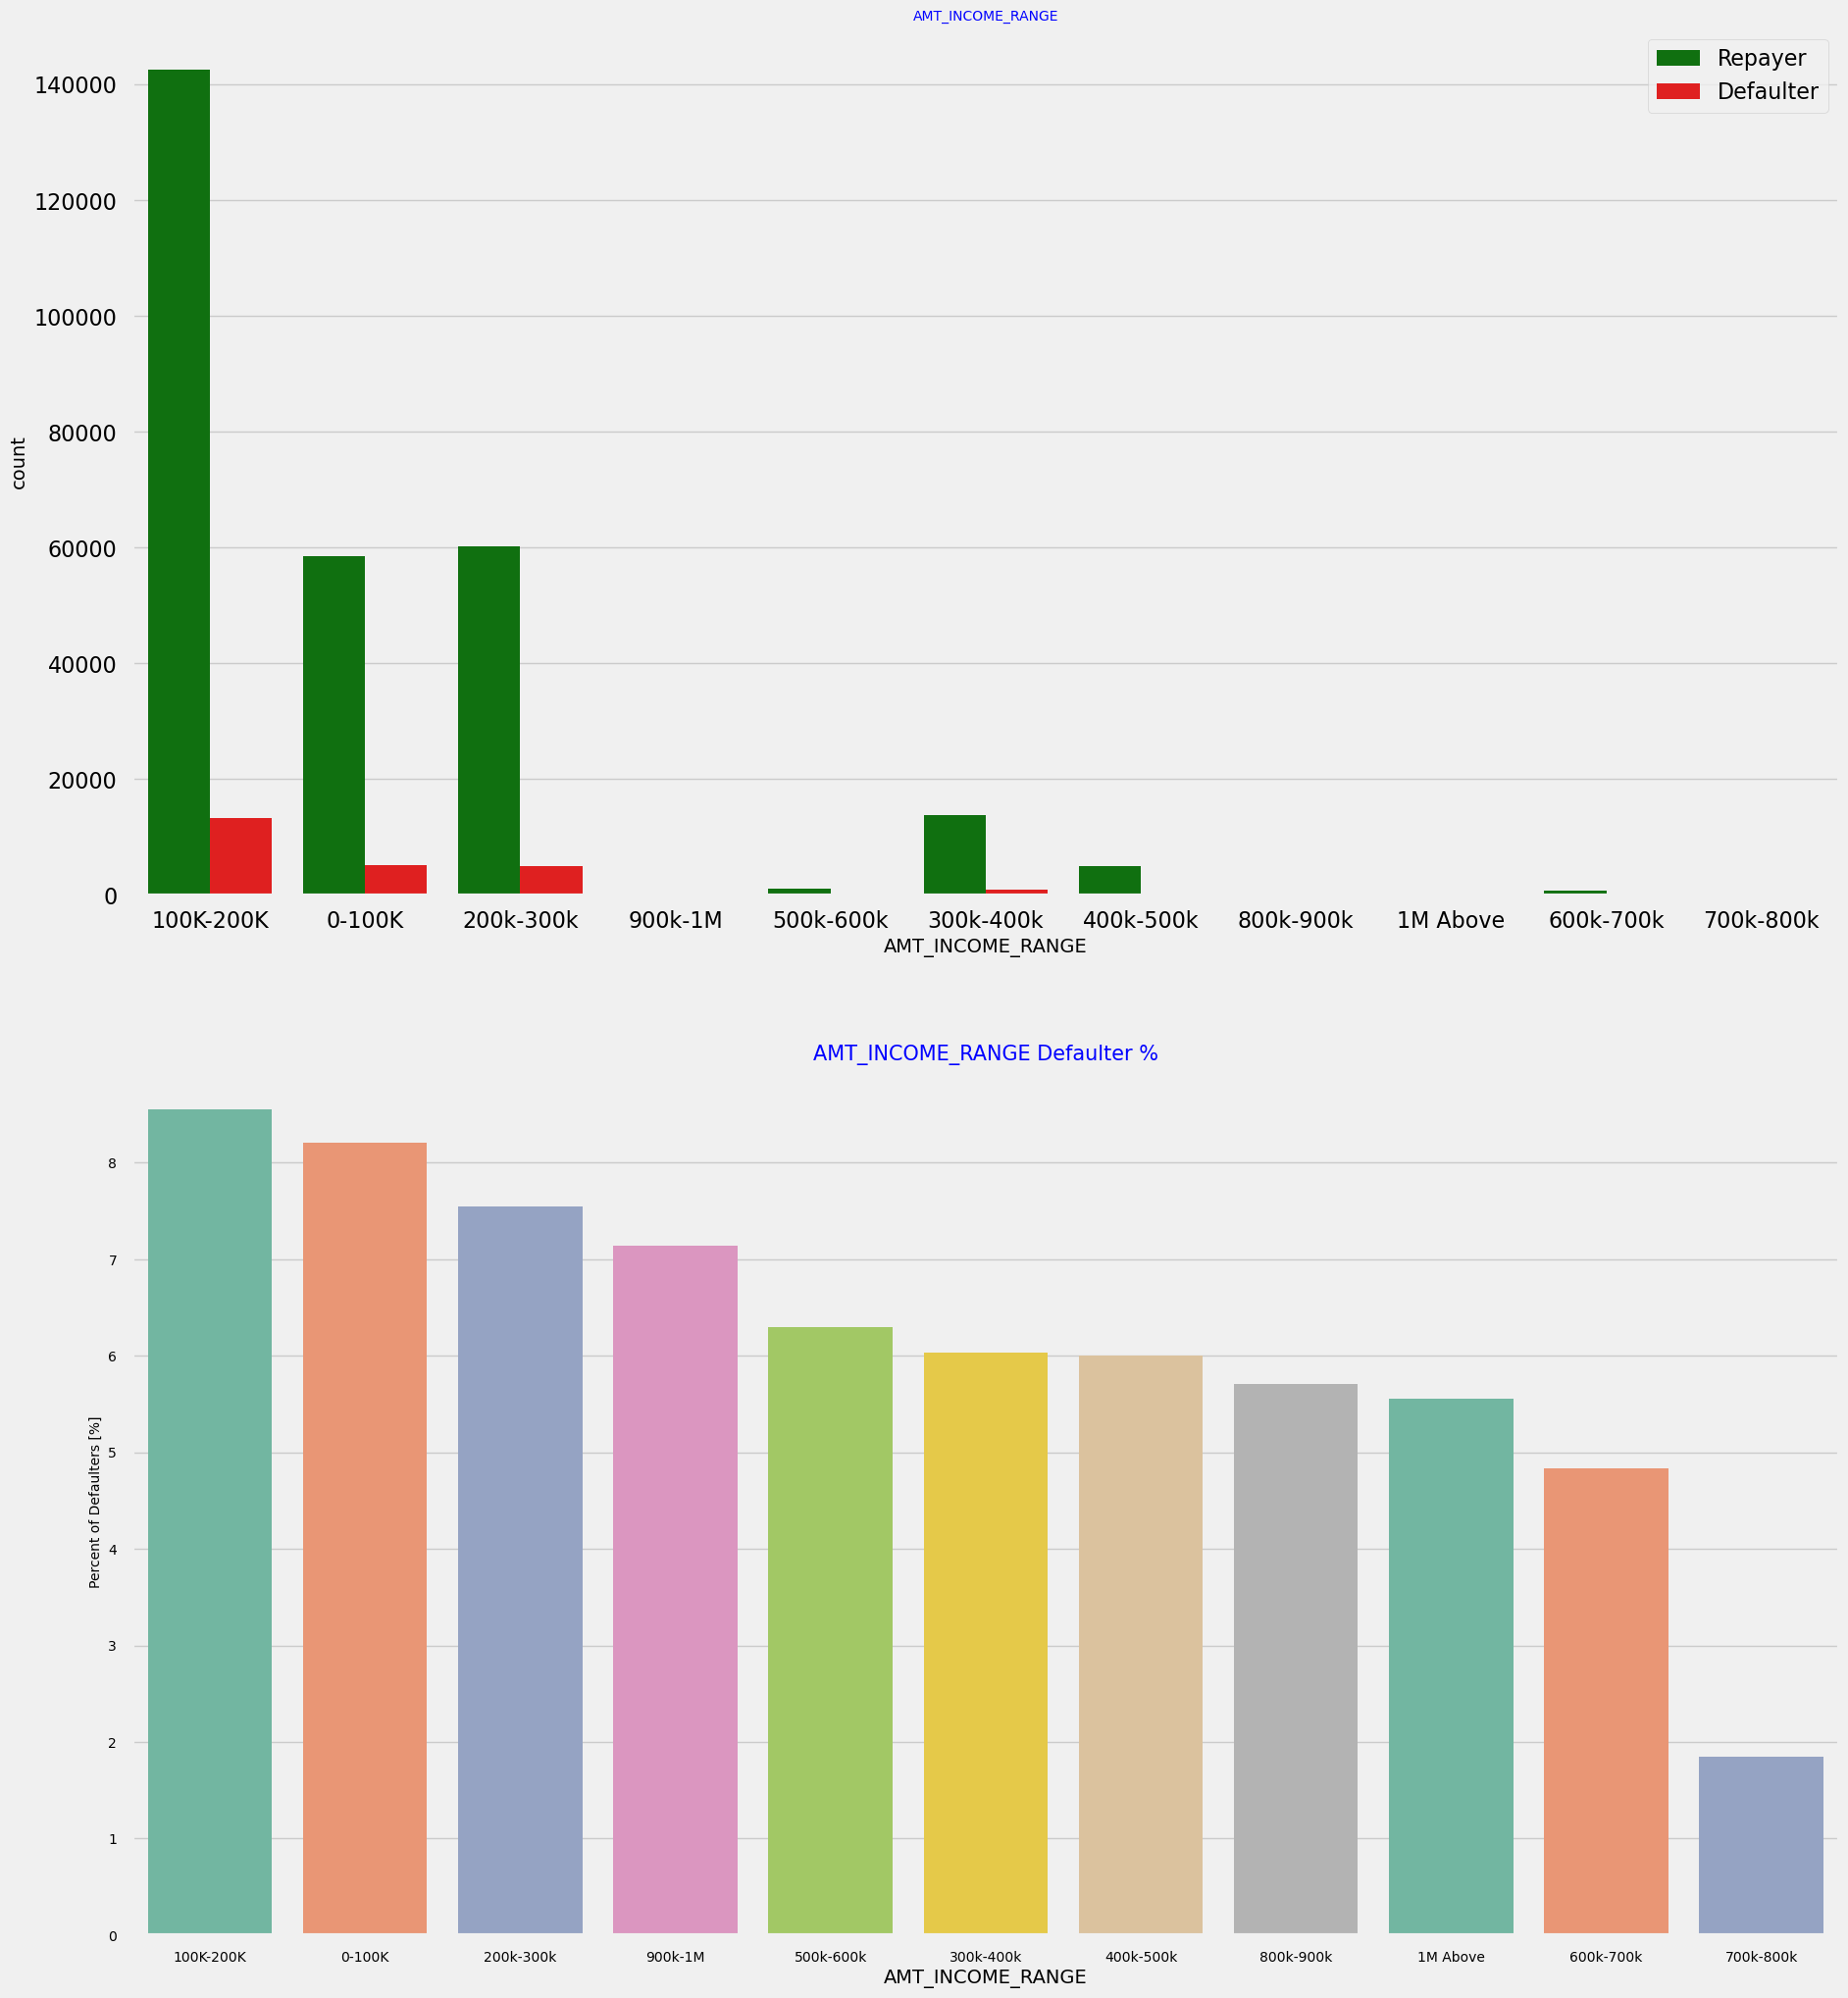

In [105]:
#analying amount_income range based on loan repaument status
univariate_categorical('AMT_INCOME_RANGE',False,False,False)

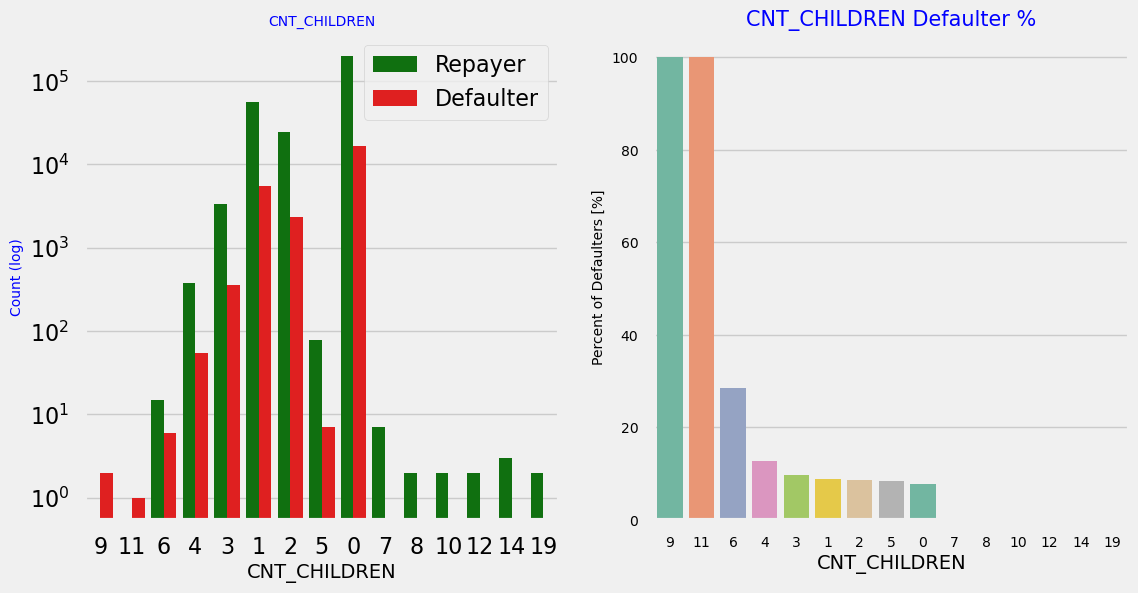

In [106]:
# analyzing number of children based on loan repayment status
univariate_categorical('CNT_CHILDREN',True)

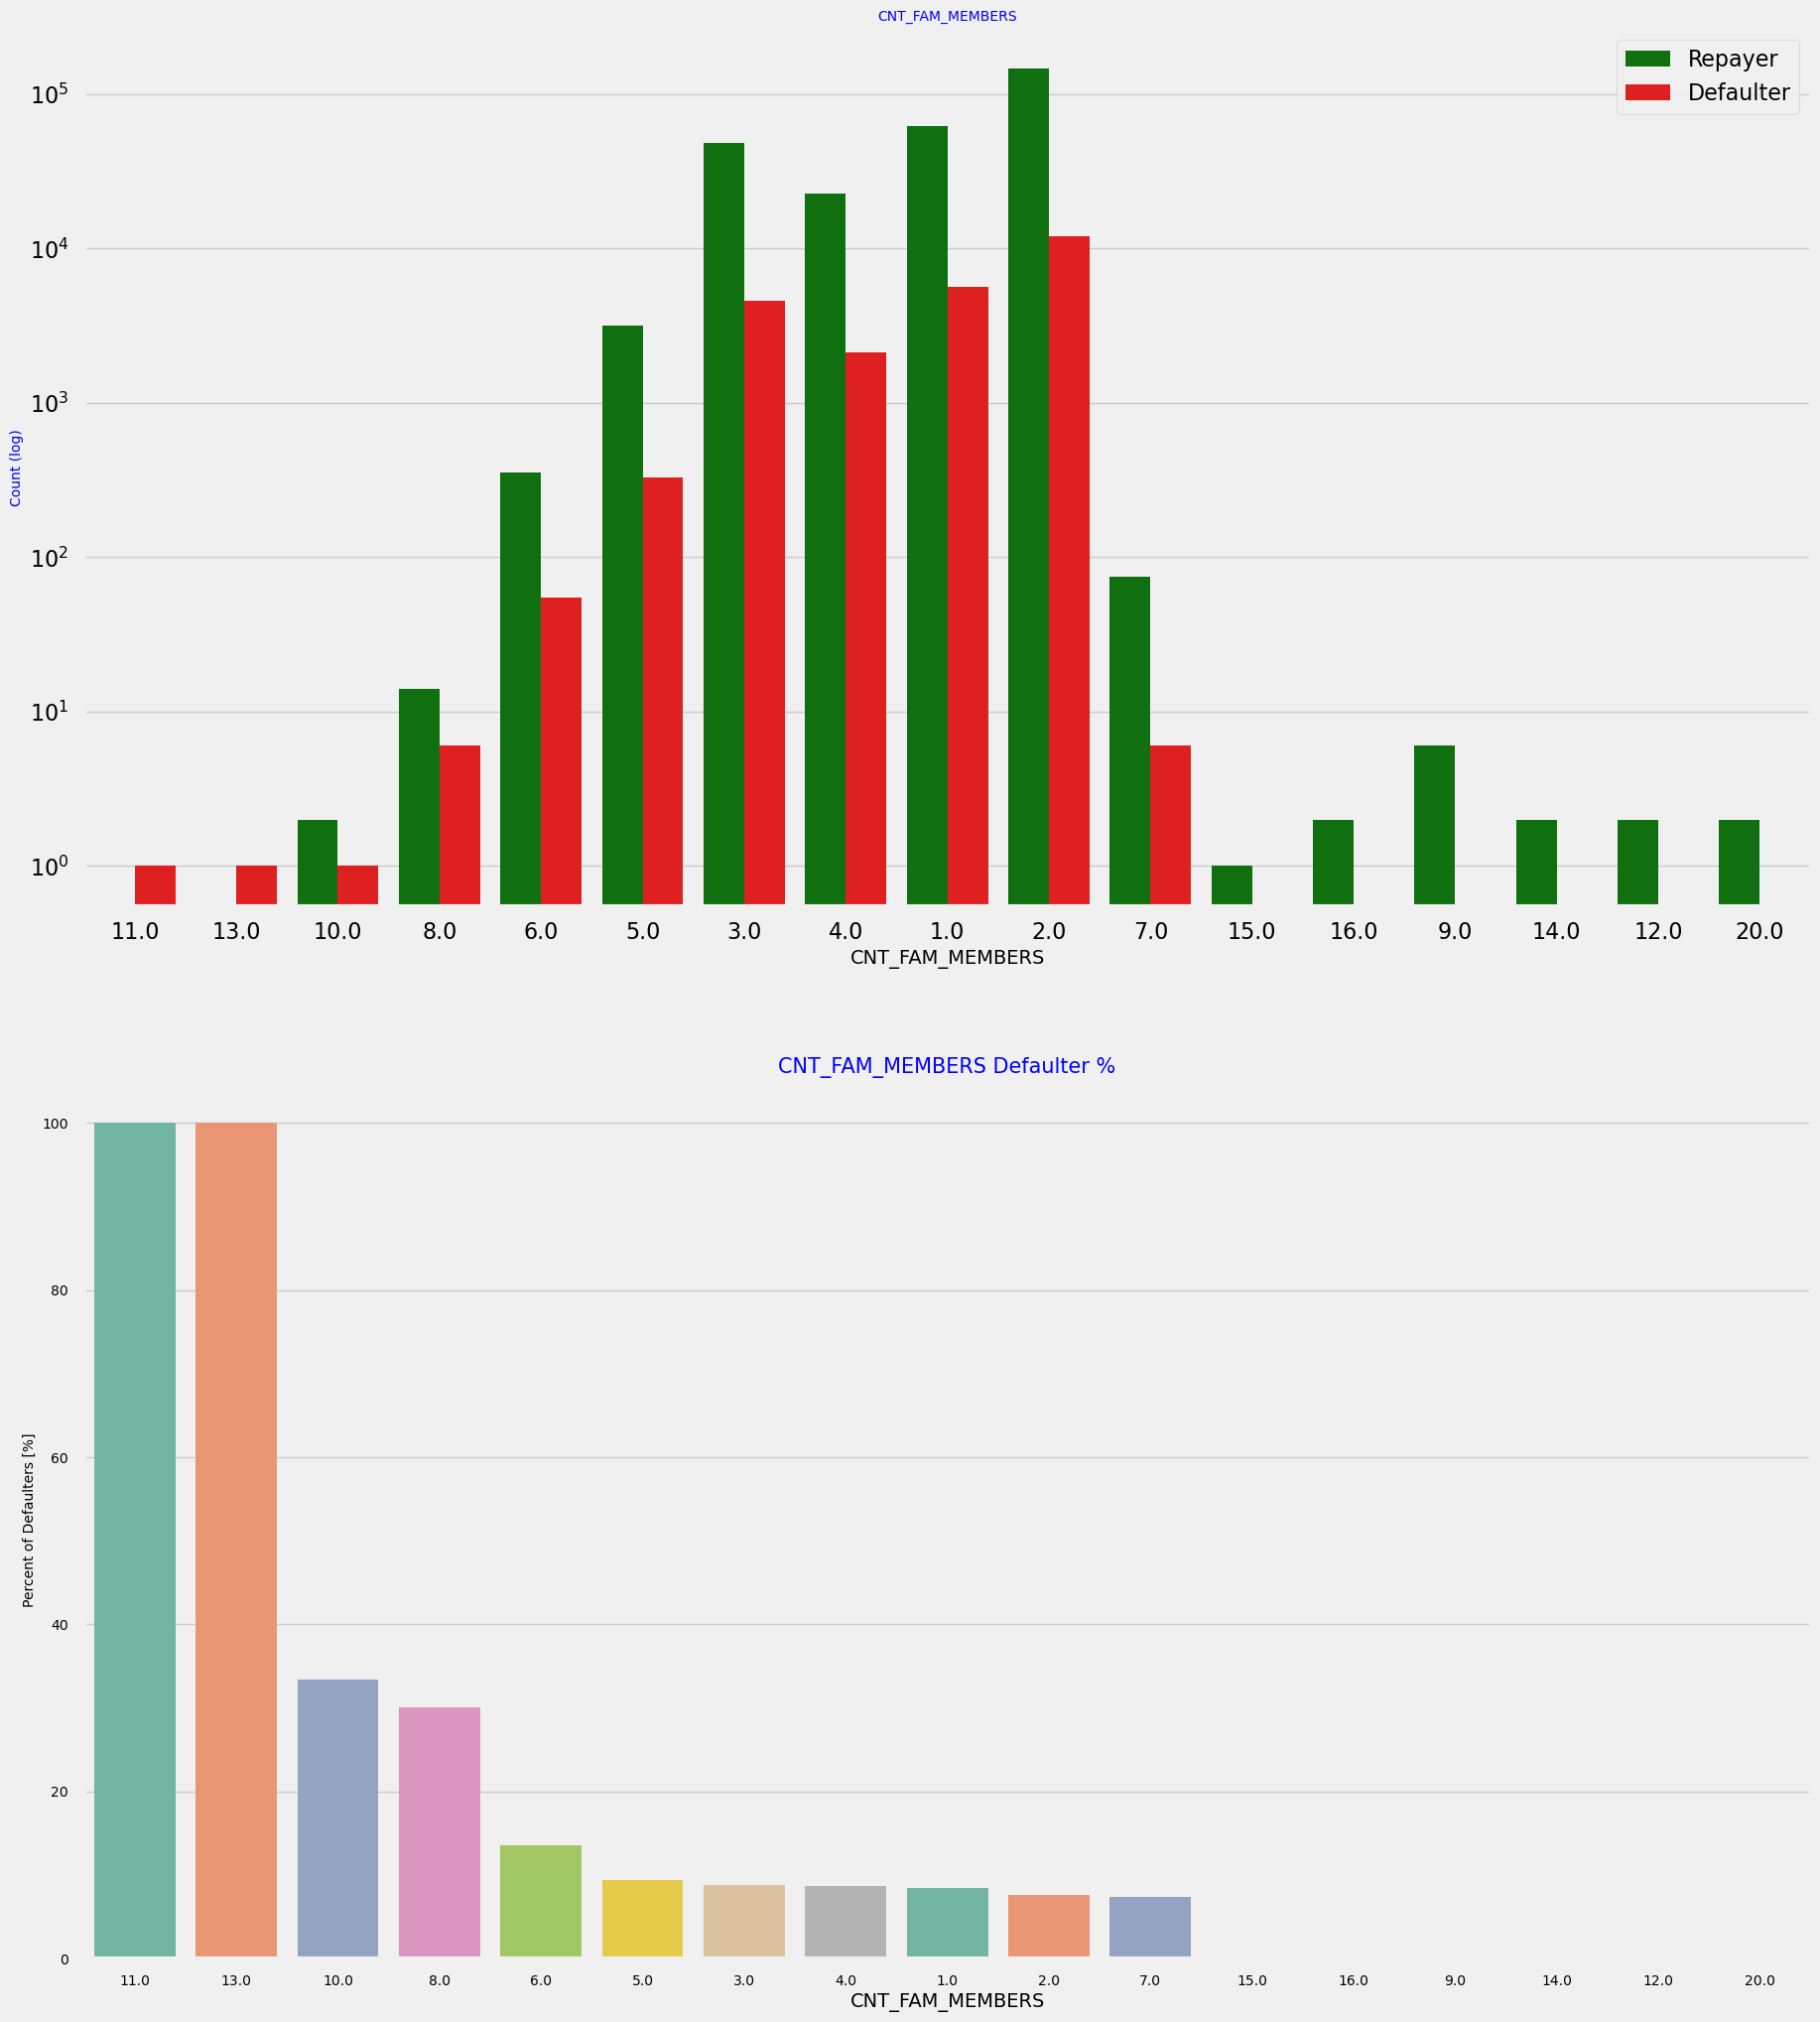

In [107]:
# analying number of family member based on loan srepayment status 
univariate_categorical("CNT_FAM_MEMBERS",True,False,False)

In [108]:
application_data.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_YEAR
0      100002       1         Cash loans           M            N               Y             0             2.025    4.065975      24700.5         351000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0        200k-300k        400k-500k   25     20-30               1             0-5
1      100003       0         Cash loans           F            N               N             0             2.700   12.935025      35698.5        1129500.0           Family         State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0        200k-300k         1M Above   45     40-50               3             0-5
2      100004       0    Revolving loans           M            Y               Y             0             0.675    1.350000       6750.0         135000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                     MONDAY                        9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0          

In [109]:
application_data.tail(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_YEAR
307501      456245       0         Cash loans           F            N               Y             3             0.810     2.69550      11871.0         225000.0   Unaccompanied  Commercial associate  Secondary / secondary special               Married  House / apartment                    0.009175       12961           1046             1398.0             3780  Low-skill Laborers              5.0                    2                           2                  WEDNESDAY                       14                           0                          0                           0                      0                      0                       0        Industry: type 1                       2.0                       1.0                       2.0                       1.0                  -448.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0           0-100K        200k-300k   35     30-40               2             0-5
307502      456246       0         Cash loans           F            N               Y             1             0.945     2.25000      10620.0         225000.0   Unaccompanied               Working  Secondary / secondary special               Married  House / apartment                    0.010966       16063           8736             8672.0             4531            Laborers              3.0                    2                           2                     MONDAY                       16                           0                          0                           0                      0                      1                       1                  School                       0.0                       0.0                       0.0                       0.0                 -1516.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0           0-100K        200k-300k   44     40-50              23           20-30
307503      456247       0         Cash loans           F            N               Y             0             1.125     3.45510      17770.5         247500.0   Unaccompanied  Commercial associate               Higher education  Single / not married  House / apartment                    0.022800       11870            399              675.0             3936          Core staff              1.0                    2                           2                   SATURDAY                       11                           0                          0                           0                      0                      0                       0                    Bank                       9.0                       3.0                       9.0                       2.0                 -2315.0

# categorical bi/multivariate analysis


In [110]:
#application_data group describing the data
application_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%      75%        max
NAME_INCOME_TYPE                                                                             
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500  8.43750    22.5000
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000  2.25000   180.0009
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000  1.35000     3.6000
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700  1.66500    22.5000
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750  2.25000    31.5000
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750  1.78875     5.6250
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875  1.35000     3.3750
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500  2.02500  1170.0000

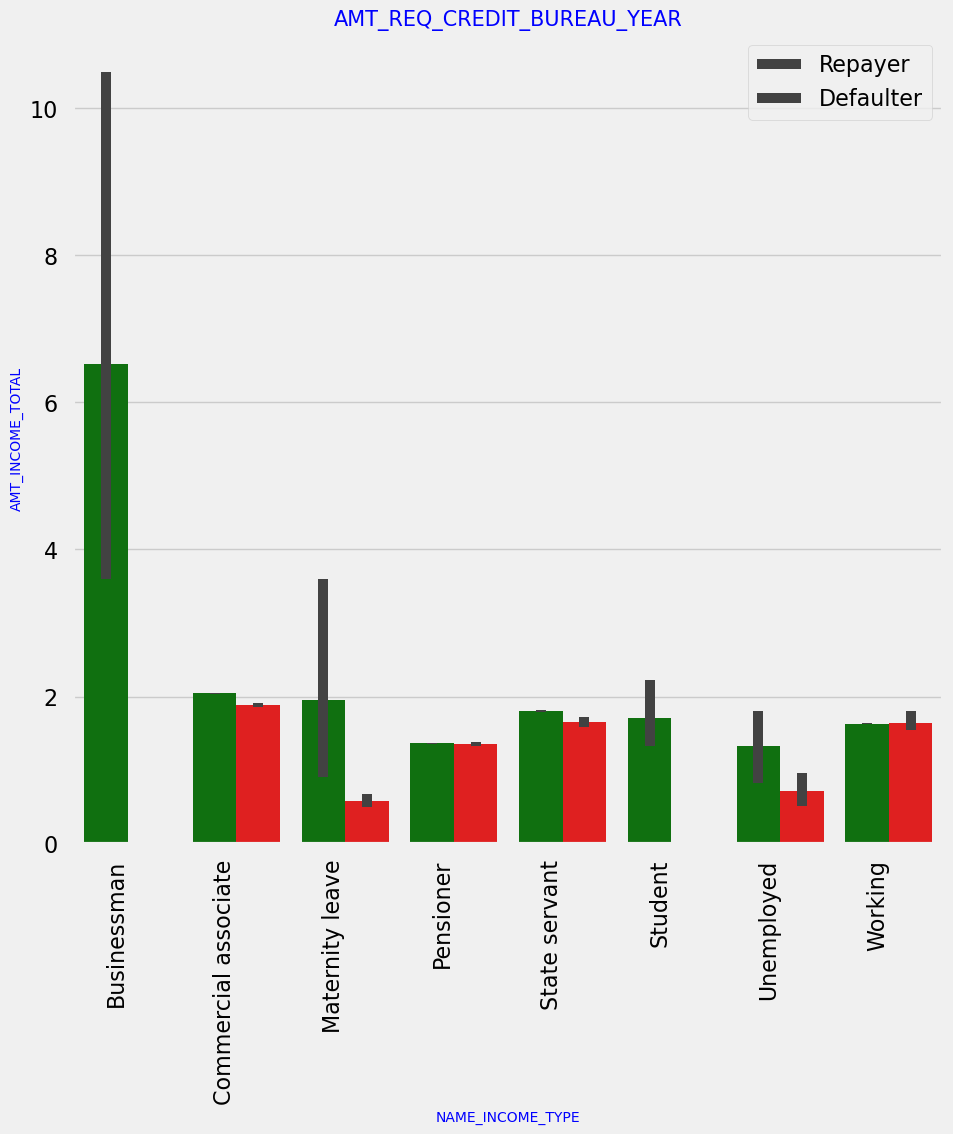

In [111]:
#income type vs amount range:-
bivariate_bar('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',application_data,'TARGET',(10,10))

# Numeric variables analysis

In [112]:
#Bifurcating the application_data ,DataFrame based on Target value 0 and 1 for correlation and other analysis



In [113]:
application_data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_YEAR
0      100002       1         Cash loans           M            N               Y             0             2.025    4.065975      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0        200k-300k        400k-500k   25     20-30               1             0-5
1      100003       0         Cash loans           F            N               N             0             2.700   12.935025      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0        200k-300k         1M Above   45     40-50               3             0-5
2      100004       0    Revolving loans           M            Y               Y             0             0.675    1.350000       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                     MONDAY                        9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0      

In [114]:


application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CRED

In [115]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [116]:
# bifurcating the application_data the DataFrame based on target value 0 and 1 for correlation and other analysis
cols_for_correlation=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']




In [117]:
Repayer_df = application_data.loc[application_data['TARGET']==0, cols_for_correlation] # Repayers


Defaulter_df = application_data.loc[application_data['TARGET']==1, cols_for_correlation] # Defaulters

In [118]:
# gettig the most correlation for the Repayers data
corr_repayer=Repayer_df.corr()

corr_repayer=corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))

corr_df_repayer=corr_repayer.unstack().reset_index()

corr_df_repayer.columns=['VAR1','VAR2','Correlation']

corr_df_repayer.dropna(subset=['Correlation'],inplace=True)

corr_df_repayer['Correlation']=corr_df_repayer['Correlation'].abs()

corr_df_repayer.sort_values(by='Correlation',ascending=False,inplace=True)

corr_df_repayer.head(10)

VAR1              VAR2  Correlation
94     AMT_GOODS_PRICE        AMT_CREDIT     0.987250
230    CNT_FAM_MEMBERS      CNT_CHILDREN     0.878571
95     AMT_GOODS_PRICE       AMT_ANNUITY     0.776686
71         AMT_ANNUITY        AMT_CREDIT     0.771309
167      DAYS_EMPLOYED        DAYS_BIRTH     0.626114
70         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953
93     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.349462
47          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
138         DAYS_BIRTH      CNT_CHILDREN     0.336966
190  DAYS_REGISTRATION        DAYS_BIRTH     0.333151

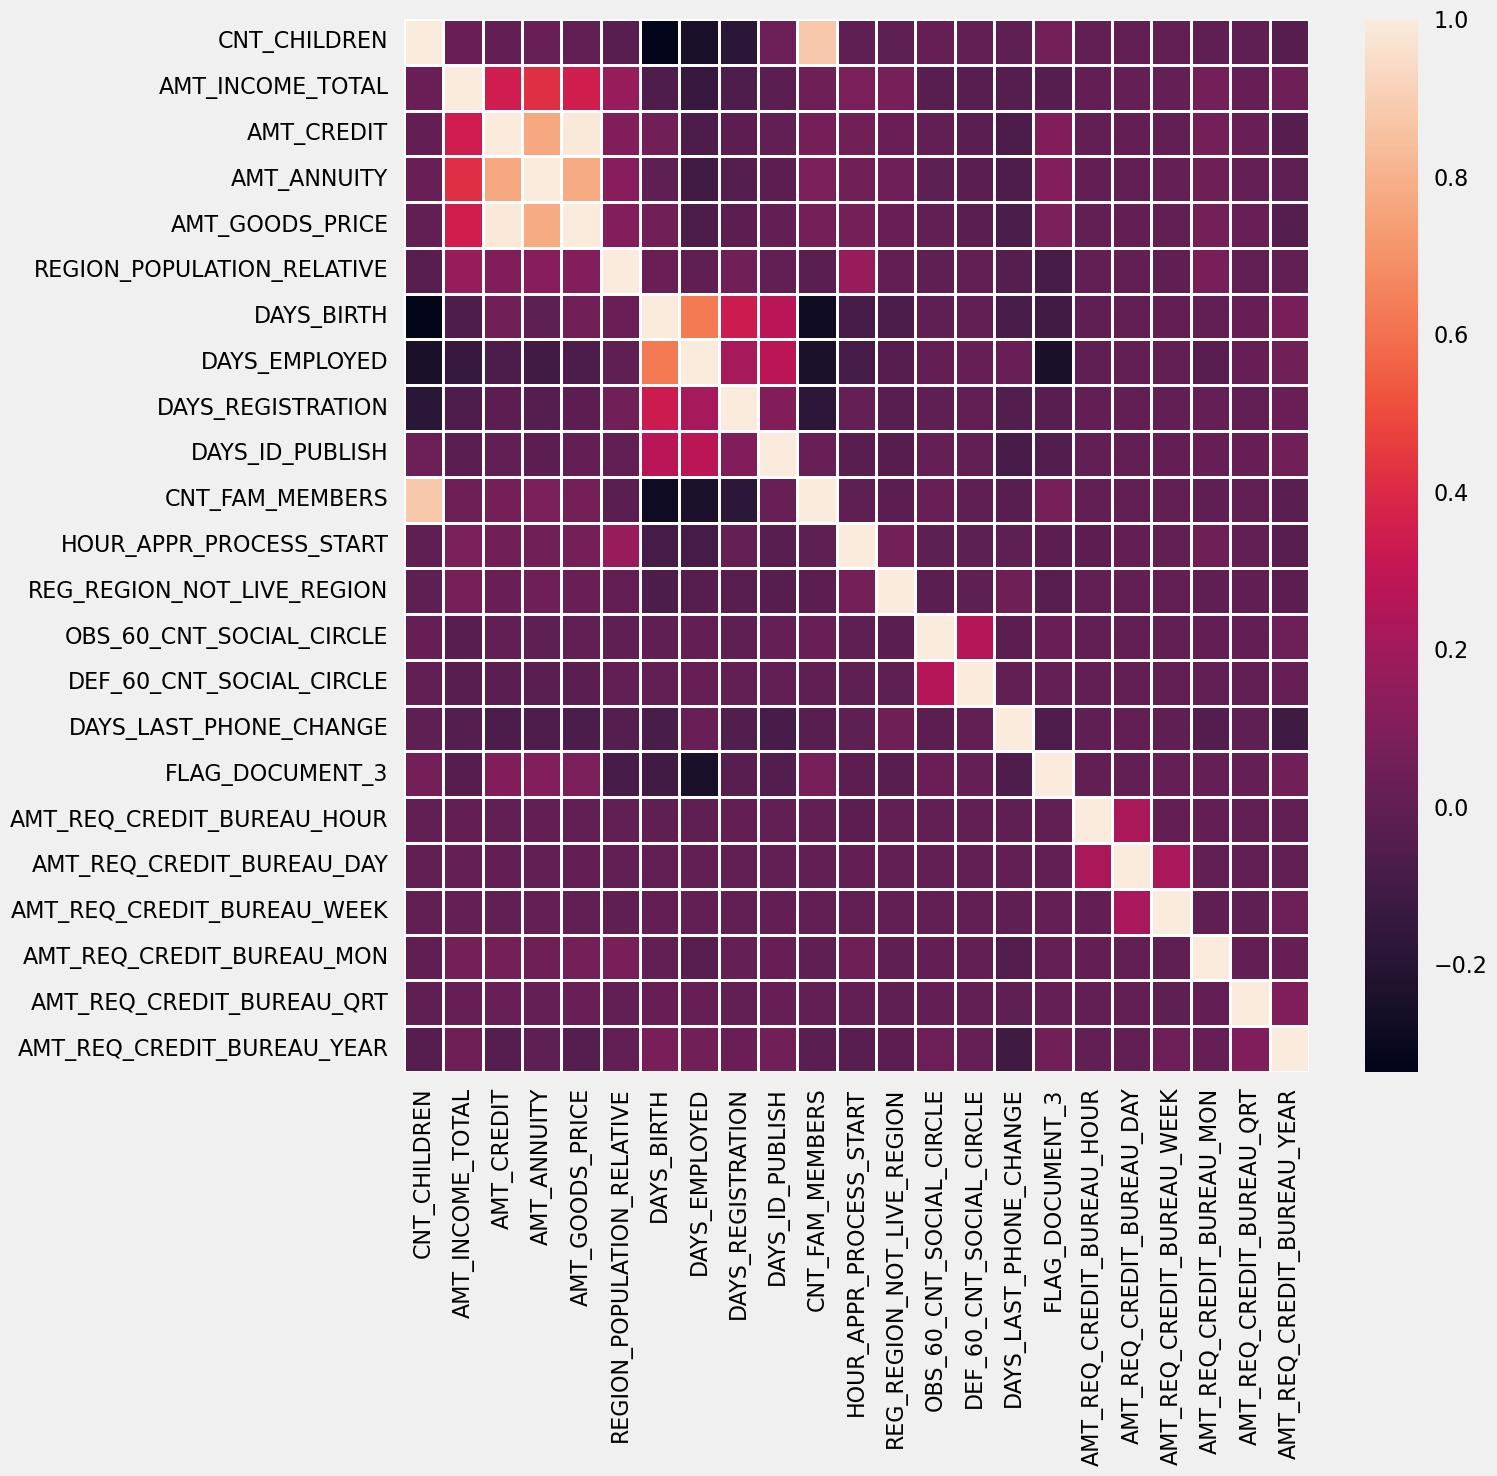

In [119]:
fig=plt.figure(figsize=(13,13))
ax=sns.heatmap(Repayer_df.corr(),annot=False,linewidth=1)

# Numerical Univariate analysis

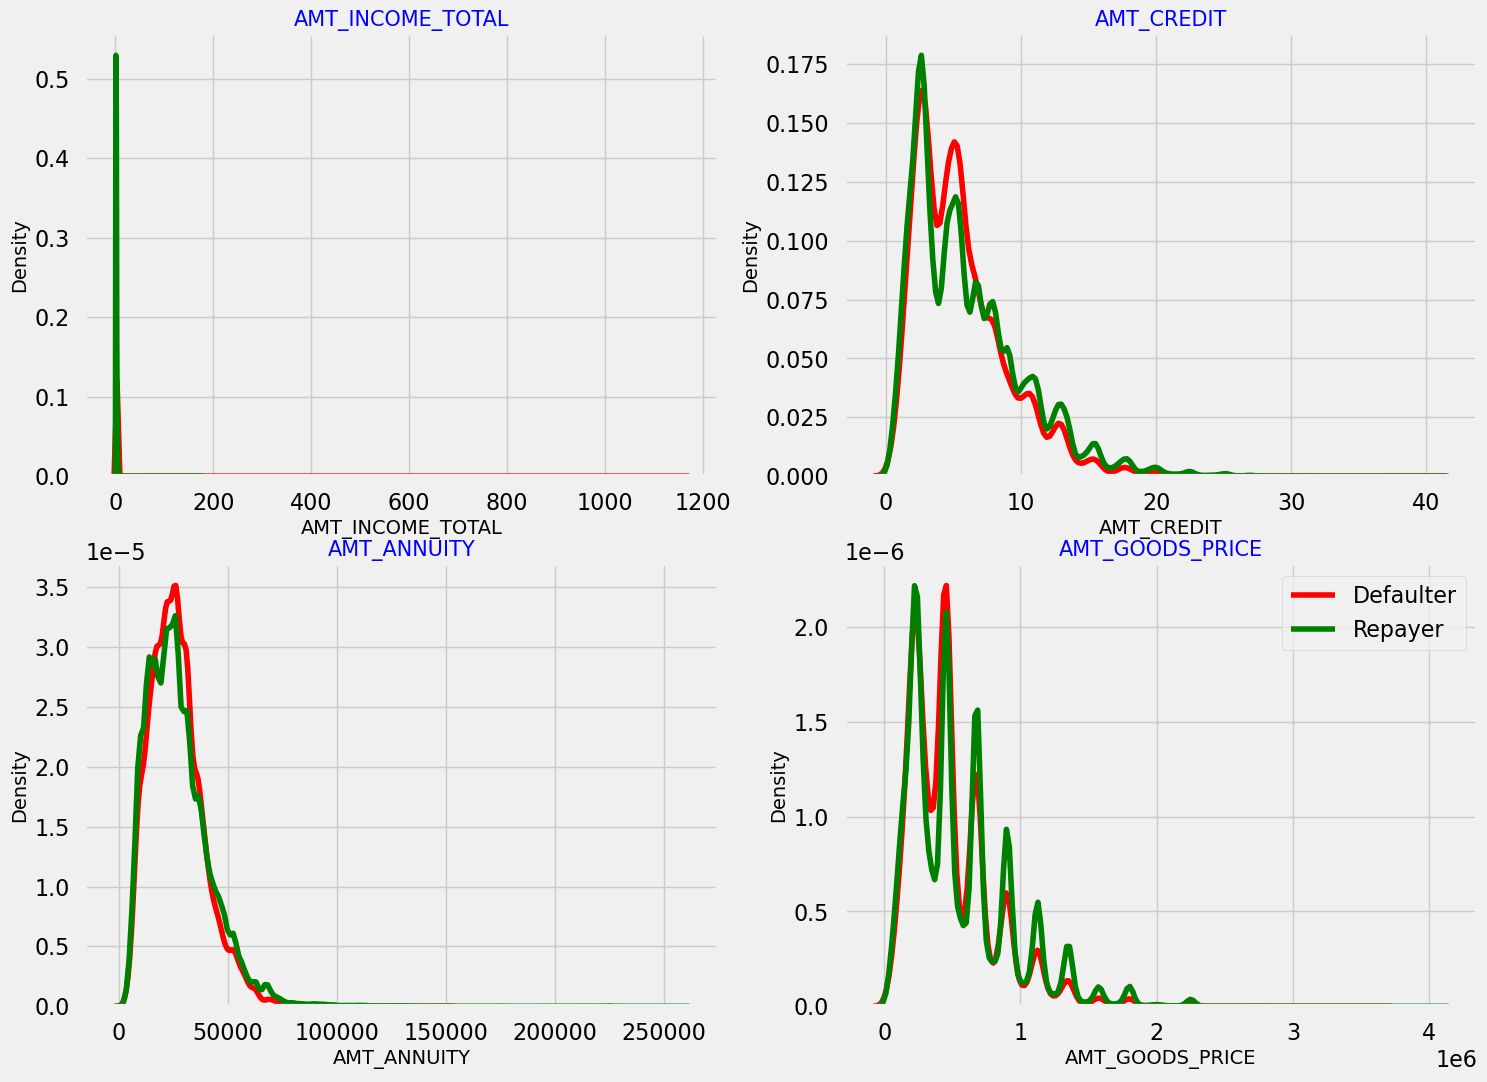

In [120]:
#plotting the numerical columns related to amount as distribution plot see density

amount=application_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]

fig=plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    

plt.legend()
plt.show()

<Figure size 1500x600 with 0 Axes>

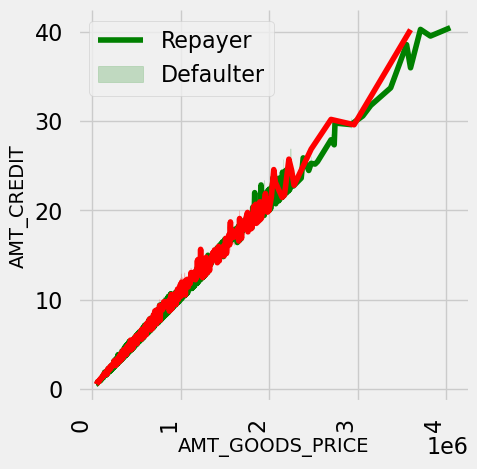

In [121]:
#checking the relationship between goods price and credit and comparing with loan repayment staus

bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',application_data,'TARGET','line',['g','r'],False,(15,6))

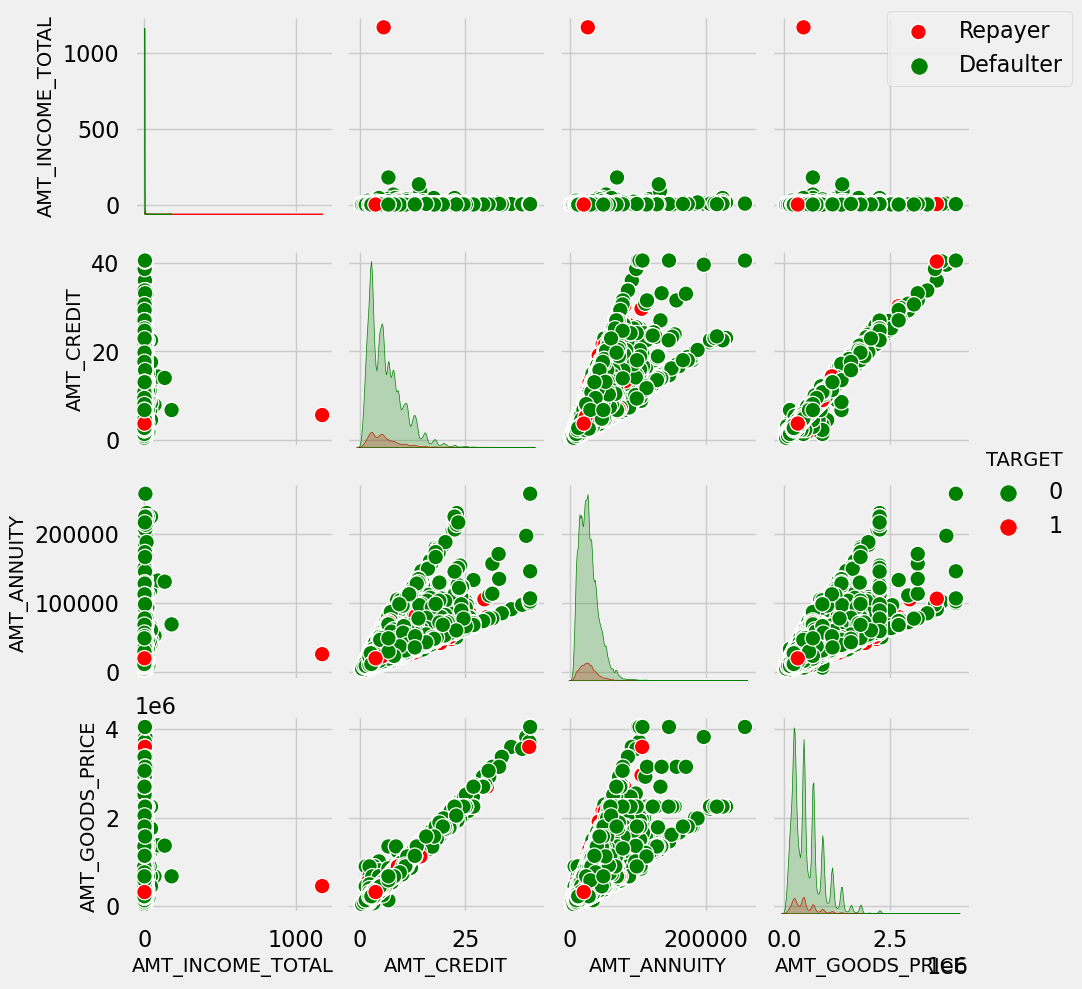

In [122]:
#Plotting pairplot between amount variable to draw refernce against loan repayment status
amount=application_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]

amount=amount[(amount['AMT_GOODS_PRICE'].notnull())&(amount['AMT_GOODS_PRICE'].notnull())]

ax=sns.pairplot(amount,hue='TARGET',palette=['g','r'])

ax.fig.legend(labels=['Repayer','Defaulter'])

plt.show()

# Merged DataFrame analysis


In [123]:
#merge both dataFrame on SK_ID_CURR with inner joins
loan_process_df=pd.merge(application_data,previous_application,how='inner',on='SK_ID_CURR')
loan_process_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_YEAR  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_DECISON DAYS_DECISION_GROUP
0      100002       1           Cash loans           M            N               Y             0             2.025      4.065975        24700.5           351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0        200k-300k        400k-500k   25     20-30               1             0-5     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                    XAP             Approved           -606                    XNA                XAP              New              Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest           606            -800-400
1      100003       0           Cash loans           F            N               N             0             2.700     12.935025        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0        200k-300k         1M Above   45  

In [124]:
loan_process_df.shape

(1413701, 75)

In [125]:
loan_process_df.size

106027575

In [126]:
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 75 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [129]:
#checking merged dataframe numericsl columns statistics
loan_process_df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR           AGE  YEARS_EMPLOYED    SK_ID_PREV  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_DECISON
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06  1.413701e+06   1.413608e+06       1.412493e+06                1.413701e+06  1.413701e+06   1.413701e+06       1.413701e+06     1.413701e+06     1.413701e+06             1.413701e+06                1.413701e+06              1.410555e+06              1.410555e+06              1.410555e+06              1.410555e+06            1.413701e+06     1.413701e+06                1.413701e+06               1.413701e+06                1.413701e+06               1.413701e+06               1.413701e+06                1.413701e+06  1.413701e+06    1.413701e+06  1.413701e+06   1.413701e+06     1.413701e+06  1.413700e+06       1.094176e+06   1.413701e+06      1.413701e+06  1.413701e+06  1.413701e+06
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+00  5.875537e+00   2.701702e+04       5.277186e+05                2.074985e-02  1.632105e+04   7.266347e+04       5.003233e+03     3.034563e+03     2.150501e+00             1.198433e+01                1.207327e-02              1.544176e+00              1.540436e-01              1.526303e+00              1.080426e-01           -1.084701e+03     7.385600e-01                5.484894e-03               6.028149e-03                3.410198e-02               2.664913e-01               3.196935e-01                2.691239e+00  4.421384e+01    1.985500e+02  1.922744e+06   1.484032e+04     1.752436e+05  1.963541e+05       2.264512e+05  -8.803670e+02      3.149878e+02  1.256367e+01  8.803670e+02
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+00  3.849173e+00   1.395116e+04       3.532465e+05                1.334702e-02  4.344557e+03   1.433374e+05       3.551051e+03     1.507376e+03     9.006787e-01             3.232181e+00                1.092132e-01              2.530715e+00              4.658973e-01              2.508953e+00              3.790588e-01            7.999369e+02     4.394192e-01                7.702591e-02               1.001966e-01                2.012902e-01               9.268428e-01               8.781444e-01                2.157176e+00  1.190217e+01    3.926378e+02  5.327153e+05   1.316370e+04     2.936222e+05  3.194813e+05       3.159376e+05   7.835402e+02      7.695082e+03  1.448807e+01  7.835402e+02
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e-01  4.500000e-01   1.615500e+03       4.050000e+04                2.900000e-04  7.489000e+03   0.000000e+00       0.000000e+00     0.000000e+00     1.000000e+00             0.000000e+00                0.000000e+00              0.000000e+00              0.000000e+00              0.000000e+00              0.000000e+00           -4.292000e+03     0.000000e+00                0.000000e+00               0.000000e+00                0.000000e+00               0.000000e+00               0.000000e+00                0.000000e+00  2.000000e+01    0.000000e+00  1.000001e+06   0.000000e+00     0.000000e+00  0.000000e+00       0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  1.000000e+00
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+00  2.700000e+00   1.682100e+04       2.385000e+05                1.003200e-02  1.273900e+04   1.042000e+03       2.001000e+03     1.783000e+03     2.000000e+00 

In [132]:
#Bifuracting the application dataframe based on target value 0 and 1 for correlation and other analy
L0=loan_process_df[loan_process_df['TARGET']==0]#repayers

L1=loan_process_df[loan_process_df['TARGET']==1]#defaulters

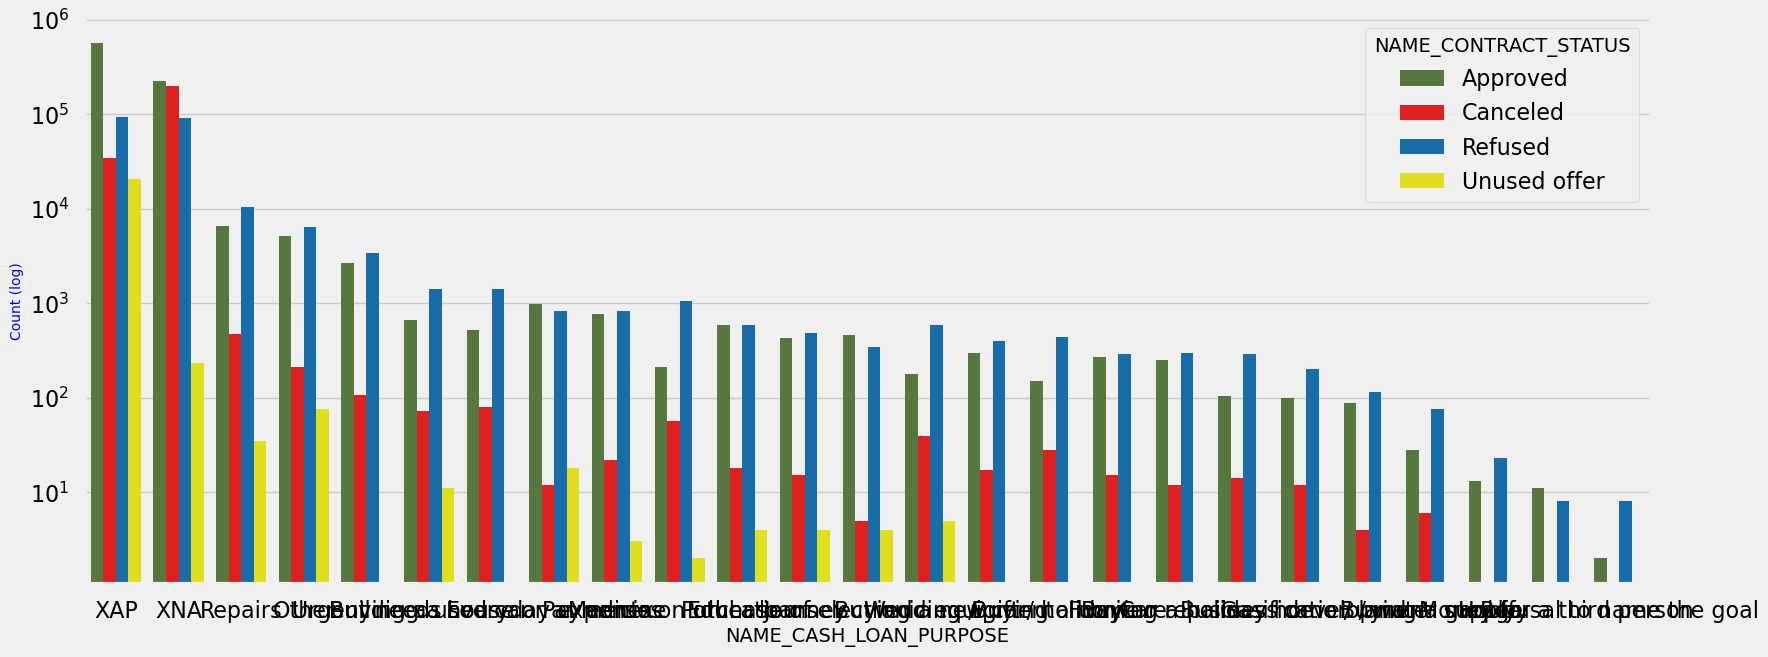

In [133]:
univariate_merged('NAME_CASH_LOAN_PURPOSE',L0,'NAME_CONTRACT_STATUS',["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

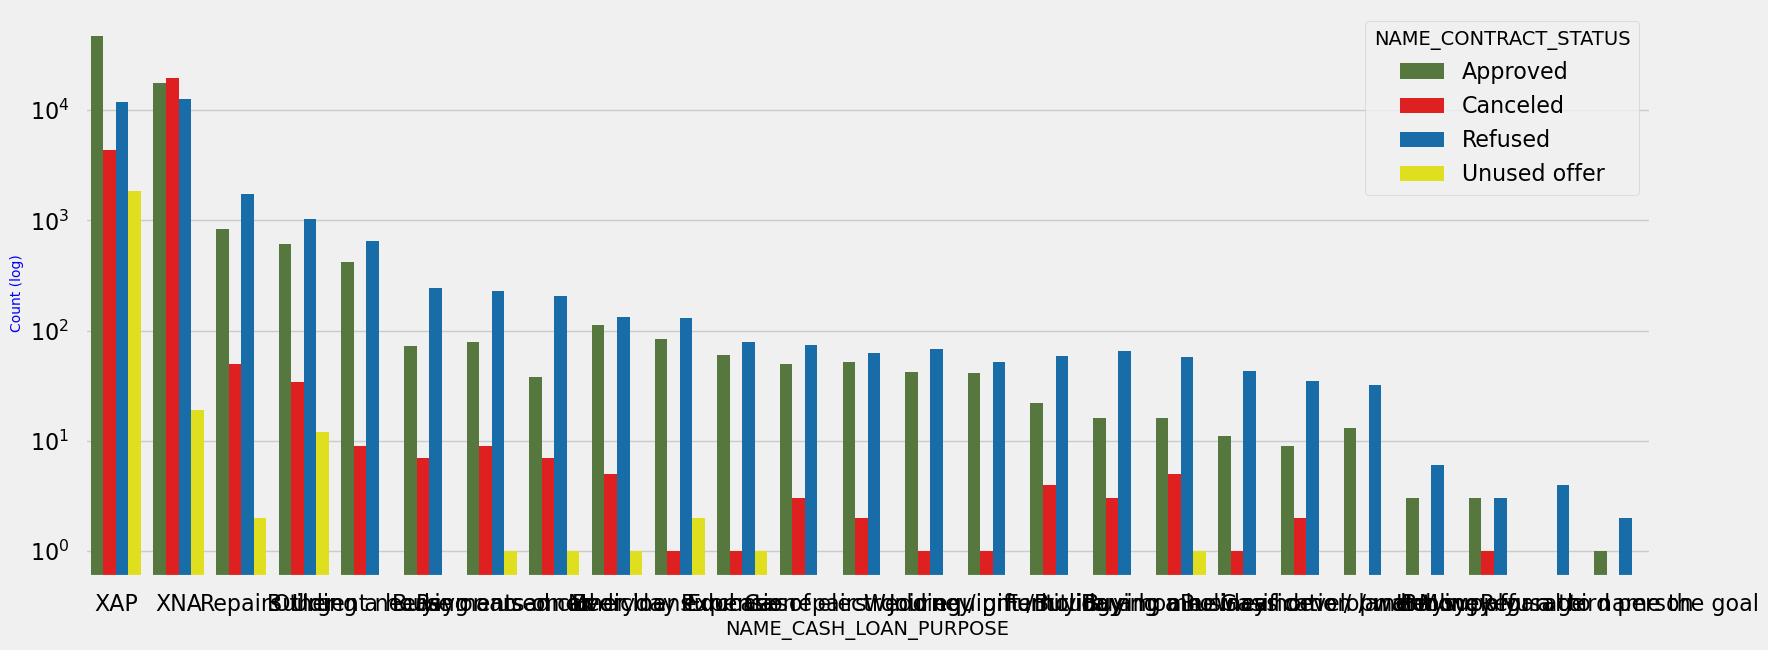

In [134]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

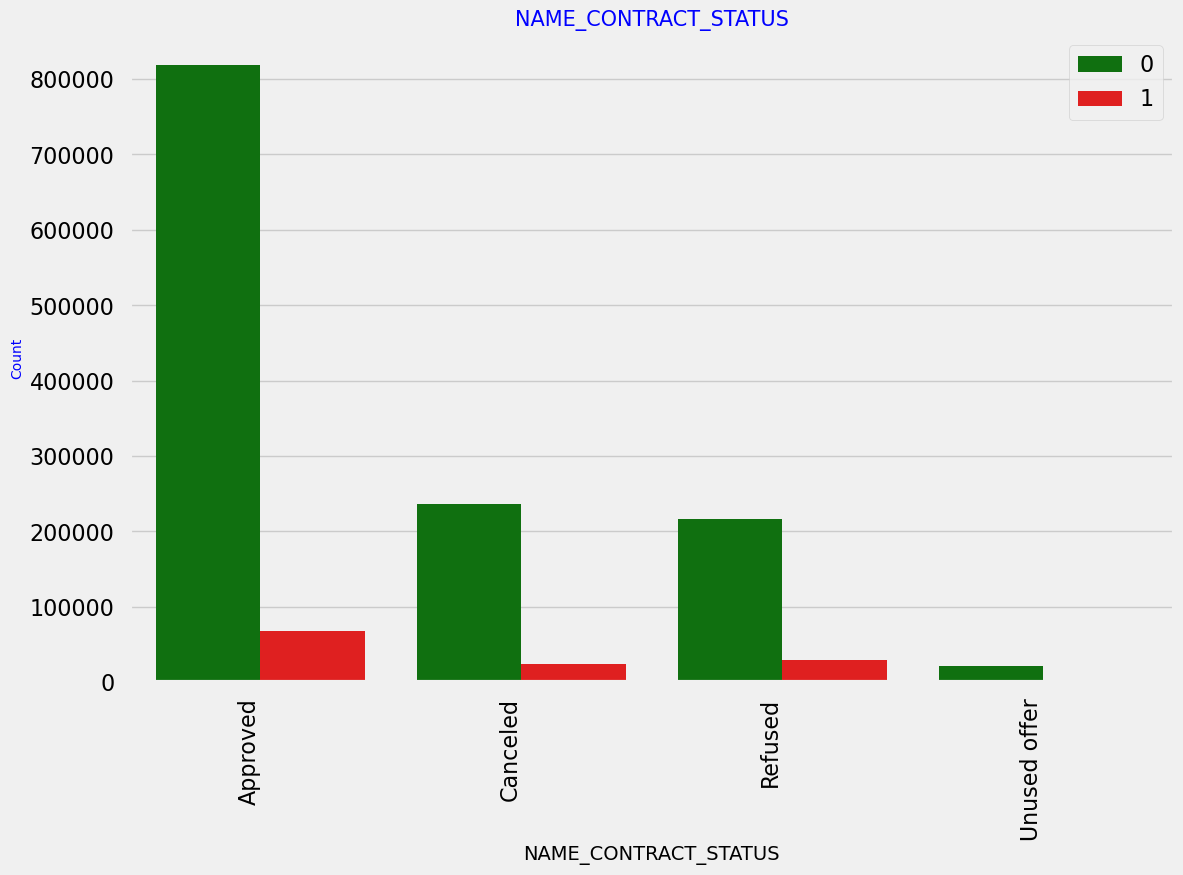

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [135]:
univariate_merged('NAME_CONTRACT_STATUS',loan_process_df,'TARGET',['g','r'],False,(12,8))

g=loan_process_df.groupby('NAME_CONTRACT_STATUS')['TARGET']

df1=pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1,keys=('Counts','Percentage'))


df1['Percentage']=df1['Percentage'].astype(str)+'%'

print(df1)

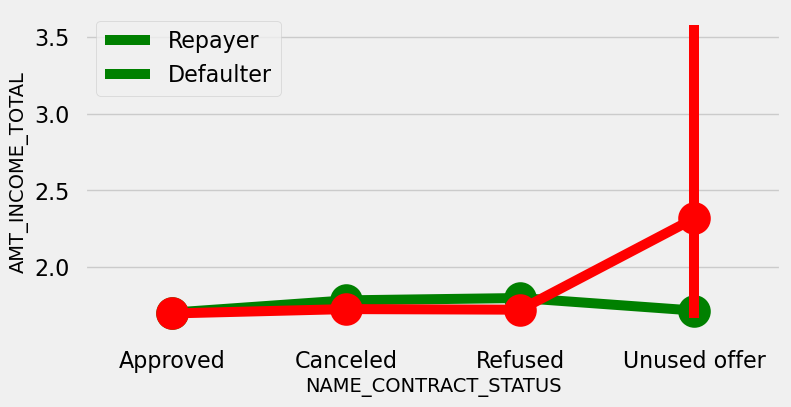

In [136]:
#plotting the relationship between income total and contact status 

merged_pointplot('NAME_CONTRACT_STATUS','AMT_INCOME_TOTAL')

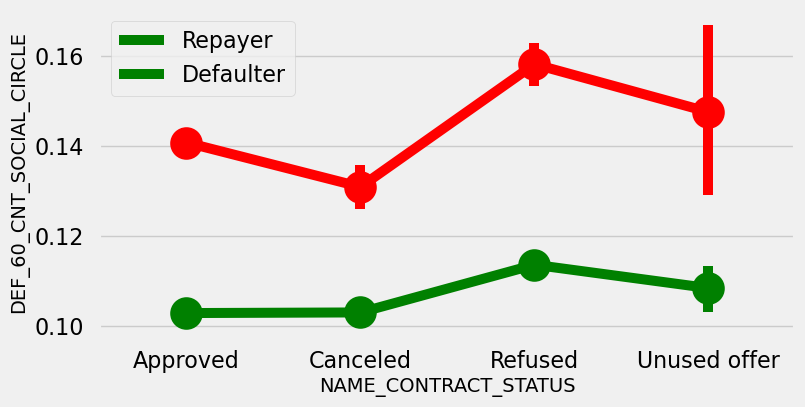

In [137]:
#plotting the relationship between people who defaulted in  last 60 days being in client's social circle and contact status 

merged_pointplot('NAME_CONTRACT_STATUS','DEF_60_CNT_SOCIAL_CIRCLE')

# Conclusions

after analying the data set there  are few attribute id a client which the bank would be able to identify if they will repay the loan or not the analysis is consised as below with mthe contributingfactor and 
categorization


Decisive Factor whether an applicant will be Repayer:

NAME_EDUCATION_TYPE: Academic degree has less defaults.

NAME_INCOME_TYPE: Student and Businessmen have no defaults.

REGION_RATING_CLIENT: RATING 1 is safer.

ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry 

type 8 have defaulted less than 3%

DAYS_BIRTH: People above age of 50 have low probability of
defaulting

DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% 
default rate

AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default

NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are 
being repayed mostly.

CNT_CHILDREN: People with zero to two children tend to repay the loans.

Decisive Factor whether an applicant will be Defaulter:

CODE_GENDER: Men are at relatively higher default rate

NAME_FAMILY_STATUS : People who have civil marriage or who are 
single default a lot.

NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education

NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.

REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.

OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.

ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.

DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting

DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.

CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.

AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.

The following attributes indicate that people from these category tend to default but then due to the number of people and the amount of loan, the bank could provide loan with higher interest to mitigate any default risk thus preventing business loss:

NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.

AMT_CREDIT: People who get loan for 300-600k tend to default more than others and hence having higher interest specifically for this credit range would be ideal.

AMT_INCOME: Since 90% of the applications have Income total less than 300,000 and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.

CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.

NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well